# Data Preparation (DP) homework, part I: Feature preprocessing

Welcome to the first part of Data Preparation homework!

In this notebook we're going to continue to work with the data about Bank Telemarketing.

We want to understand, how to prepare the data so that it would be ready for actual model building.

# Some code to mount Google Drive to the notebook

It is not necessary to get data exactly this way.

Your could just upload it to `sample_data` folder or use something like `wget` -> `unzip`.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# All improts necessary

It is a good practice to have all imports in one place.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
sns.set(font_scale=2)

# A few intro-words

If in a nutshell, then: preprocessing is important))

This could be the end of the story, but it’s about the question “What is your name?” reply "As I was called"))

Generally speaking, data preprocessing can mean quite different sets of activities.

For images, this can be the scaling of images, their cropping, the imposition of various masks, rotations, offsets, etc. etc.

For the text, this, respectively, lemmatization, stamming, the allocation of suffixes and affixes, the use of various regulars.

For tabular data, there’s a song for you, here you have to fill in the gaps in the cells, and normalize the signs, and various linear / non-linear transformations, and quantization, and binarization, and much more.

In this laptop, we, again, will not bite into the deep jungle of the pros and cons of the techniques presented here (although, of course, everything is relative)))

Instead, let's go over some of the techniques for which implementations are contained in scikit-learn and imbalanced-learn, in order to have some general idea.

# Read the data

Before you go through the cells, you must download the data.

It can be found [by this link](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

In [ ]:
data_path = YOUR_DATA_PATH

In [ ]:
data = pd.read_csv(os.path.join(data_path, 'bank-additional-full.csv'), sep=';')

In [ ]:
data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Add some gaps in the data

Let's pretend there are gaps in the data.

To do this, take all the features except the target one and drop an armful of nanos there:

In [ ]:
columns_with_gaps = data.columns[:-1]

In [ ]:
columns_with_gaps

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

We will take the percentage of omissions in the trait from 0 to 30:

In [ ]:
minimum = 0
maximum = 0.3

Create the dictionary, it is useful to us in order to run on features and toss gaps there:

In [ ]:
columns_with_gaps_dict = dict(
    zip(
        columns_with_gaps,
        np.random.uniform(
            minimum,
            maximum,
            len(columns_with_gaps)
        )
    )
)

In [ ]:
columns_with_gaps_dict

{'age': 0.16154432257602466,
 'job': 0.16703751118617524,
 'marital': 0.09308323728990078,
 'education': 0.13631737142322586,
 'default': 0.27030624968408207,
 'housing': 0.09707329955046658,
 'loan': 0.28306070063384875,
 'contact': 0.21445510596389047,
 'month': 0.025016836512409723,
 'day_of_week': 0.10654705903225958,
 'duration': 0.1669276918224551,
 'campaign': 0.011222951434784967,
 'pdays': 0.019959864282791062,
 'previous': 0.08065486459346385,
 'poutcome': 0.027941621369964576,
 'emp.var.rate': 0.1231751921118587,
 'cons.price.idx': 0.27939818399420546,
 'cons.conf.idx': 0.15951214690049506,
 'euribor3m': 0.2938715464107567,
 'nr.employed': 0.2089533020957405}

Now, in order not to spoil the source data, take a copy of it and fill it with gaps:

In [ ]:
data_with_gaps_v1 = data.copy()

In [ ]:
for column in columns_with_gaps:
    if columns_with_gaps_dict[column] > 0:
        gaps_count = int(len(data_with_gaps_v1) * columns_with_gaps_dict[column])
        data_with_gaps_v1[column].iloc[
            np.random.randint(
                0,
                len(data_with_gaps_v1),
                gaps_count
            )
        ] = np.nan

In [ ]:
data_with_gaps_v1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35048 non-null  float64
 1   job             34883 non-null  object 
 2   marital         37546 non-null  object 
 3   education       35935 non-null  object 
 4   default         31460 non-null  object 
 5   housing         37382 non-null  object 
 6   loan            31035 non-null  object 
 7   contact         33183 non-null  object 
 8   month           40174 non-null  object 
 9   day_of_week     37015 non-null  object 
 10  duration        34839 non-null  float64
 11  campaign        40728 non-null  float64
 12  pdays           40372 non-null  float64
 13  previous        37984 non-null  float64
 14  poutcome        40053 non-null  object 
 15  emp.var.rate    36405 non-null  float64
 16  cons.price.idx  31107 non-null  float64
 17  cons.conf.idx   35122 non-null 

# Imputers

Misses, of course, a thing quite expected.

If your task has no gaps, then it is possible that you are dreaming of it or you are working on a task from a parallel world where there is no suffering and everyone is happy.

However, if you are still in the real world, then (in one form or another) you will need to process data gaps.

Generally you can think of several options:
- throw out those rows / columns where gaps occur;
- fill in the blanks with some default values ​​(for example, 0 or -1 for real attributes or "unknown" for categorical ones);
- fill in the gaps with statistics;
- try to allocate a subspace without gaps, count [K-dimensional tree](http://scikit-learn.org/0.19/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree) and take TOP-N of the nearest objects and already on them either take statistics (average or median for real ones, fashion for categorical ones);
- etc.

We will not dwell on this topic here in detail.

Let's consider only a few of the simplest approaches that you may encounter in practice.

## sklearn.impute.SimpleImputer

Here we use a fairly easy-to-use class that provides several options, namely:
- fill in the blanks with average values;
- fill in the blanks with medians;
- fill in the blanks with mods;
- fill in the blanks with constants.

But first, let us recall from `EDA.ipynb` that in the data there are generally two types of features: continuous and discrete. We apply different strategies to different subsets of attributes:

In [ ]:
numerical_features = [
    'age',
    'campaign',
    'cons.conf.idx',
    'cons.price.idx',
    'duration',
    'emp.var.rate',
    'euribor3m',
    'nr.employed',
    'pdays',
    'previous'
]

In [ ]:
categorial_features = [
    'contact',
    'day_of_week',
    'default',
    'education',
    'housing',
    'job',
    'loan',
    'marital',
    'month',
    'poutcome'
]

In [ ]:
mean_imputer = SimpleImputer(
    missing_values=np.nan,
    strategy='mean',
    verbose=True
)

In [ ]:
median_imputer = SimpleImputer(
    missing_values=np.nan,
    strategy='median',
    verbose=True
)

In [ ]:
most_frequent_imputer = SimpleImputer(
    missing_values=np.nan,
    strategy='most_frequent',
    verbose=True
)

In [ ]:
constant_imputer = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value='unknown',
    verbose=True
)

In [ ]:
numericals_with_mean_imputed = pd.DataFrame(
    mean_imputer.fit_transform(data_with_gaps_v1[numerical_features]),
    columns=numerical_features
)

In [ ]:
numericals_with_mean_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.028447,9.582516,17.000,33.000000,40.028447,45.000,98.000
campaign,41188.0,2.568773,2.759328,1.000,1.000000,2.000000,3.000,56.000
cons.conf.idx,41188.0,-40.506785,4.280082,-50.800,-42.700000,-40.800000,-36.400,-26.900
cons.price.idx,41188.0,93.577438,0.502168,92.201,93.200000,93.577438,93.918,94.767
duration,41188.0,257.888171,238.078707,0.000,115.000000,217.000000,283.000,4918.000
emp.var.rate,41188.0,0.080335,1.478966,-3.400,-1.800000,1.100000,1.400,1.400
euribor3m,41188.0,3.612393,1.498696,0.634,3.612393,3.612393,4.958,5.045
nr.employed,41188.0,5167.154601,64.980218,4963.600,5099.100000,5191.000000,5228.100,5228.100
pdays,41188.0,962.500198,184.988501,0.000,999.000000,999.000000,999.000,999.000
previous,41188.0,0.171993,0.473683,0.000,0.000000,0.000000,0.000,7.000


In [ ]:
numericals_with_mean_imputed.head().T

,0,1,2,3,4
age,56.000000,57.000,37.000000,40.000000,56.000
campaign,1.000000,1.000,1.000000,1.000000,1.000
cons.conf.idx,-36.400000,-36.400,-36.400000,-36.400000,-36.400
cons.price.idx,93.994000,93.994,93.994000,93.577438,93.994
duration,261.000000,149.000,226.000000,257.888171,307.000
emp.var.rate,1.100000,1.100,1.100000,1.100000,1.100
euribor3m,4.857000,4.857,3.612393,3.612393,4.857
nr.employed,5167.154601,5191.000,5167.154601,5191.000000,5191.000
pdays,999.000000,999.000,999.000000,999.000000,999.000
previous,0.000000,0.000,0.000000,0.000000,0.000


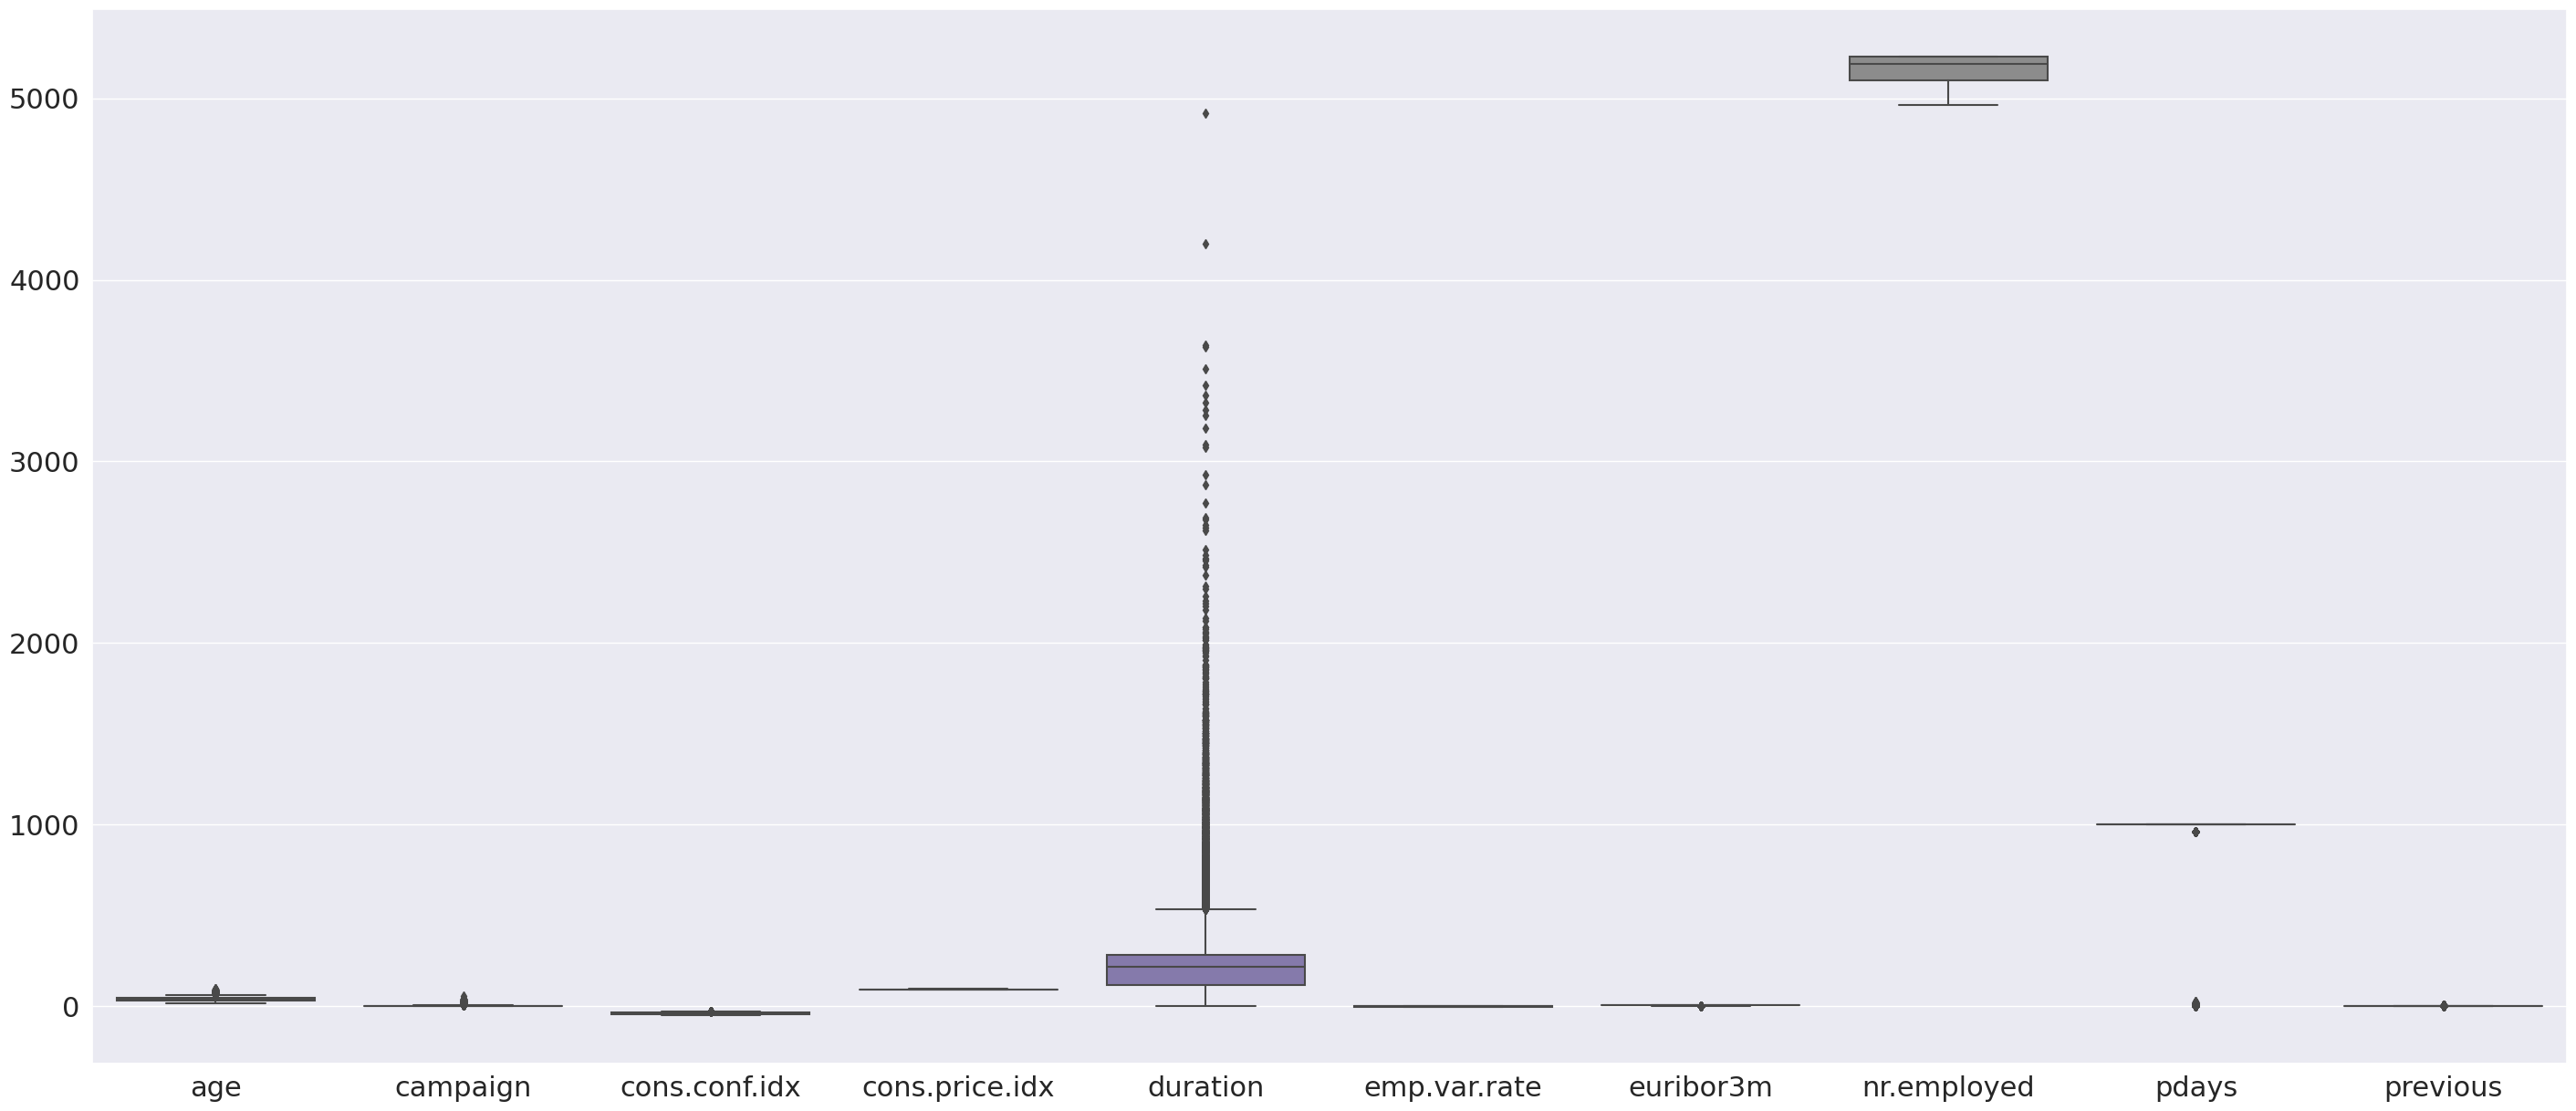

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_mean_imputed)
plt.show()

In [ ]:
numericals_with_median_imputed = pd.DataFrame(
    median_imputer.fit_transform(data_with_gaps_v1[numerical_features]),
    columns=numerical_features
)

In [ ]:
numericals_with_median_imputed.describe().append(
    data_with_gaps_v1[numerical_features].median().rename("median")
).T

,count,mean,std,min,25%,50%,75%,max,median
age,41188.0,39.726061,9.609712,17.000,33.000,38.000,45.000,98.000,38.000
campaign,41188.0,2.562421,2.759975,1.000,1.000,2.000,3.000,56.000,2.000
cons.conf.idx,41188.0,-40.697244,4.304549,-50.800,-42.700,-41.800,-36.400,-26.900,-41.800
cons.price.idx,41188.0,93.619429,0.507556,92.201,93.200,93.749,93.918,94.767,93.749
duration,41188.0,245.727809,239.776822,0.000,115.000,179.000,283.000,4918.000,179.000
emp.var.rate,41188.0,0.198745,1.514616,-3.400,-1.800,1.100,1.400,1.400,1.100
euribor3m,41188.0,3.930102,1.593920,0.634,4.021,4.857,4.958,5.045,4.857
nr.employed,41188.0,5171.654705,65.646681,4963.600,5099.100,5191.000,5228.100,5228.100,5191.000
pdays,41188.0,963.223317,185.058415,0.000,999.000,999.000,999.000,999.000,999.000
previous,41188.0,0.158614,0.475918,0.000,0.000,0.000,0.000,7.000,0.000


In [ ]:
numericals_with_median_imputed.head().T

,0,1,2,3,4
age,56.000,57.000,37.000,40.000,56.000
campaign,1.000,1.000,1.000,1.000,1.000
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400
cons.price.idx,93.994,93.994,93.994,93.749,93.994
duration,261.000,149.000,226.000,179.000,307.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100
euribor3m,4.857,4.857,4.857,4.857,4.857
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000


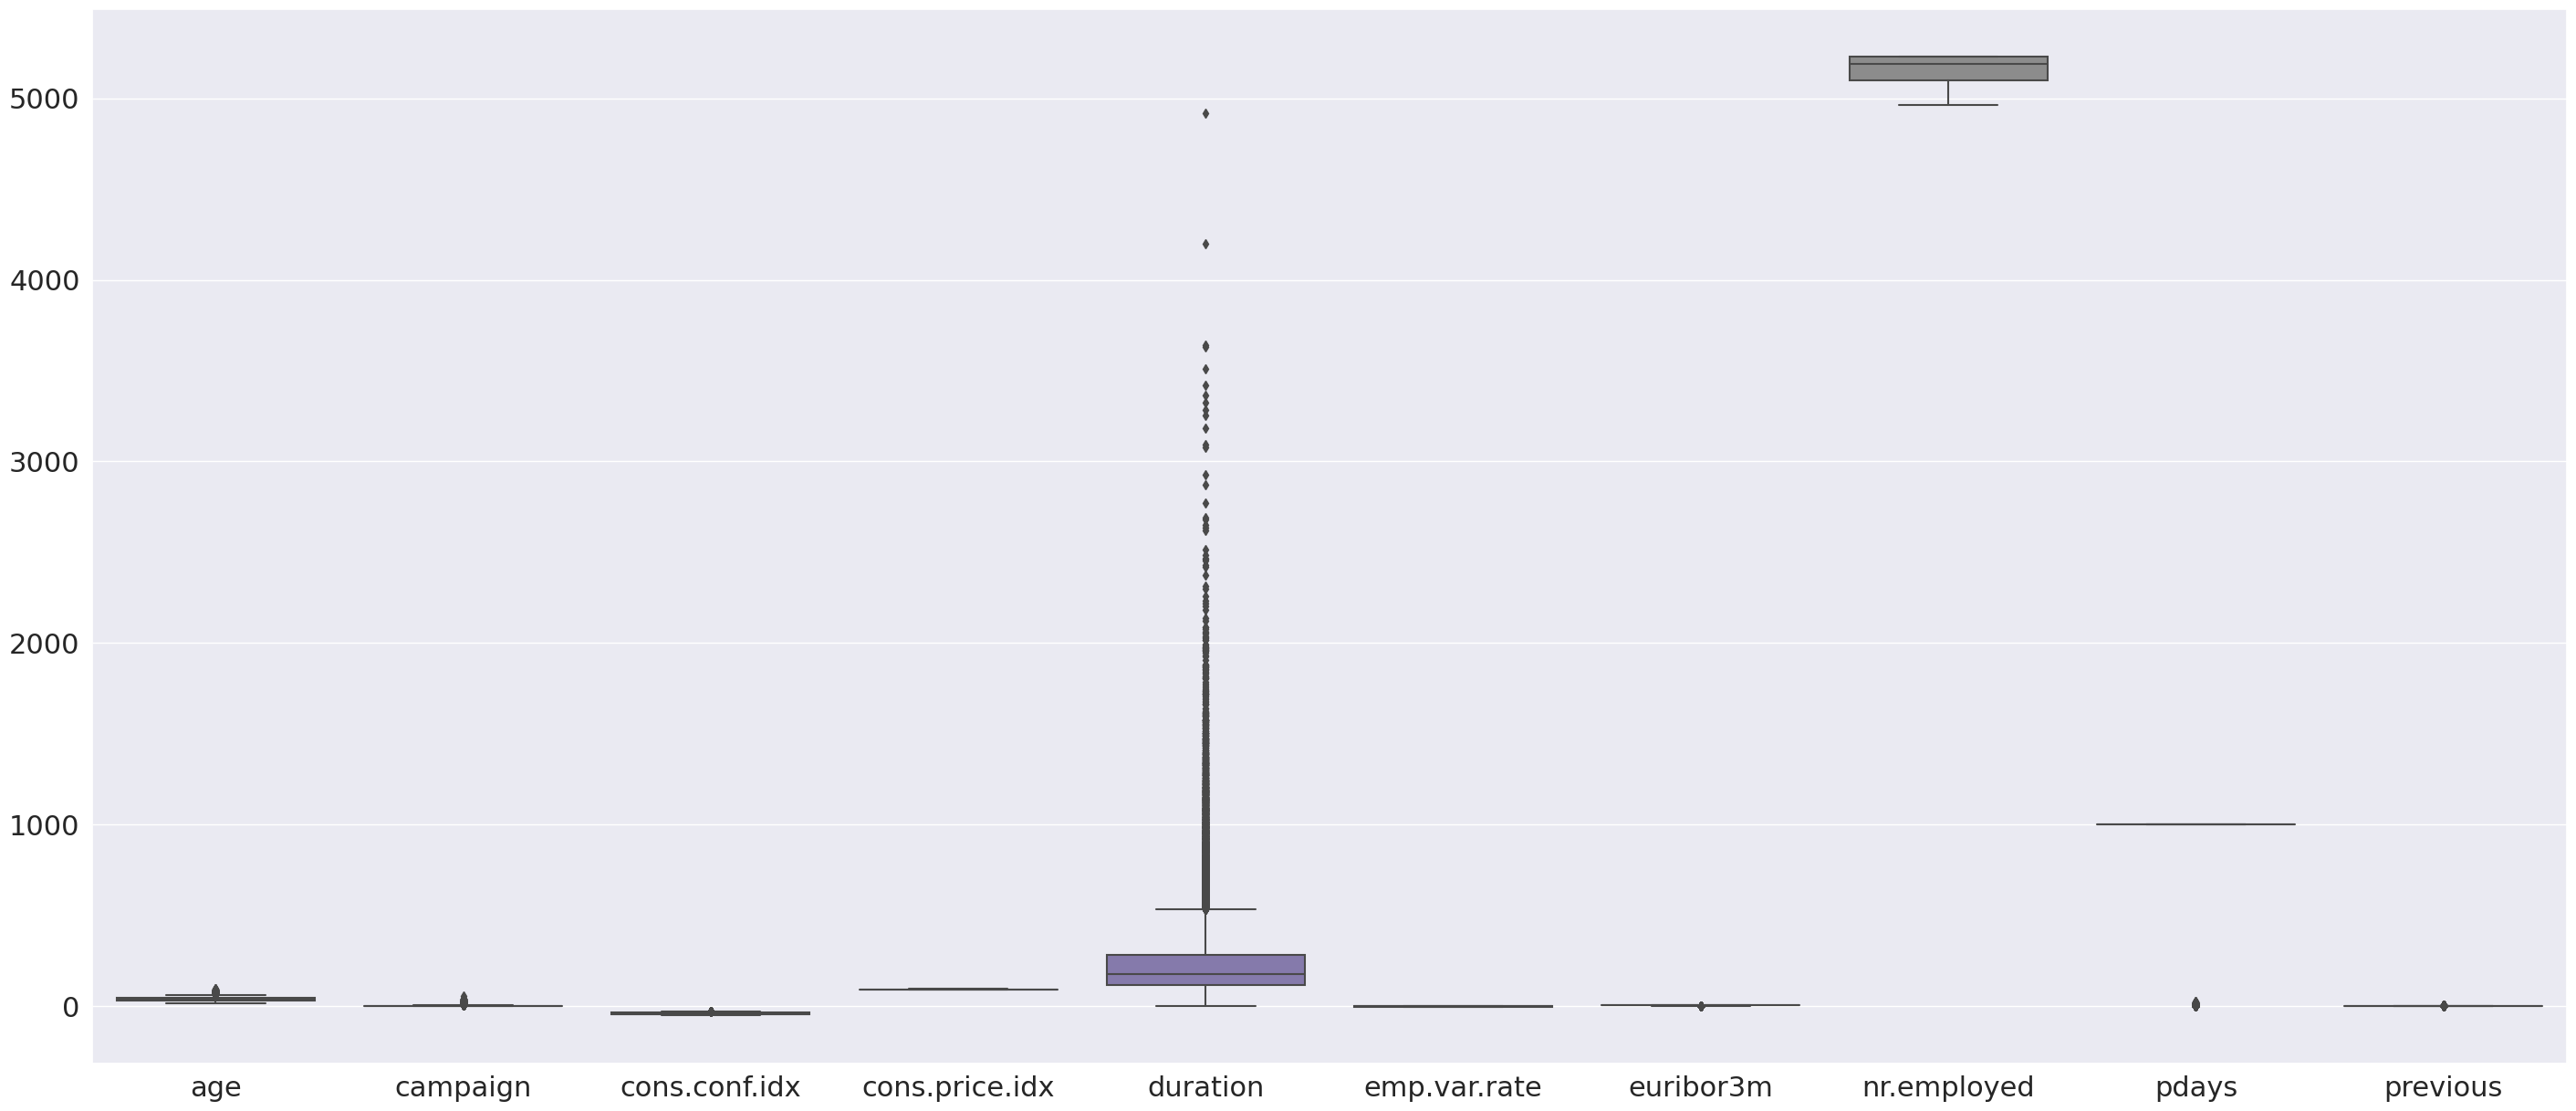

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_median_imputed)
plt.show()

In [ ]:
numericals_with_most_frequent_imputed = pd.DataFrame(
    most_frequent_imputer.fit_transform(data_with_gaps_v1[numerical_features]),
    columns=numerical_features
)

In [ ]:
numericals_with_most_frequent_imputed.describe().append(
    data_with_gaps_v1[numerical_features].mode().loc[0].rename("most_frequent")
).T

,count,mean,std,min,25%,50%,75%,max,most_frequent
age,41188.0,38.682553,10.107659,17.000,31.000,36.000,45.000,98.000,31.000
campaign,41188.0,2.551253,2.764249,1.000,1.000,2.000,3.000,56.000,1.000
cons.conf.idx,41188.0,-39.901954,4.520757,-50.800,-42.700,-40.800,-36.400,-26.900,-36.400
cons.price.idx,41188.0,93.679394,0.533150,92.201,93.200,93.918,93.994,94.767,93.994
duration,41188.0,231.238006,246.127674,0.000,85.000,149.000,283.000,4918.000,85.000
emp.var.rate,41188.0,0.233583,1.538212,-3.400,-1.800,1.100,1.400,1.400,1.400
euribor3m,41188.0,3.930102,1.593920,0.634,4.021,4.857,4.958,5.045,4.857
nr.employed,41188.0,5178.656218,69.217960,4963.600,5099.100,5228.100,5228.100,5228.100,5228.100
pdays,41188.0,963.223317,185.058415,0.000,999.000,999.000,999.000,999.000,999.000
previous,41188.0,0.158614,0.475918,0.000,0.000,0.000,0.000,7.000,0.000


In [ ]:
numericals_with_most_frequent_imputed.head().T

,0,1,2,3,4
age,56.000,57.000,37.000,40.000,56.000
campaign,1.000,1.000,1.000,1.000,1.000
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400
cons.price.idx,93.994,93.994,93.994,93.994,93.994
duration,261.000,149.000,226.000,85.000,307.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100
euribor3m,4.857,4.857,4.857,4.857,4.857
nr.employed,5228.100,5191.000,5228.100,5191.000,5191.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000


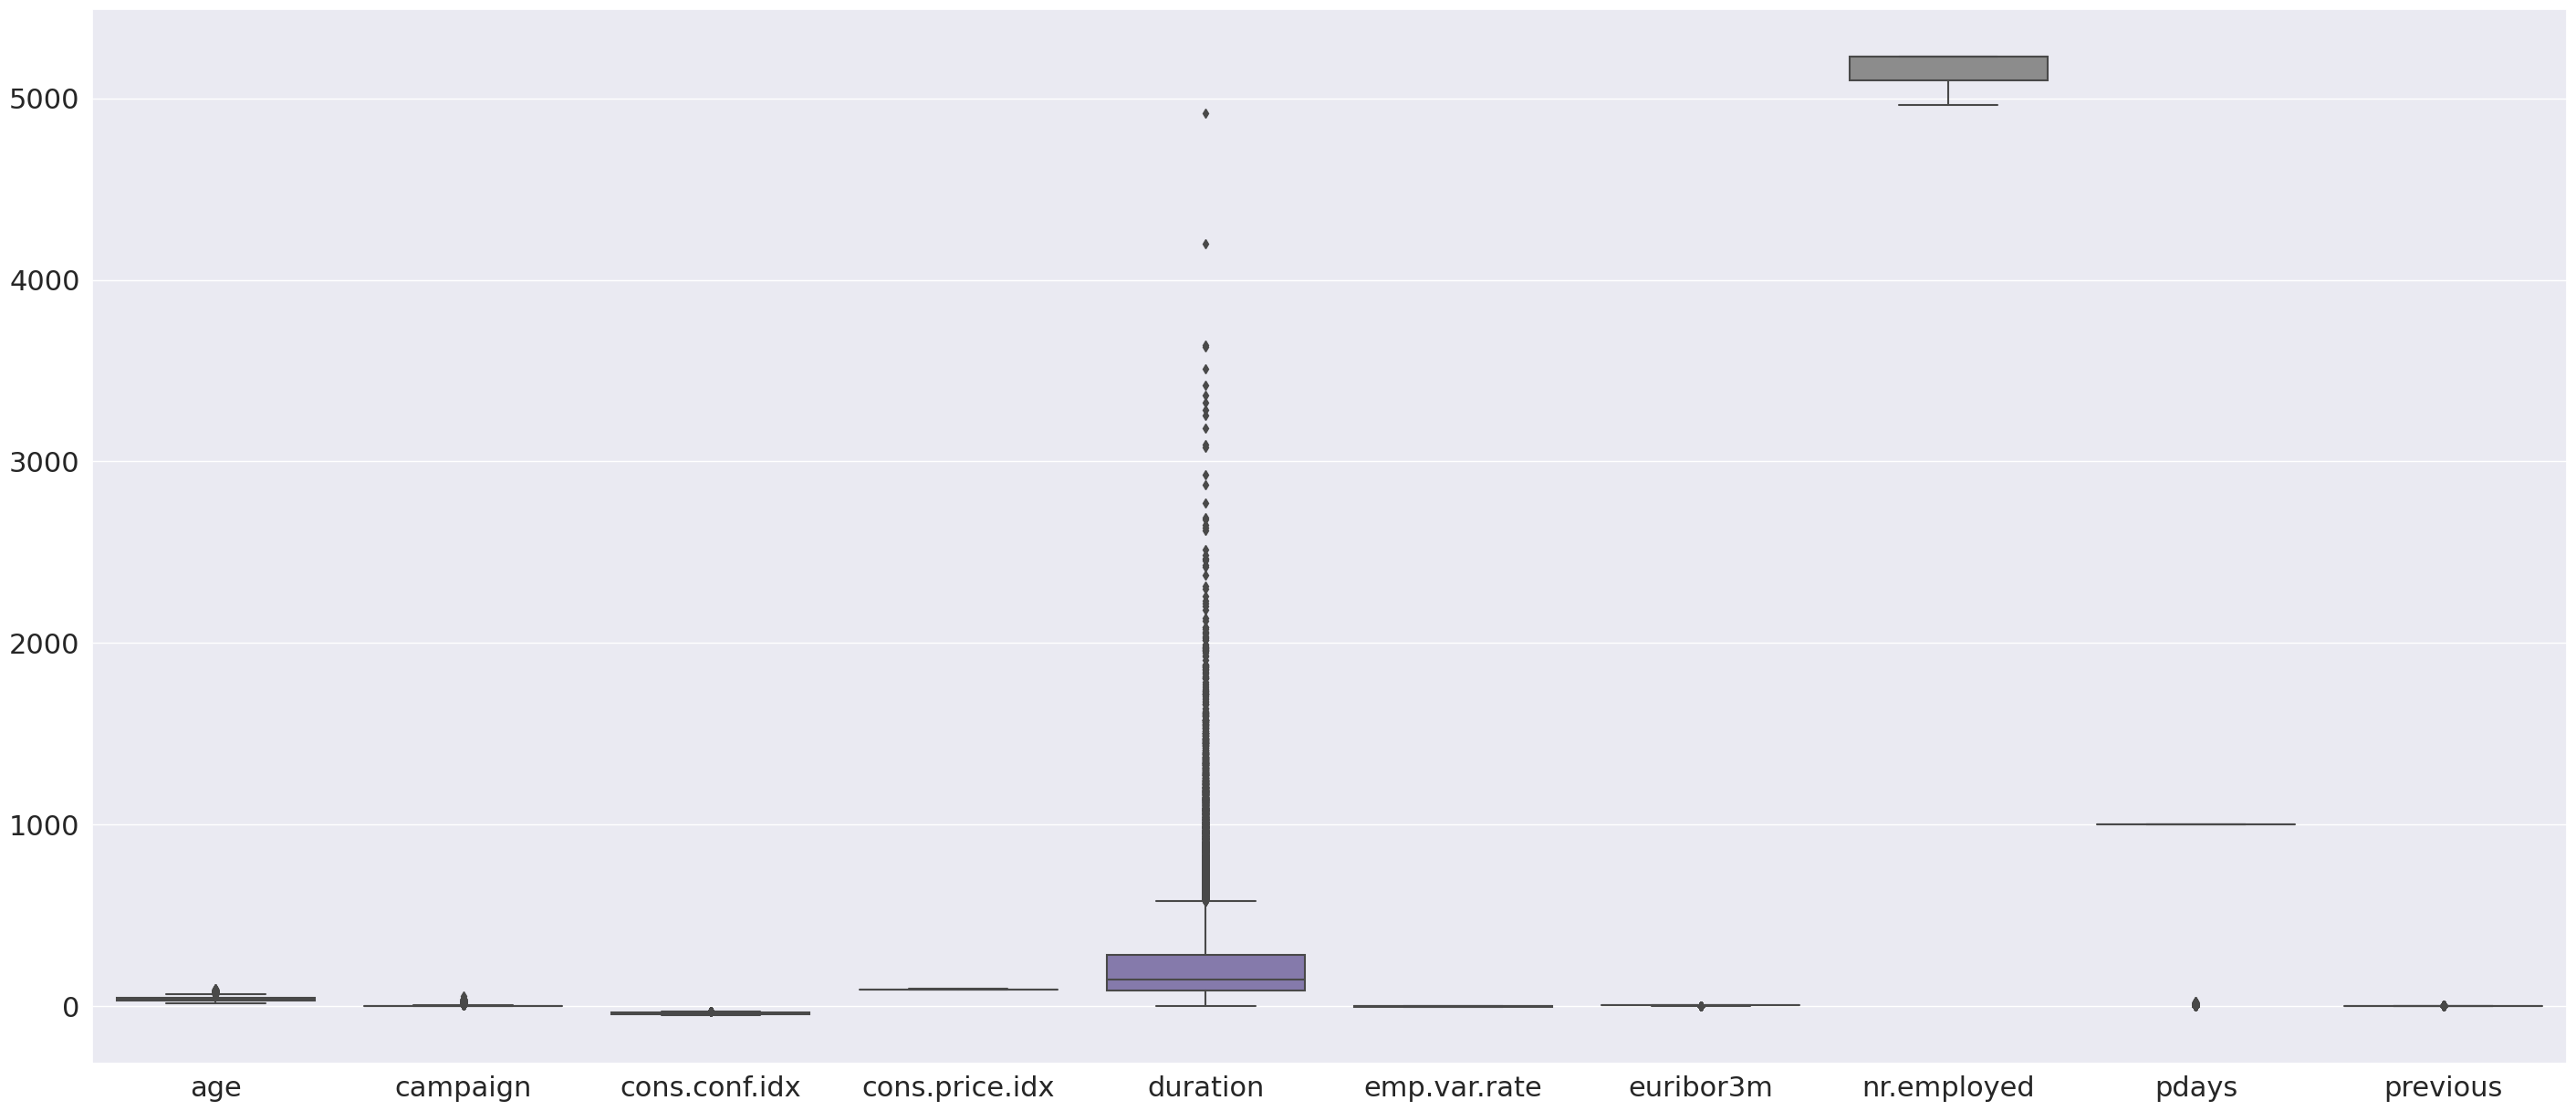

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_most_frequent_imputed)
plt.show()

In [ ]:
categorials_with_constant_imputed = pd.DataFrame(
    constant_imputer.fit_transform(data_with_gaps_v1[categorial_features]),
    columns=categorial_features
)

In [ ]:
categorials_with_constant_imputed[categorial_features[0]].value_counts()

cellular     21027
telephone    12156
unknown       8005
Name: contact, dtype: int64

In [ ]:
categorials_with_constant_imputed[categorial_features[1]].value_counts()

thu        7759
mon        7676
wed        7301
tue        7268
fri        7011
unknown    4173
Name: day_of_week, dtype: int64

In [ ]:
categorials_with_constant_imputed[categorial_features[2]].value_counts()

no         24904
unknown    16281
yes            3
Name: default, dtype: int64

In [ ]:
categorials_with_constant_imputed.head()

,contact,day_of_week,default,education,housing,job,loan,marital,month,poutcome
0,unknown,mon,no,basic.4y,no,unknown,no,married,may,nonexistent
1,telephone,mon,unknown,high.school,no,services,unknown,married,may,nonexistent
2,telephone,mon,no,high.school,unknown,services,no,married,may,nonexistent
3,telephone,mon,no,basic.6y,no,unknown,unknown,married,may,nonexistent
4,telephone,mon,no,high.school,no,services,yes,unknown,may,nonexistent


# Scalers

Normalizing data is commonplace.

This thing is very useful if you use scale-sensitive algorithms (e.g. metric algorithms).

Here we look at some of the options.

## sklearn.preprocessing.MaxAbsScaler

In [ ]:
max_abs_scaler = MaxAbsScaler()

In [ ]:
numericals_with_mean_imputed_max_abs_scaled = pd.DataFrame(
    max_abs_scaler.fit_transform(numericals_with_mean_imputed),
    columns=numerical_features
)

In [ ]:
numericals_with_mean_imputed_max_abs_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,0.408454,0.097781,0.173469,0.336735,0.408454,0.459184,1.000000
campaign,41188.0,0.045871,0.049274,0.017857,0.017857,0.035714,0.053571,1.000000
cons.conf.idx,41188.0,-0.797378,0.084254,-1.000000,-0.840551,-0.803150,-0.716535,-0.529528
cons.price.idx,41188.0,0.987448,0.005299,0.972923,0.983465,0.987448,0.991041,1.000000
duration,41188.0,0.052438,0.048410,0.000000,0.023383,0.044124,0.057544,1.000000
emp.var.rate,41188.0,0.023628,0.434990,-1.000000,-0.529412,0.323529,0.411765,0.411765
euribor3m,41188.0,0.716034,0.297066,0.125669,0.716034,0.716034,0.982755,1.000000
nr.employed,41188.0,0.988343,0.012429,0.949408,0.975326,0.992904,1.000000,1.000000
pdays,41188.0,0.963464,0.185174,0.000000,1.000000,1.000000,1.000000,1.000000
previous,41188.0,0.024570,0.067669,0.000000,0.000000,0.000000,0.000000,1.000000


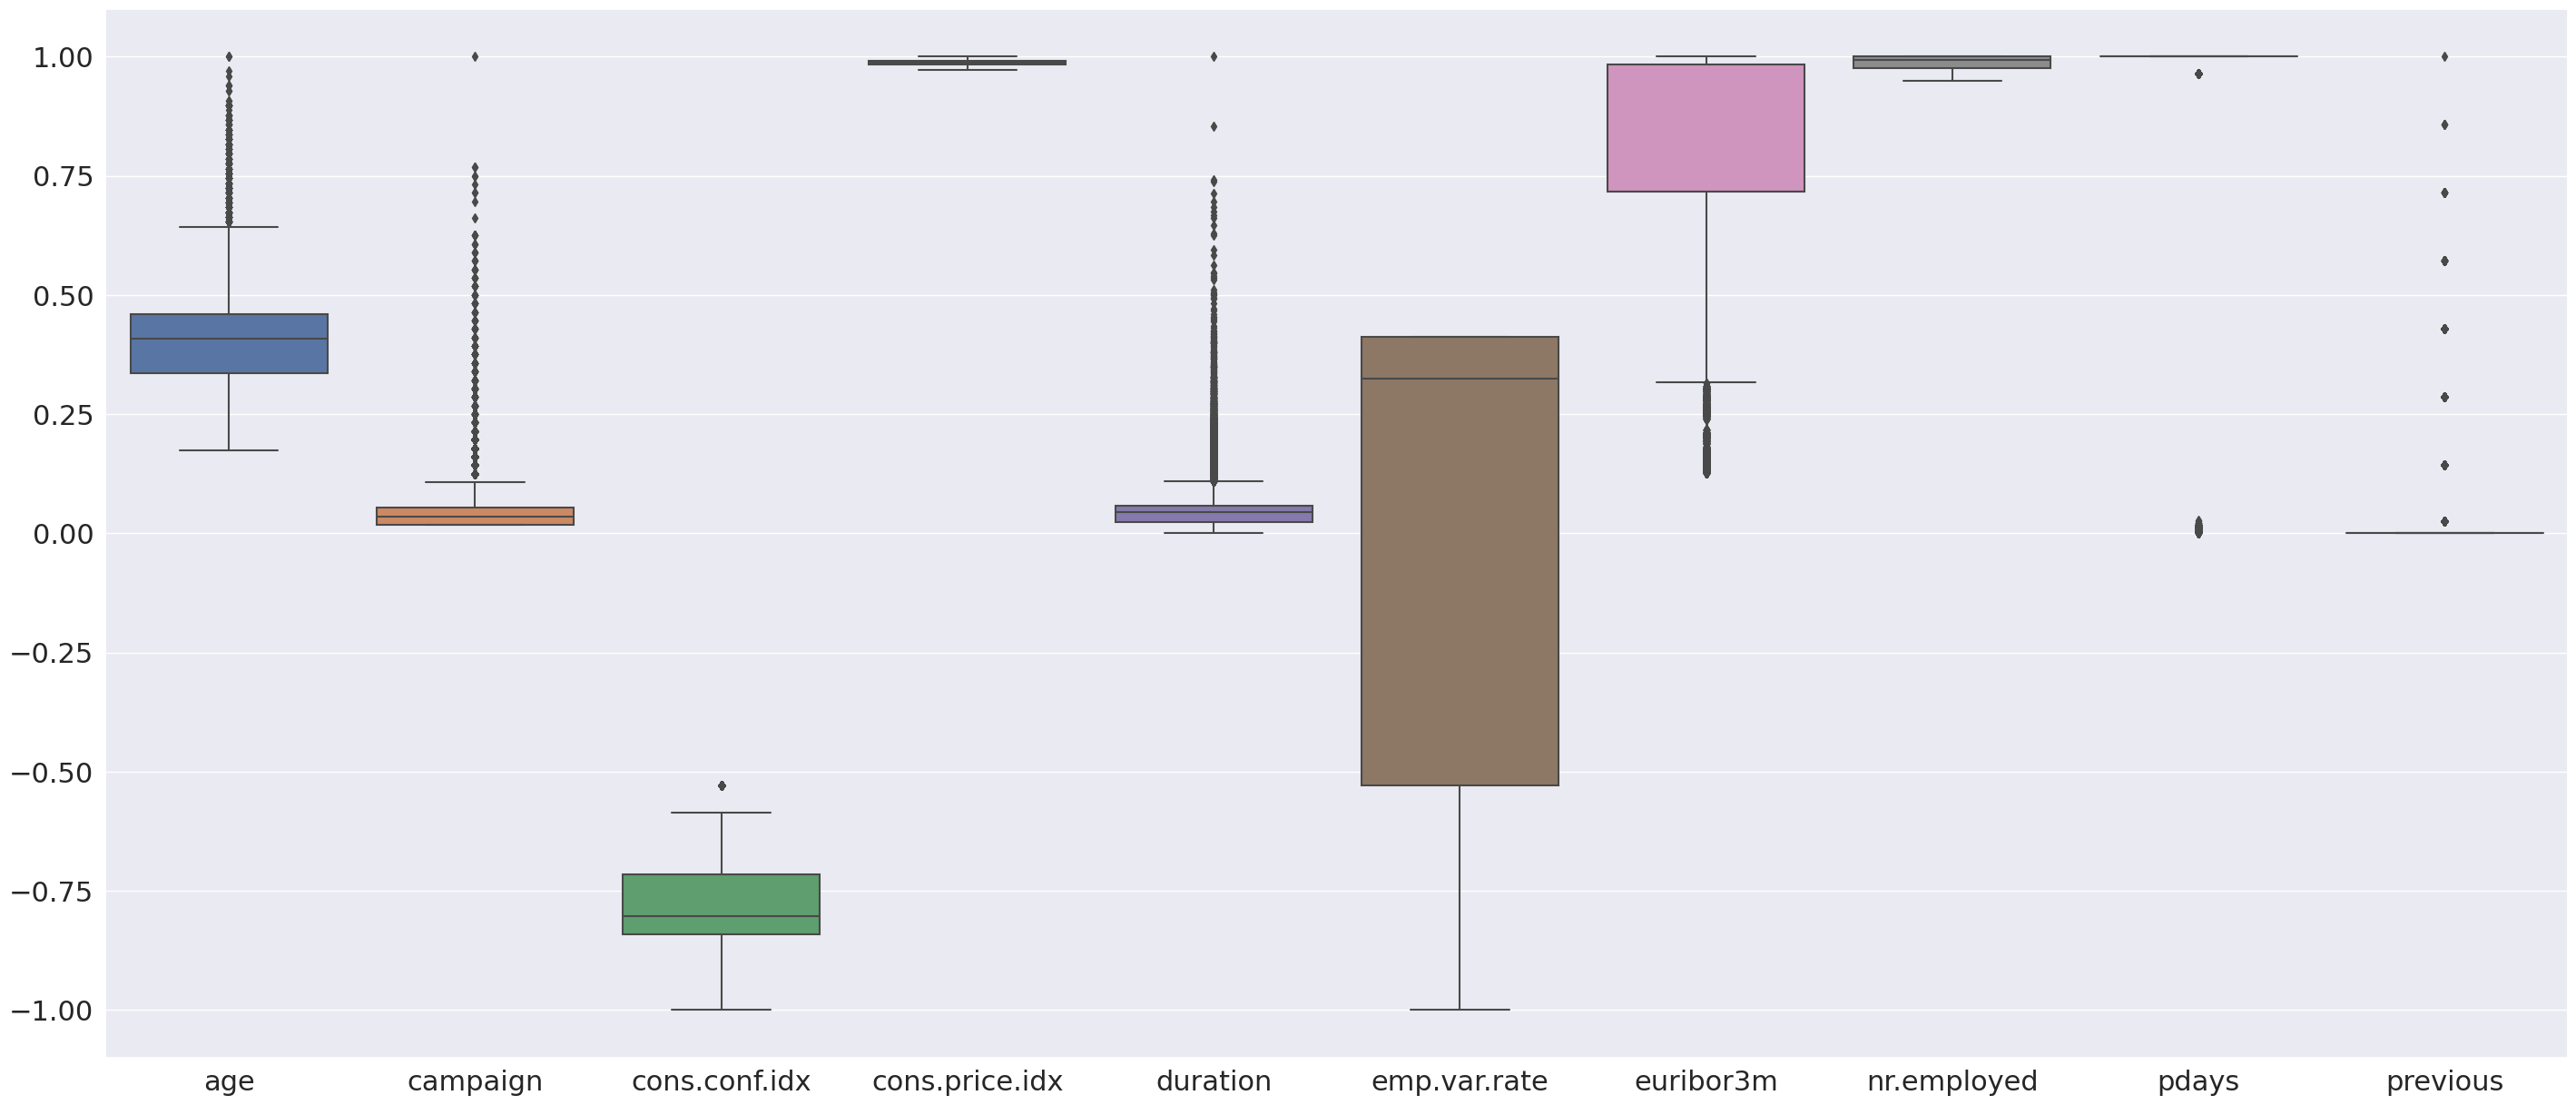

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_mean_imputed_max_abs_scaled)
plt.show()

In [ ]:
numericals_with_median_imputed_max_abs_scaled = pd.DataFrame(
    max_abs_scaler.fit_transform(numericals_with_median_imputed),
    columns=numerical_features
)

In [ ]:
numericals_with_median_imputed_max_abs_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,0.405368,0.098058,0.173469,0.336735,0.387755,0.459184,1.000000
campaign,41188.0,0.045758,0.049285,0.017857,0.017857,0.035714,0.053571,1.000000
cons.conf.idx,41188.0,-0.801127,0.084735,-1.000000,-0.840551,-0.822835,-0.716535,-0.529528
cons.price.idx,41188.0,0.987891,0.005356,0.972923,0.983465,0.989258,0.991041,1.000000
duration,41188.0,0.049965,0.048755,0.000000,0.023383,0.036397,0.057544,1.000000
emp.var.rate,41188.0,0.058454,0.445475,-1.000000,-0.529412,0.323529,0.411765,0.411765
euribor3m,41188.0,0.779009,0.315941,0.125669,0.797027,0.962735,0.982755,1.000000
nr.employed,41188.0,0.989203,0.012557,0.949408,0.975326,0.992904,1.000000,1.000000
pdays,41188.0,0.964188,0.185244,0.000000,1.000000,1.000000,1.000000,1.000000
previous,41188.0,0.022659,0.067988,0.000000,0.000000,0.000000,0.000000,1.000000


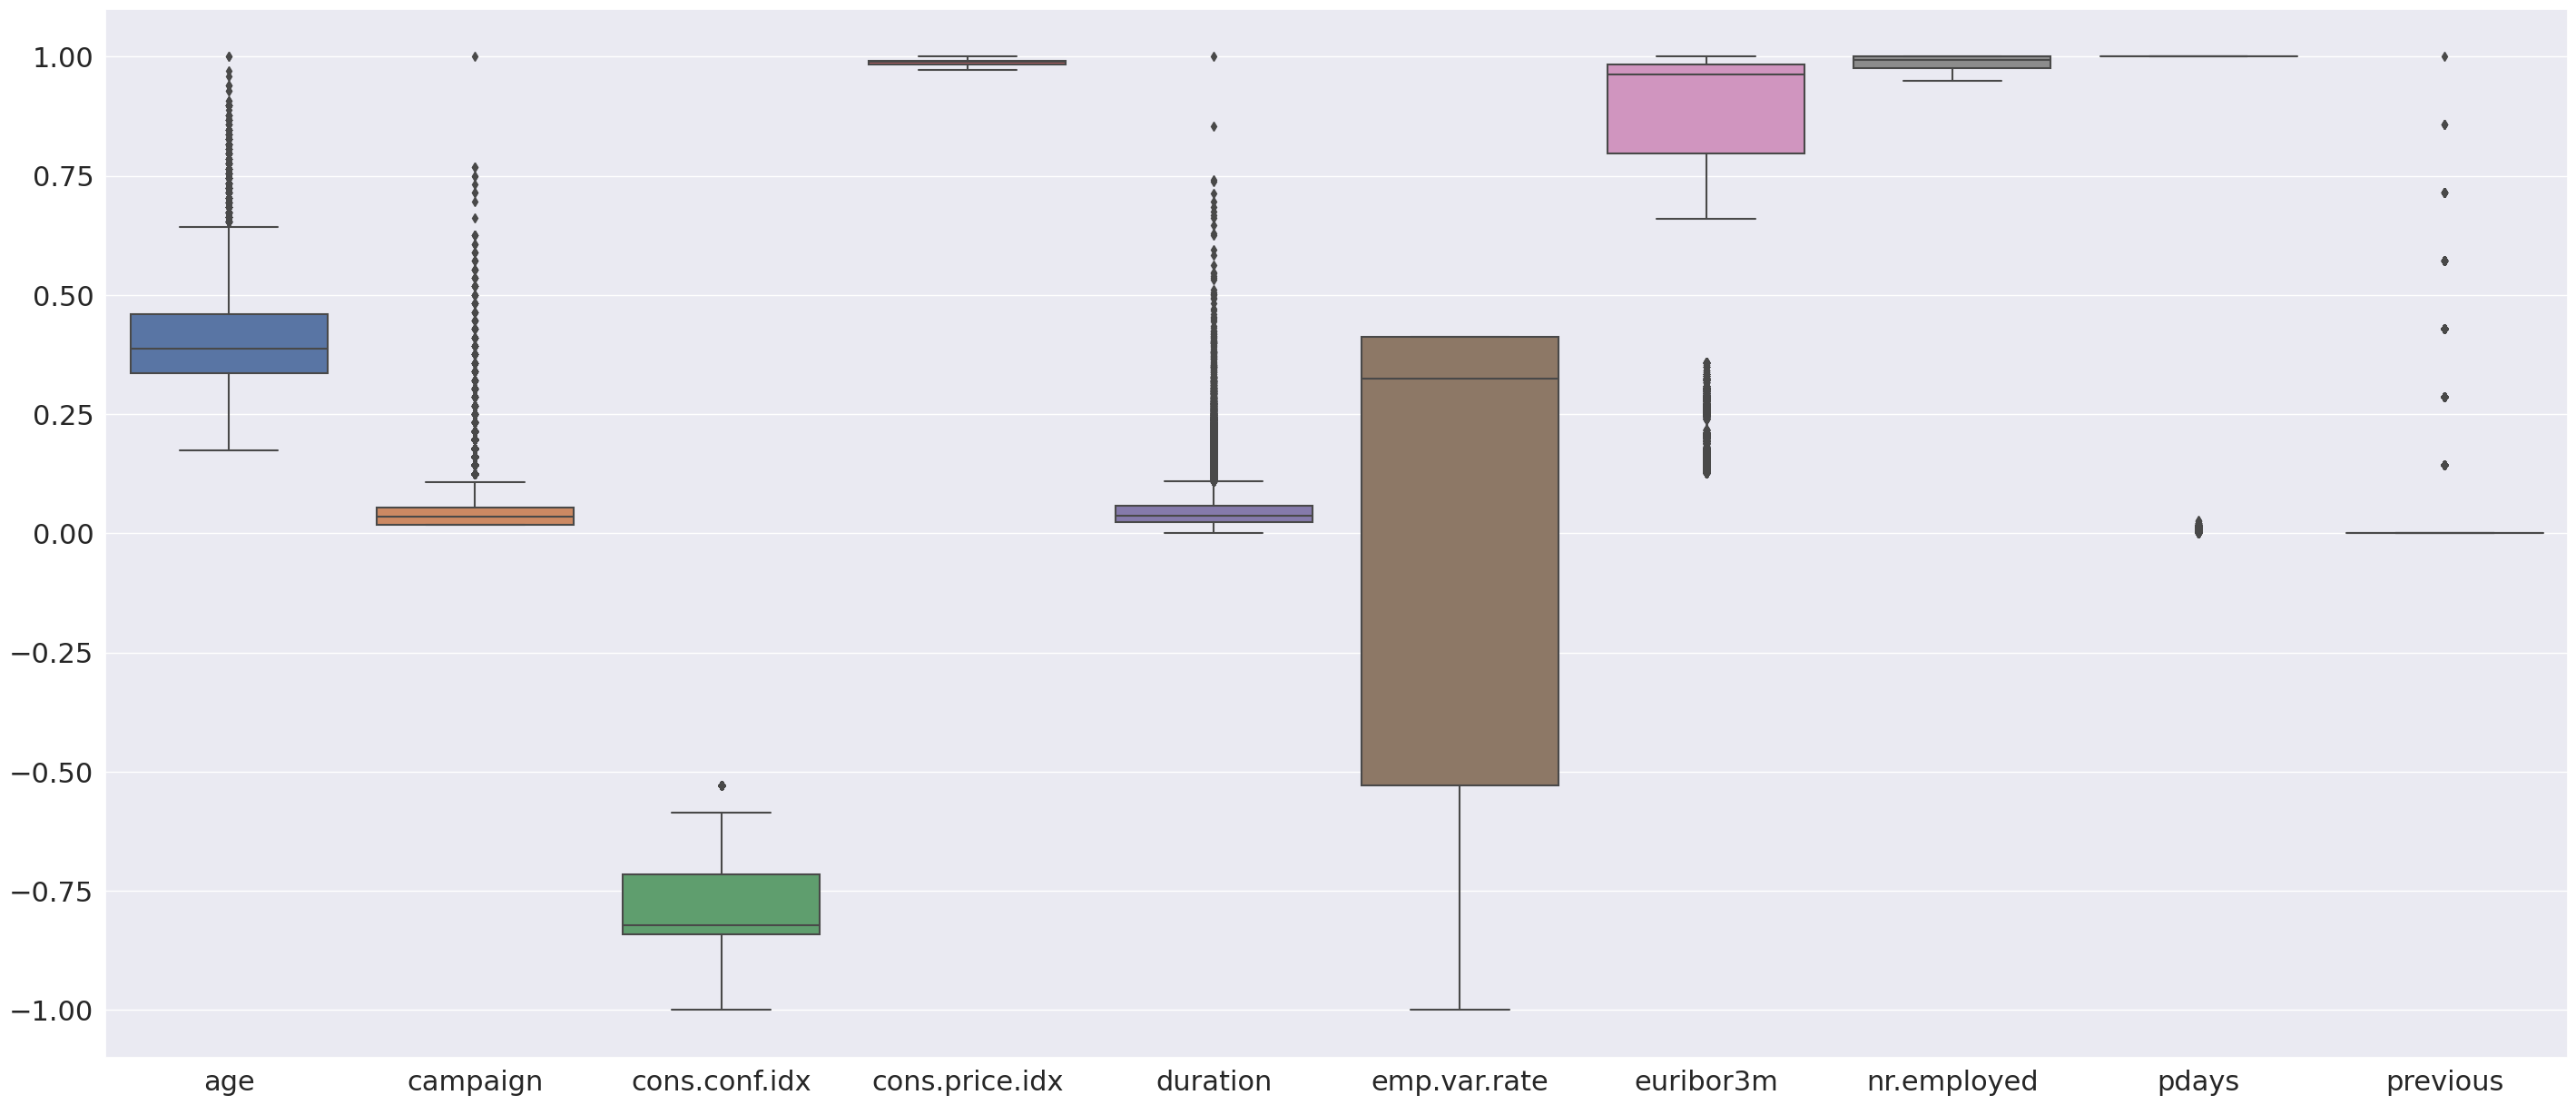

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_median_imputed_max_abs_scaled)
plt.show()

In [ ]:
numericals_with_most_frequent_imputed_max_abs_scaled = pd.DataFrame(
    max_abs_scaler.fit_transform(numericals_with_most_frequent_imputed),
    columns=numerical_features
)

In [ ]:
numericals_with_most_frequent_imputed_max_abs_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,0.394720,0.103139,0.173469,0.316327,0.367347,0.459184,1.000000
campaign,41188.0,0.045558,0.049362,0.017857,0.017857,0.035714,0.053571,1.000000
cons.conf.idx,41188.0,-0.785472,0.088991,-1.000000,-0.840551,-0.803150,-0.716535,-0.529528
cons.price.idx,41188.0,0.988523,0.005626,0.972923,0.983465,0.991041,0.991843,1.000000
duration,41188.0,0.047019,0.050046,0.000000,0.017283,0.030297,0.057544,1.000000
emp.var.rate,41188.0,0.068701,0.452415,-1.000000,-0.529412,0.323529,0.411765,0.411765
euribor3m,41188.0,0.779009,0.315941,0.125669,0.797027,0.962735,0.982755,1.000000
nr.employed,41188.0,0.990543,0.013240,0.949408,0.975326,1.000000,1.000000,1.000000
pdays,41188.0,0.964188,0.185244,0.000000,1.000000,1.000000,1.000000,1.000000
previous,41188.0,0.022659,0.067988,0.000000,0.000000,0.000000,0.000000,1.000000


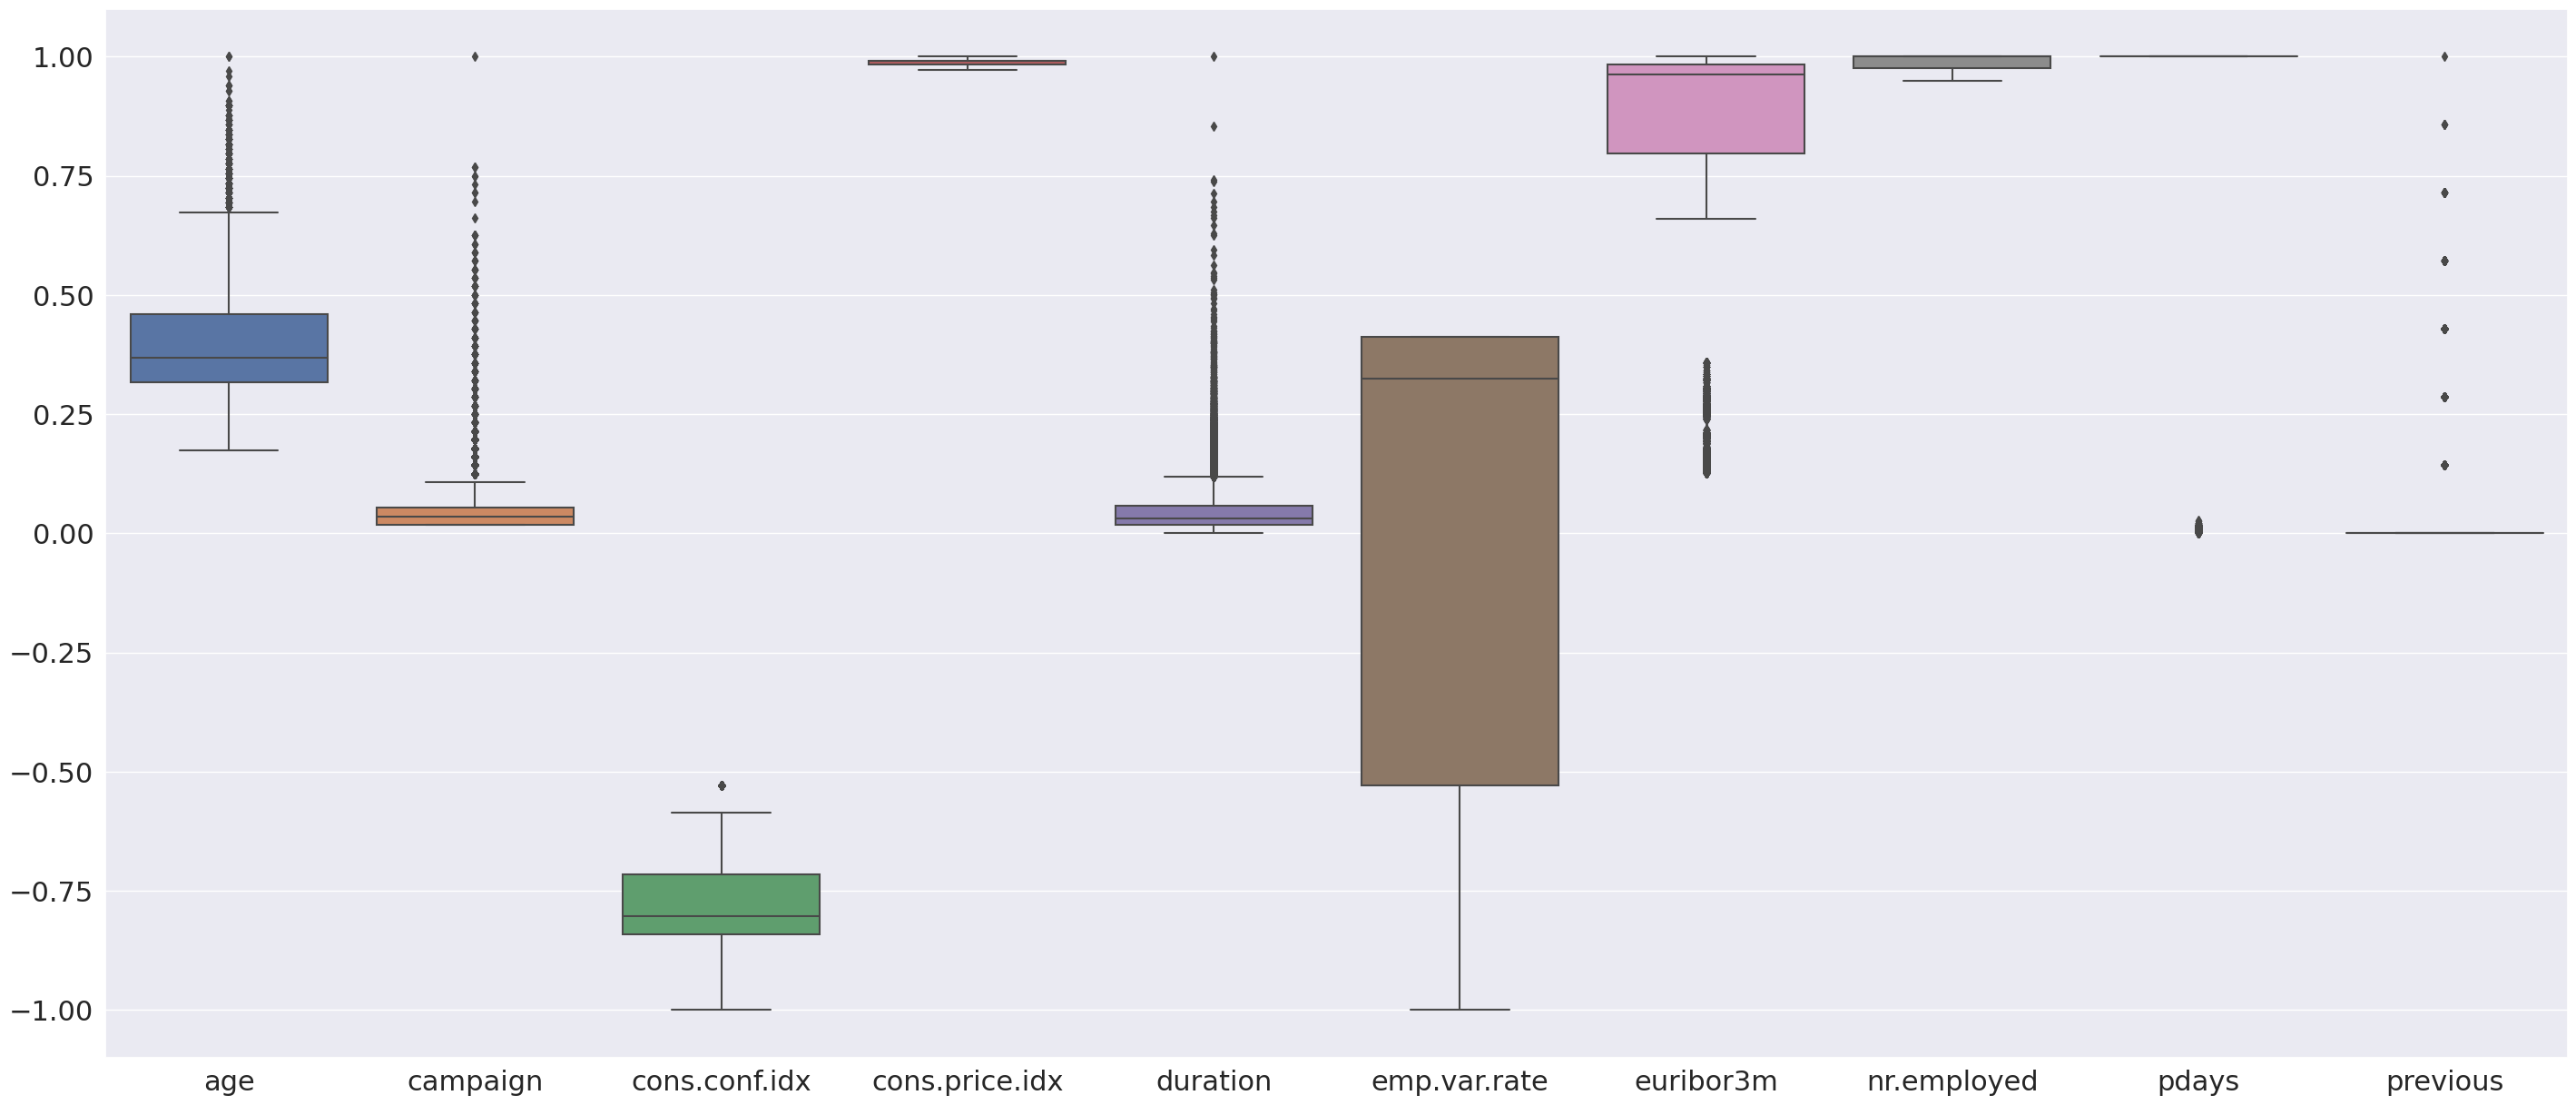

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_most_frequent_imputed_max_abs_scaled)
plt.show()

## sklearn.preprocessing.MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
numericals_with_mean_imputed_min_max_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(numericals_with_mean_imputed),
    columns=numerical_features
)

In [ ]:
numericals_with_mean_imputed_min_max_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,0.284302,0.118303,0.0,0.197531,0.284302,0.345679,1.0
campaign,41188.0,0.028523,0.050170,0.0,0.000000,0.018182,0.036364,1.0
cons.conf.idx,41188.0,0.430678,0.179083,0.0,0.338912,0.418410,0.602510,1.0
cons.price.idx,41188.0,0.536414,0.195701,0.0,0.389322,0.536414,0.669135,1.0
duration,41188.0,0.052438,0.048410,0.0,0.023383,0.044124,0.057544,1.0
emp.var.rate,41188.0,0.725070,0.308118,0.0,0.333333,0.937500,1.000000,1.0
euribor3m,41188.0,0.675219,0.339763,0.0,0.675219,0.675219,0.980277,1.0
nr.employed,41188.0,0.769583,0.245672,0.0,0.512287,0.859735,1.000000,1.0
pdays,41188.0,0.963464,0.185174,0.0,1.000000,1.000000,1.000000,1.0
previous,41188.0,0.024570,0.067669,0.0,0.000000,0.000000,0.000000,1.0


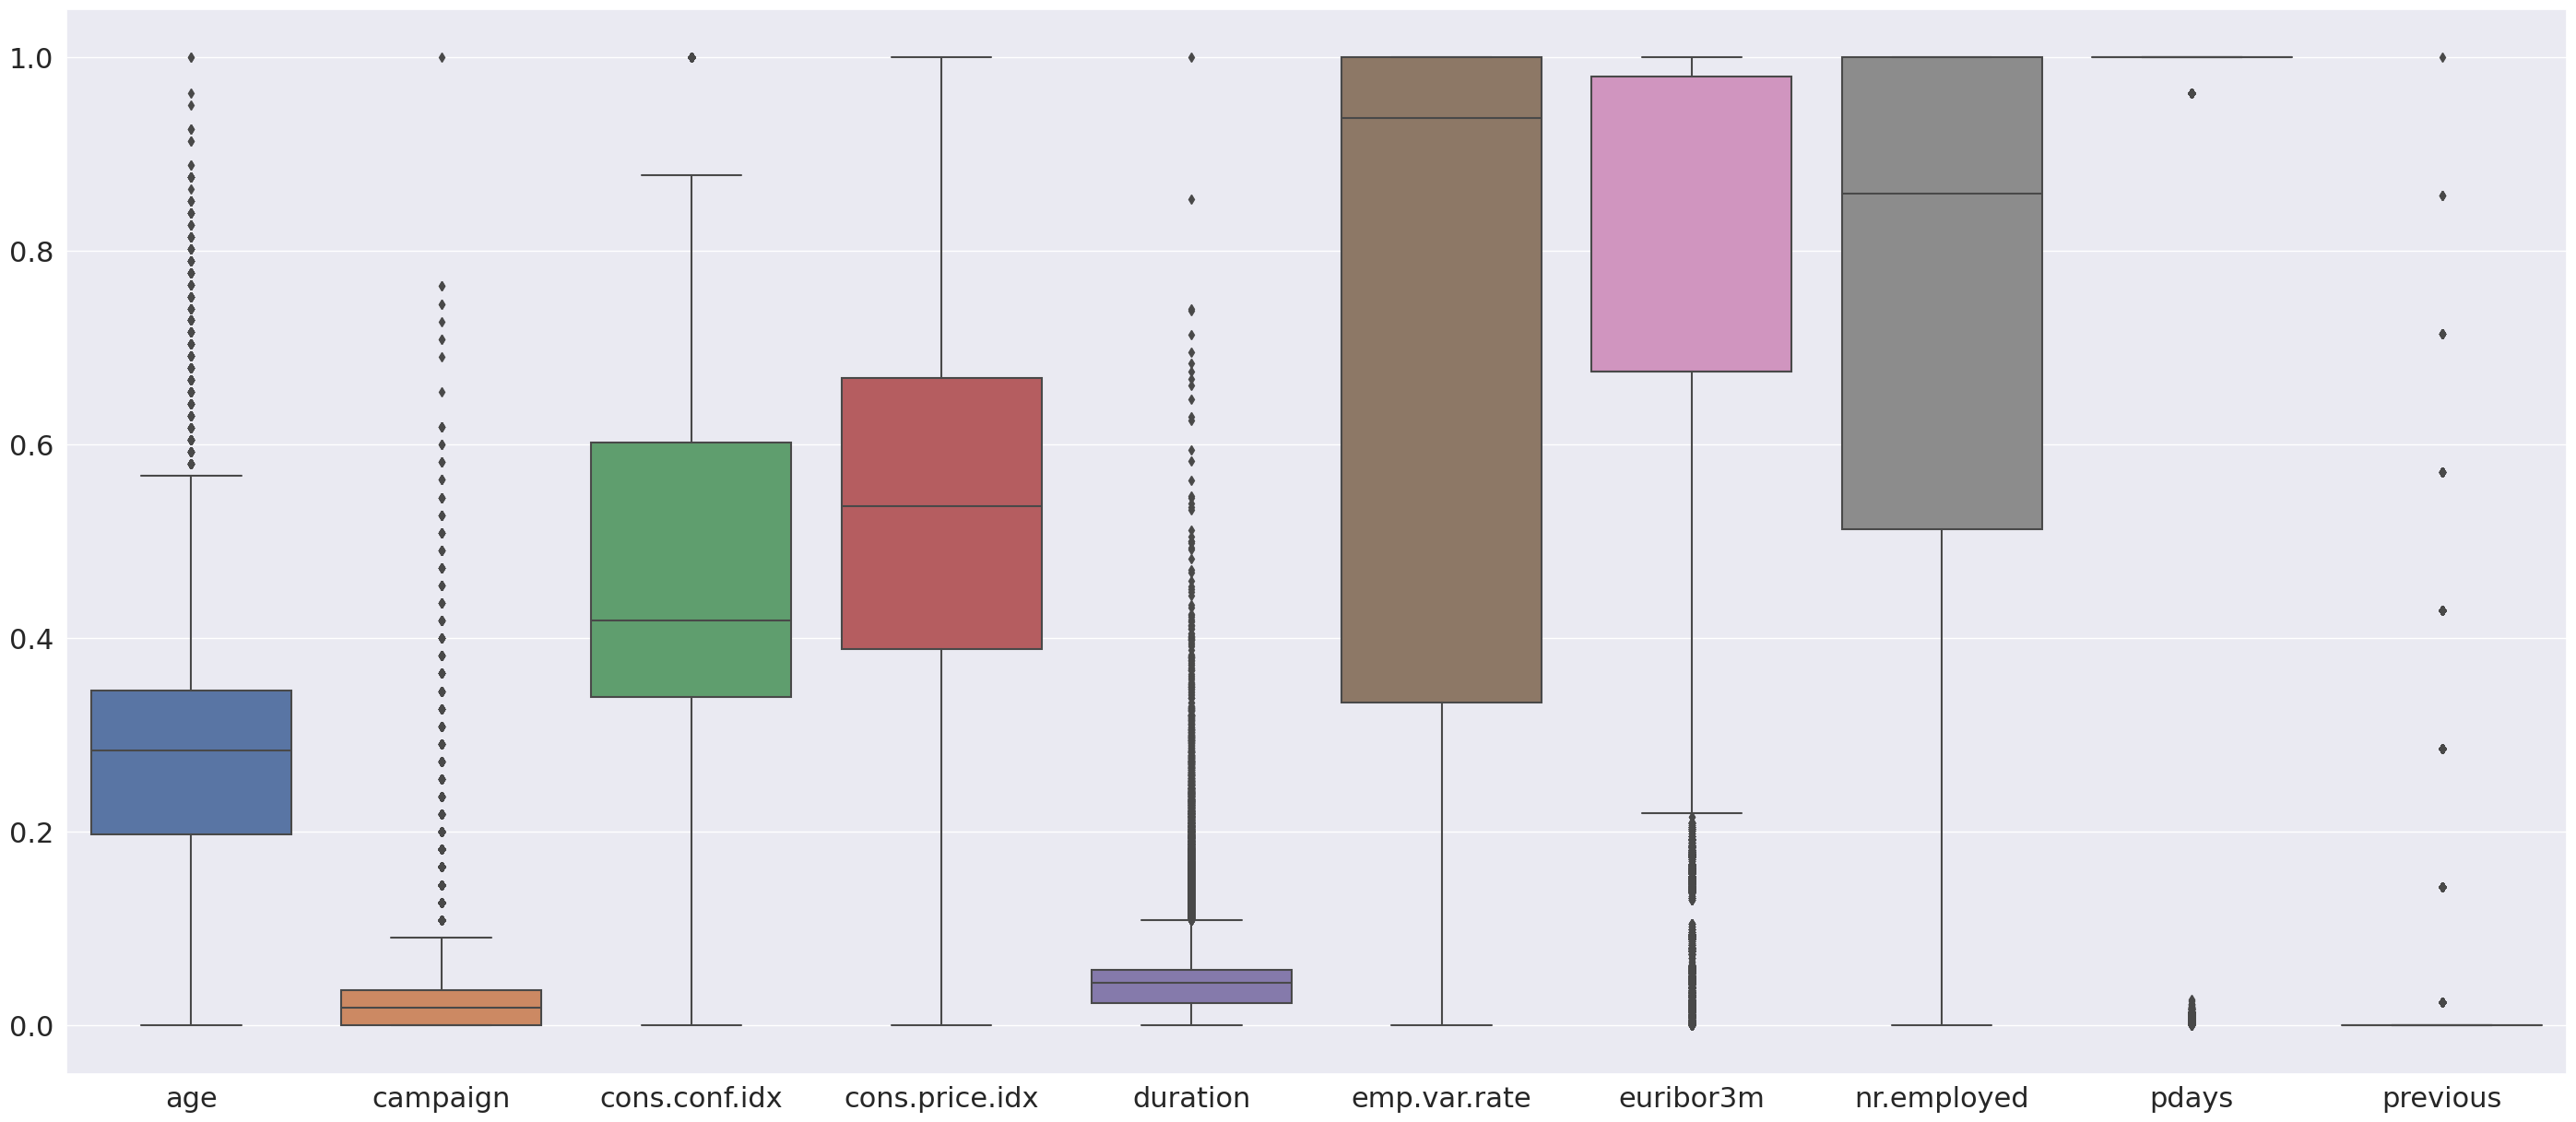

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_mean_imputed_min_max_scaled)
plt.show()

In [ ]:
numericals_with_median_imputed_min_max_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(numericals_with_median_imputed),
    columns=numerical_features
)

In [ ]:
numericals_with_median_imputed_min_max_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,0.280569,0.118638,0.0,0.197531,0.259259,0.345679,1.0
campaign,41188.0,0.028408,0.050181,0.0,0.000000,0.018182,0.036364,1.0
cons.conf.idx,41188.0,0.422709,0.180107,0.0,0.338912,0.376569,0.602510,1.0
cons.price.idx,41188.0,0.552778,0.197801,0.0,0.389322,0.603274,0.669135,1.0
duration,41188.0,0.049965,0.048755,0.0,0.023383,0.036397,0.057544,1.0
emp.var.rate,41188.0,0.749738,0.315545,0.0,0.333333,0.937500,1.000000,1.0
euribor3m,41188.0,0.747246,0.361351,0.0,0.767853,0.957379,0.980277,1.0
nr.employed,41188.0,0.786596,0.248192,0.0,0.512287,0.859735,1.000000,1.0
pdays,41188.0,0.964188,0.185244,0.0,1.000000,1.000000,1.000000,1.0
previous,41188.0,0.022659,0.067988,0.0,0.000000,0.000000,0.000000,1.0


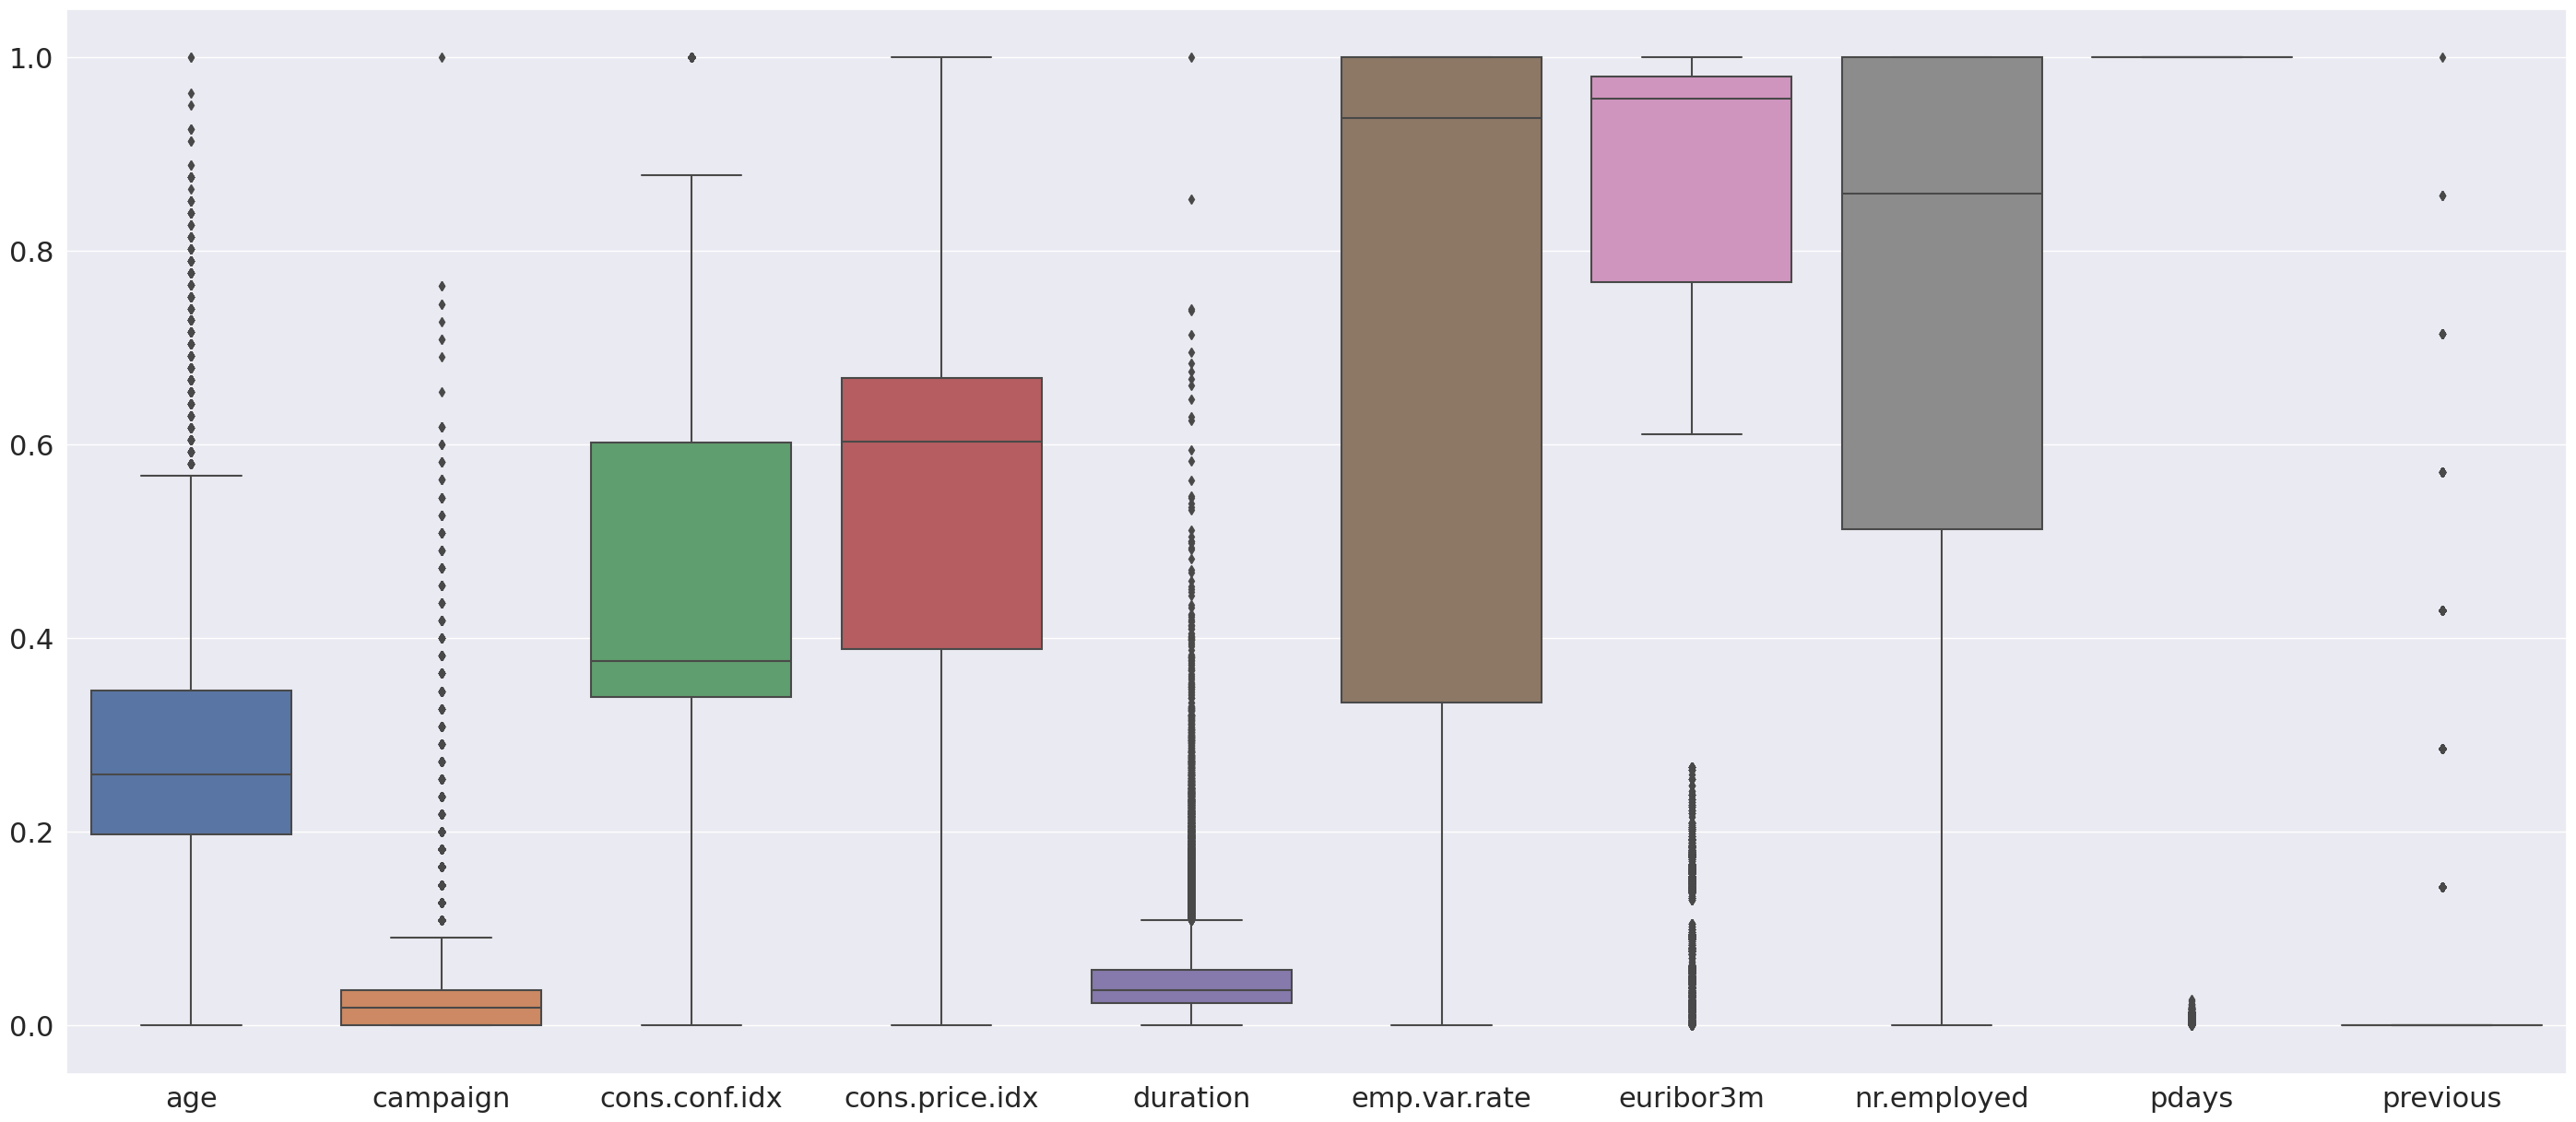

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_median_imputed_min_max_scaled)
plt.show()

In [ ]:
numericals_with_most_frequent_imputed_min_max_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(numericals_with_most_frequent_imputed),
    columns=numerical_features
)

In [ ]:
numericals_with_most_frequent_imputed_min_max_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,0.267686,0.124786,0.0,0.172840,0.234568,0.345679,1.0
campaign,41188.0,0.028205,0.050259,0.0,0.000000,0.018182,0.036364,1.0
cons.conf.idx,41188.0,0.455985,0.189153,0.0,0.338912,0.418410,0.602510,1.0
cons.price.idx,41188.0,0.576147,0.207775,0.0,0.389322,0.669135,0.698753,1.0
duration,41188.0,0.047019,0.050046,0.0,0.017283,0.030297,0.057544,1.0
emp.var.rate,41188.0,0.756996,0.320461,0.0,0.333333,0.937500,1.000000,1.0
euribor3m,41188.0,0.747246,0.361351,0.0,0.767853,0.957379,0.980277,1.0
nr.employed,41188.0,0.813067,0.261694,0.0,0.512287,1.000000,1.000000,1.0
pdays,41188.0,0.964188,0.185244,0.0,1.000000,1.000000,1.000000,1.0
previous,41188.0,0.022659,0.067988,0.0,0.000000,0.000000,0.000000,1.0


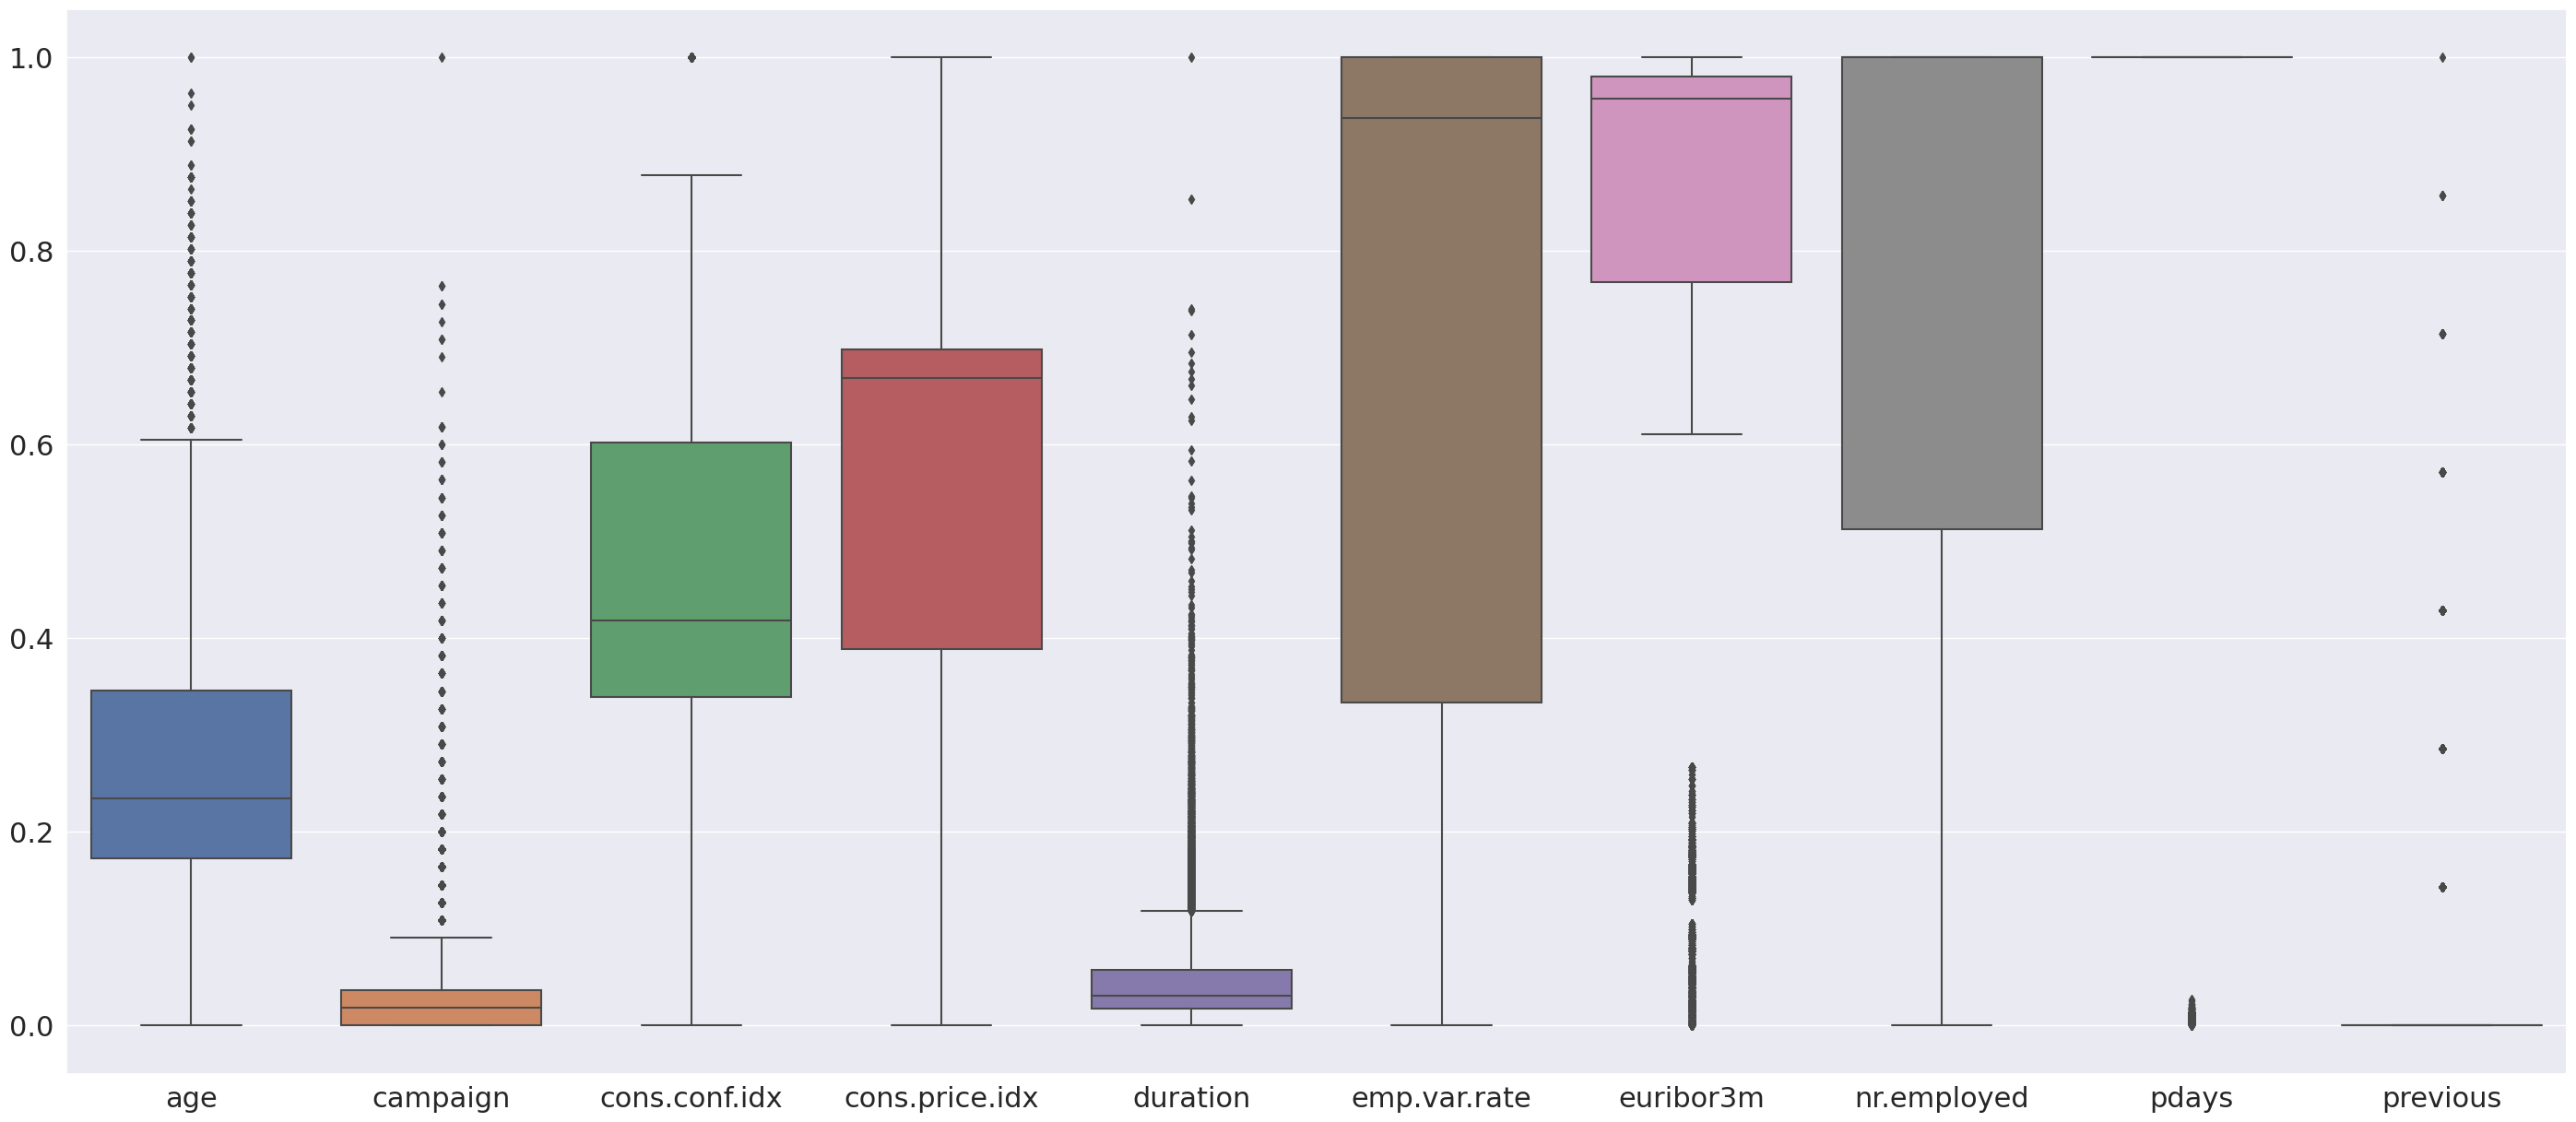

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_most_frequent_imputed_min_max_scaled)
plt.show()

## sklearn.preprocessing.RobustScaler

In [ ]:
robust_scaler = RobustScaler()

In [ ]:
numericals_with_mean_imputed_robust_scaled = pd.DataFrame(
    robust_scaler.fit_transform(numericals_with_mean_imputed),
    columns=numerical_features
)

In [ ]:
numericals_with_mean_imputed_robust_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,2.284060e-16,0.798543,-1.919037,-0.585704,0.0,0.414296,4.830963
campaign,41188.0,2.843867e-01,1.379664,-0.500000,-0.500000,0.0,0.500000,27.000000
cons.conf.idx,41188.0,4.654208e-02,0.679378,-1.587302,-0.301587,0.0,0.698413,2.206349
cons.price.idx,41188.0,-3.111428e-15,0.699398,-1.917045,-0.525680,0.0,0.474320,1.656772
duration,41188.0,2.433820e-01,1.417135,-1.291667,-0.607143,0.0,0.392857,27.982143
emp.var.rate,41188.0,-3.186453e-01,0.462177,-1.406250,-0.906250,0.0,0.093750,0.093750
euribor3m,41188.0,2.539378e-16,1.113770,-2.213420,0.000000,0.0,1.000000,1.064655
nr.employed,41188.0,-1.848481e-01,0.503723,-1.762791,-0.712403,0.0,0.287597,0.287597
pdays,41188.0,-3.649980e+01,184.988501,-999.000000,0.000000,0.0,0.000000,0.000000
previous,41188.0,1.719935e-01,0.473683,0.000000,0.000000,0.0,0.000000,7.000000


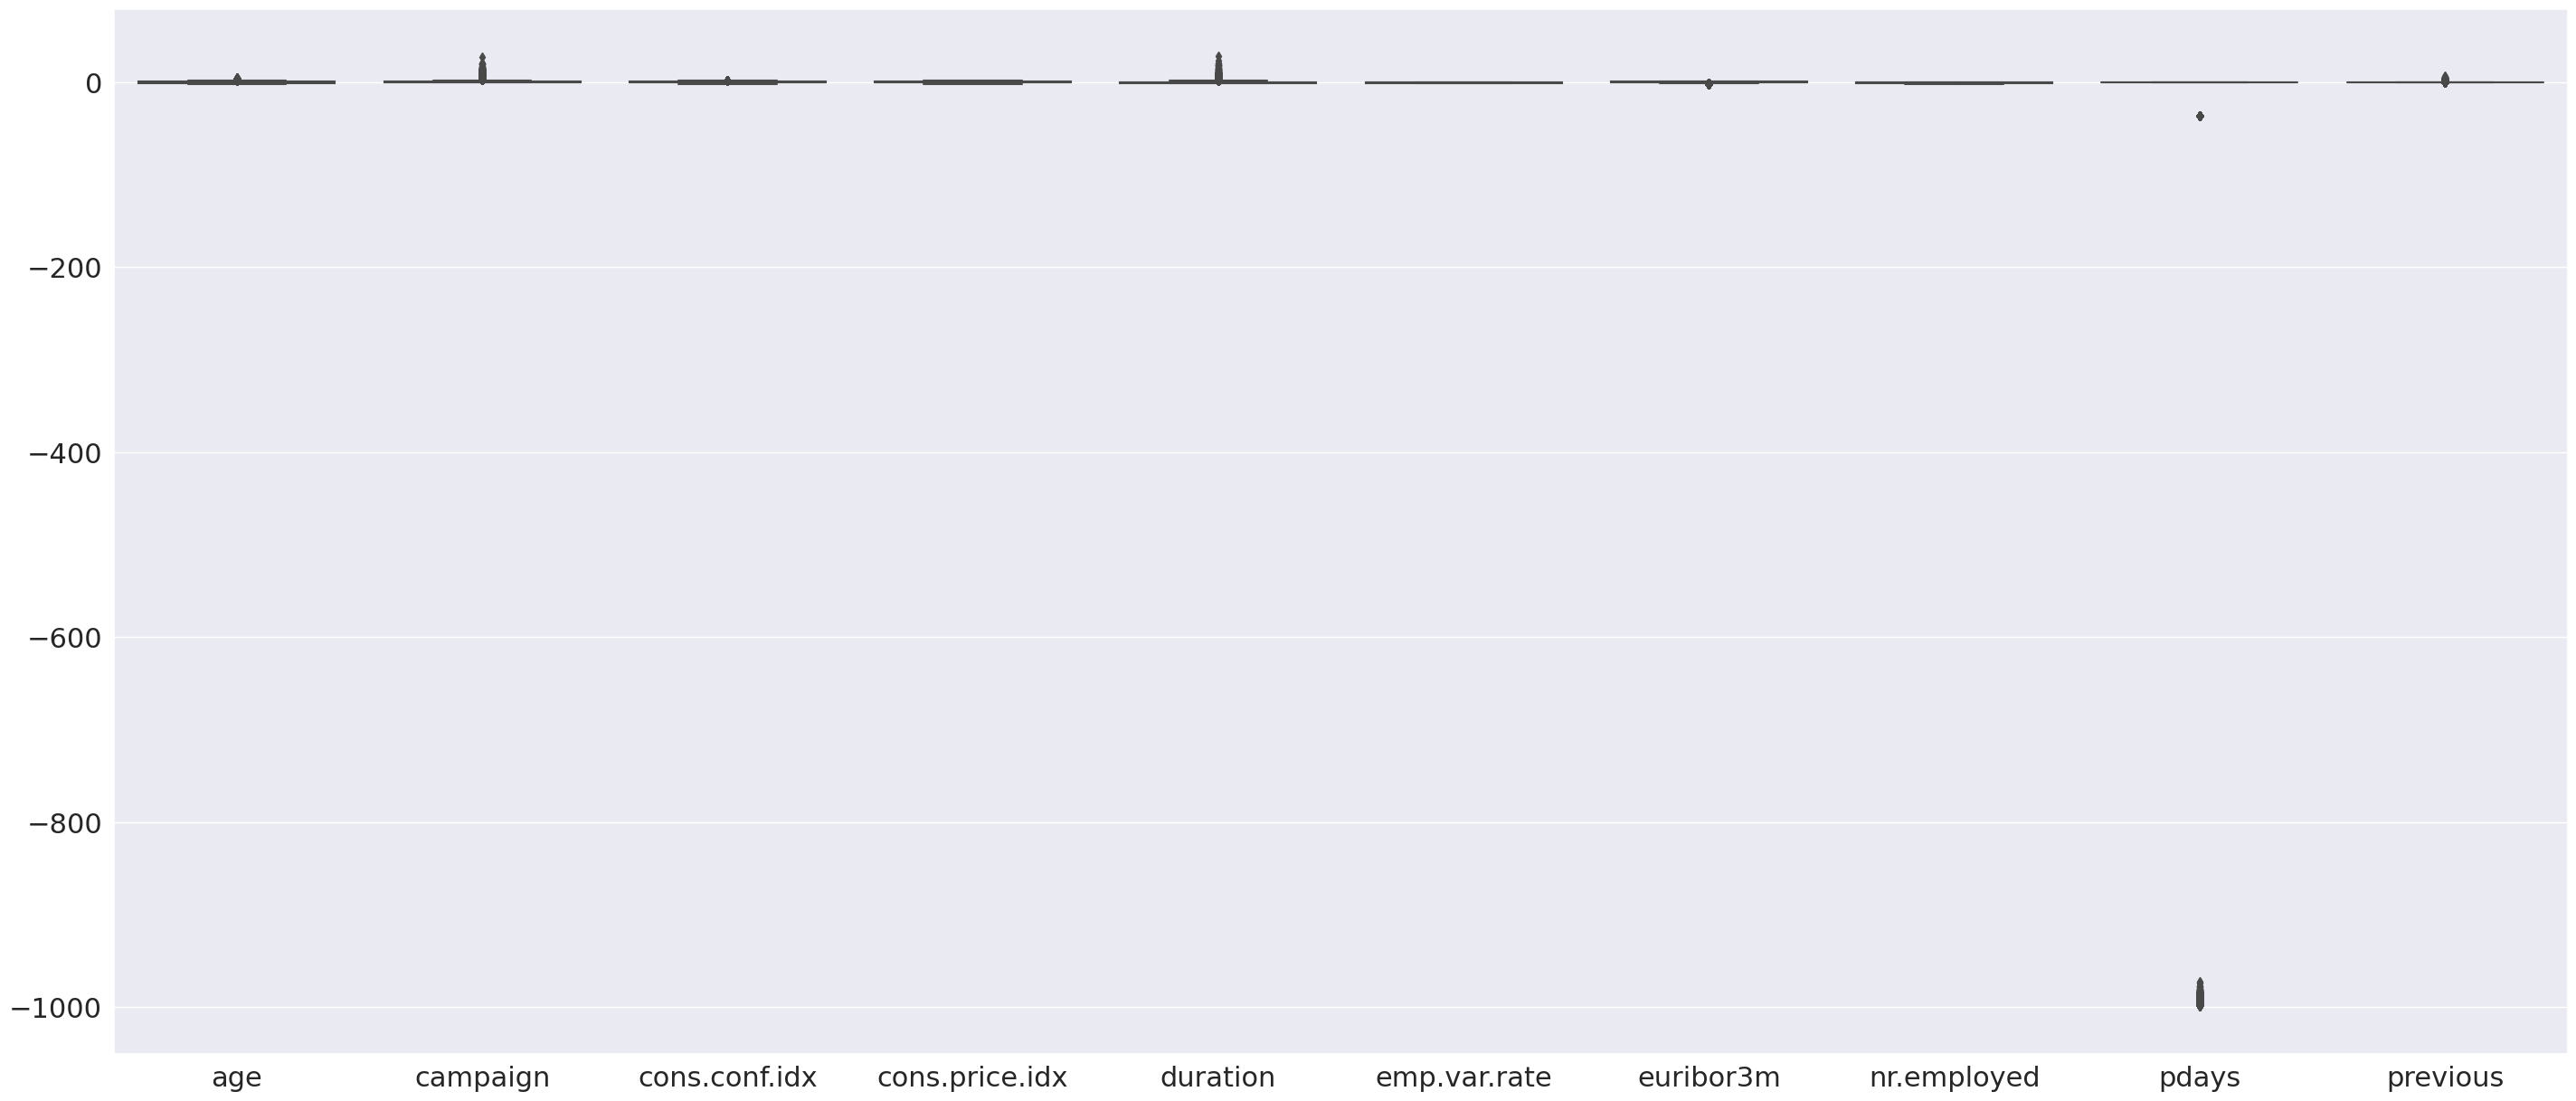

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_mean_imputed_robust_scaled)
plt.show()

In [ ]:
numericals_with_median_imputed_robust_scaled = pd.DataFrame(
    robust_scaler.fit_transform(numericals_with_median_imputed),
    columns=numerical_features
)

In [ ]:
numericals_with_median_imputed_robust_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,0.143838,0.800809,-1.750000,-0.416667,0.0,0.583333,5.000000
campaign,41188.0,0.281211,1.379988,-0.500000,-0.500000,0.0,0.500000,27.000000
cons.conf.idx,41188.0,0.175041,0.683262,-1.428571,-0.142857,0.0,0.857143,2.365079
cons.price.idx,41188.0,-0.180461,0.706903,-2.155989,-0.764624,0.0,0.235376,1.417827
duration,41188.0,0.397189,1.427243,-1.065476,-0.380952,0.0,0.619048,28.208333
emp.var.rate,41188.0,-0.281642,0.473317,-1.406250,-0.906250,0.0,0.093750,0.093750
euribor3m,41188.0,-0.989219,1.701089,-4.506937,-0.892209,0.0,0.107791,0.200640
nr.employed,41188.0,-0.149964,0.508889,-1.762791,-0.712403,0.0,0.287597,0.287597
pdays,41188.0,-35.776683,185.058415,-999.000000,0.000000,0.0,0.000000,0.000000
previous,41188.0,0.158614,0.475918,0.000000,0.000000,0.0,0.000000,7.000000


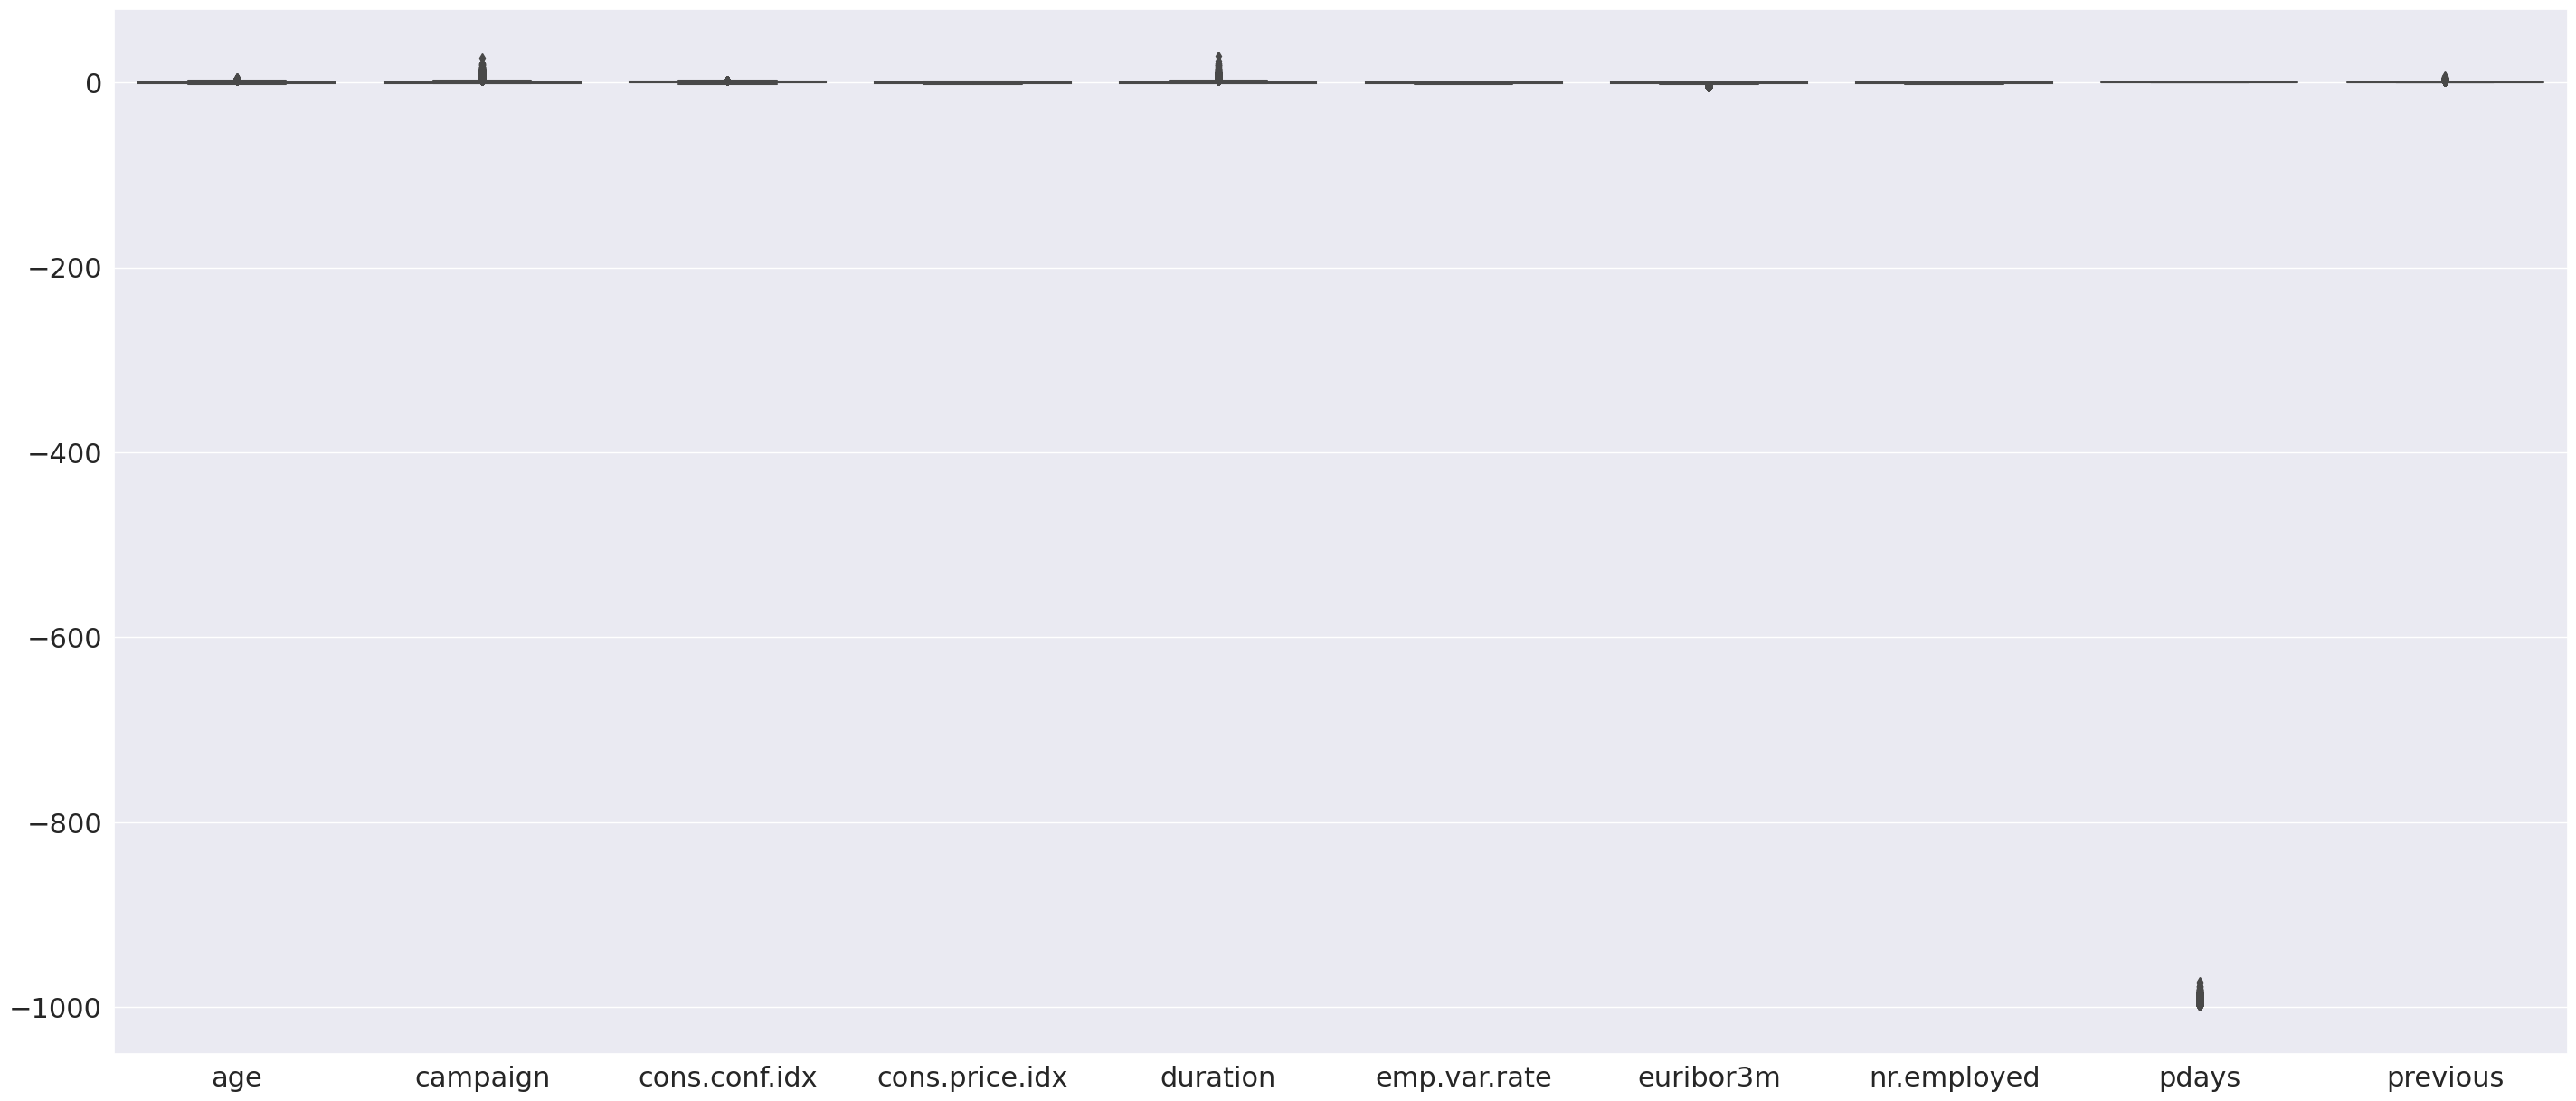

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_median_imputed_robust_scaled)
plt.show()

In [ ]:
numericals_with_most_frequent_imputed_robust_scaled = pd.DataFrame(
    robust_scaler.fit_transform(numericals_with_most_frequent_imputed),
    columns=numerical_features
)

In [ ]:
numericals_with_most_frequent_imputed_robust_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,0.191611,0.721976,-1.357143,-0.357143,0.0,0.642857,4.428571
campaign,41188.0,0.275626,1.382124,-0.500000,-0.500000,0.0,0.500000,27.000000
cons.conf.idx,41188.0,0.142547,0.717581,-1.587302,-0.301587,0.0,0.698413,2.206349
cons.price.idx,41188.0,-0.300511,0.671474,-2.162469,-0.904282,0.0,0.095718,1.069270
duration,41188.0,0.415343,1.243069,-0.752525,-0.323232,0.0,0.676768,24.085859
emp.var.rate,41188.0,-0.270755,0.480691,-1.406250,-0.906250,0.0,0.093750,0.093750
euribor3m,41188.0,-0.989219,1.701089,-4.506937,-0.892209,0.0,0.107791,0.200640
nr.employed,41188.0,-0.383285,0.536573,-2.050388,-1.000000,0.0,0.000000,0.000000
pdays,41188.0,-35.776683,185.058415,-999.000000,0.000000,0.0,0.000000,0.000000
previous,41188.0,0.158614,0.475918,0.000000,0.000000,0.0,0.000000,7.000000


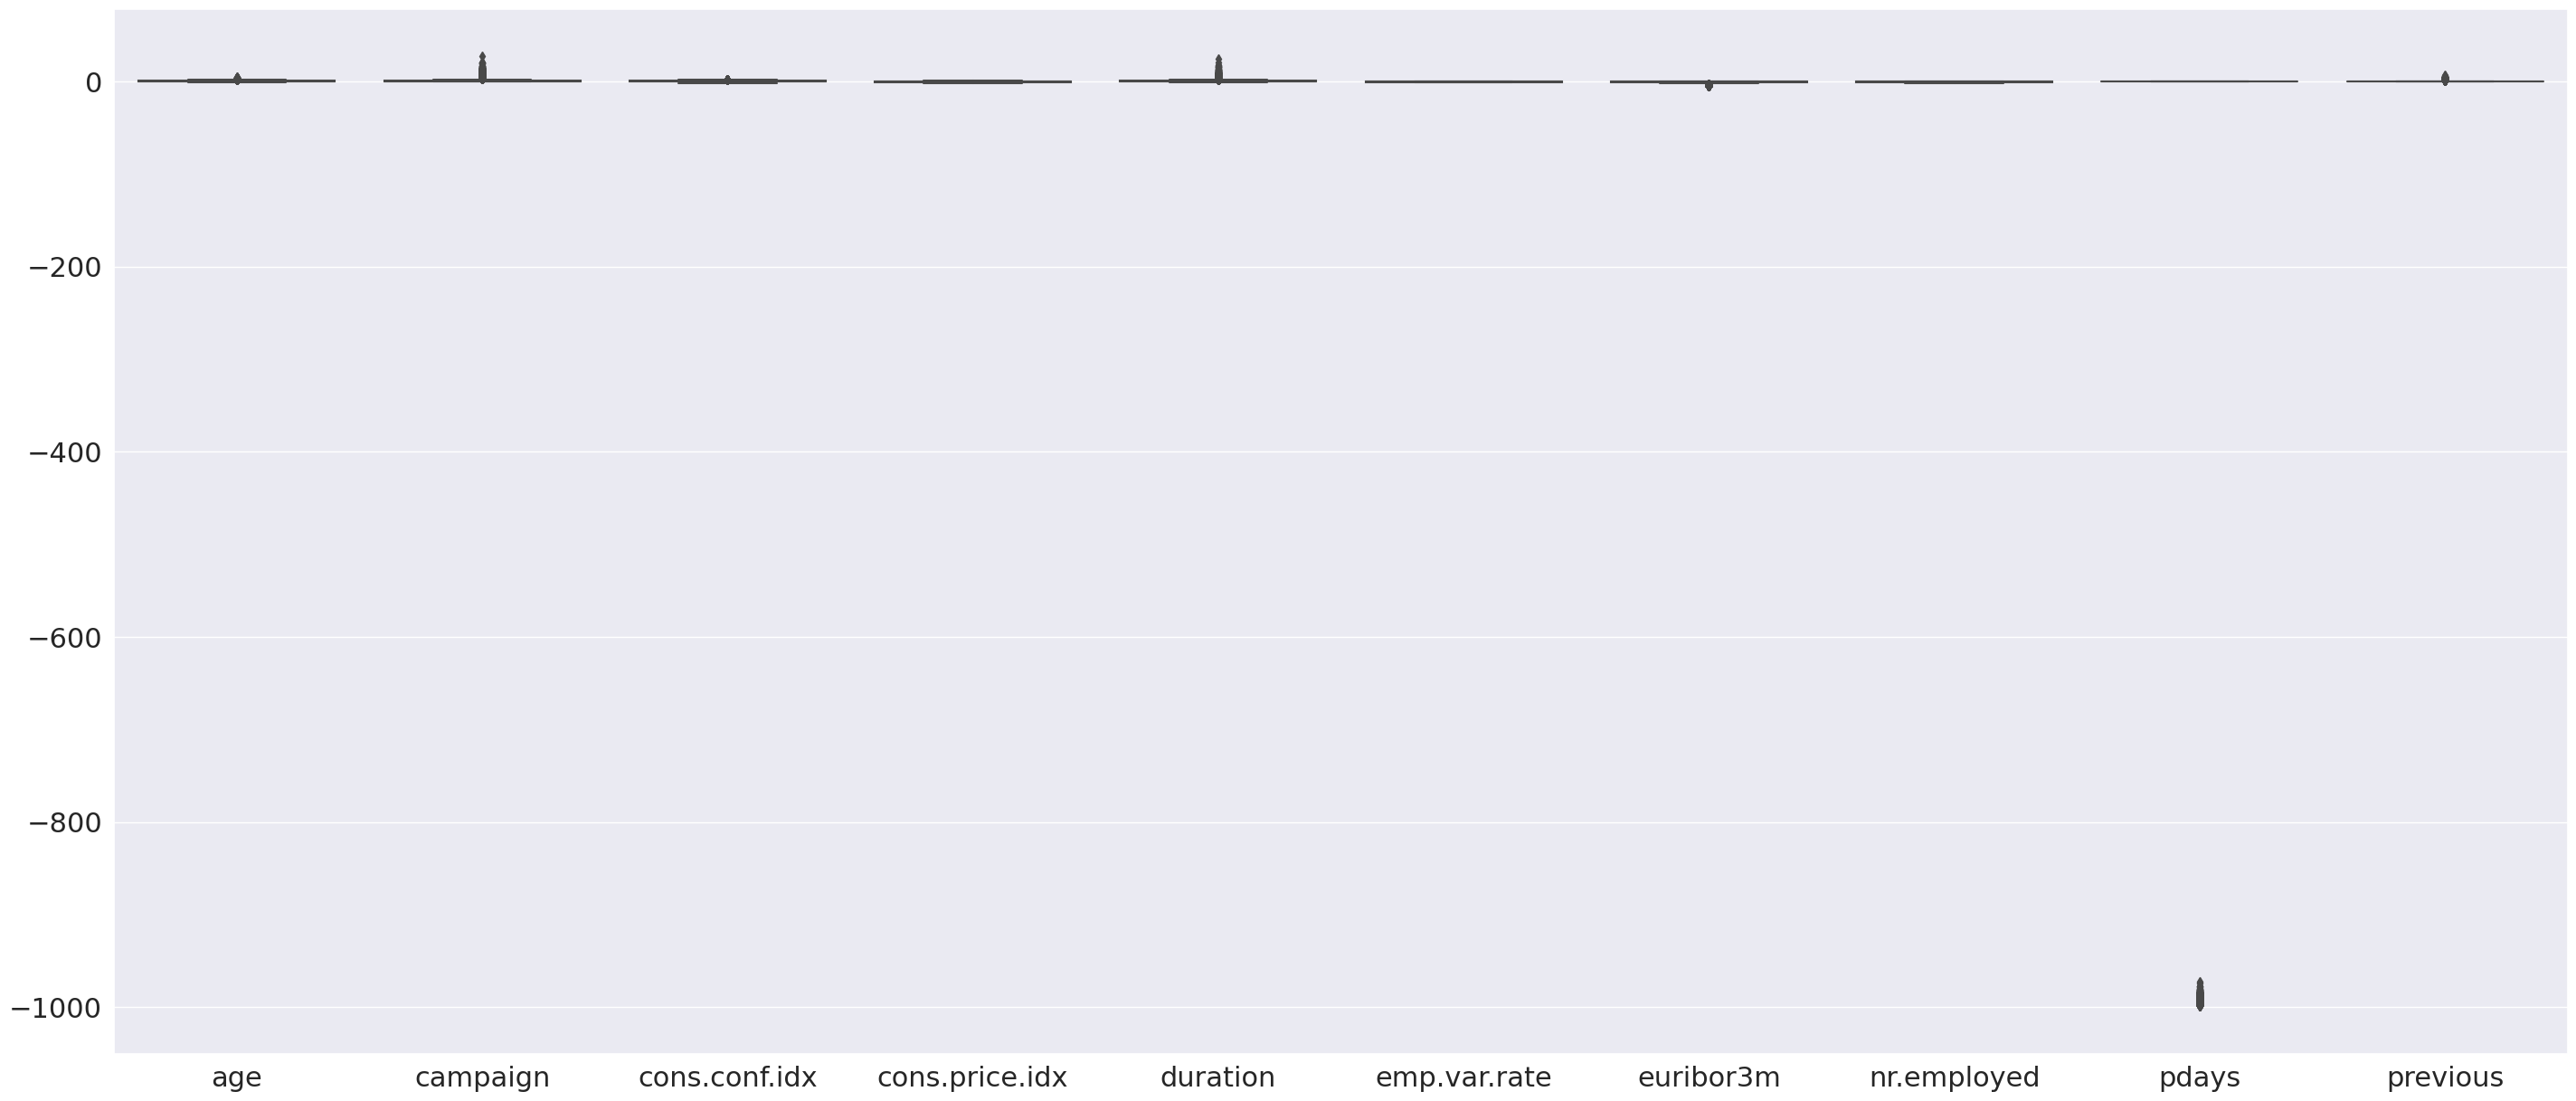

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_most_frequent_imputed_robust_scaled)
plt.show()

## sklearn.preprocessing.StandardScaler

In [ ]:
standard_scaler = StandardScaler()

In [ ]:
numericals_with_mean_imputed_standard_scaled = pd.DataFrame(
    standard_scaler.fit_transform(numericals_with_mean_imputed),
    columns=numerical_features
)

In [ ]:
numericals_with_mean_imputed_standard_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,-4.747532e-16,1.000012,-2.403202,-7.334746e-01,-7.415081e-16,0.518821,6.049795
campaign,41188.0,9.298401e-17,1.000012,-0.568541,-5.685414e-01,-2.061300e-01,0.156281,19.364089
cons.conf.idx,41188.0,-4.554319e-16,1.000012,-2.404940,-5.124298e-01,-6.850771e-02,0.959522,3.179133
cons.price.idx,41188.0,-4.347304e-15,1.000012,-2.741026,-7.516265e-01,0.000000e+00,0.678192,2.368882
duration,41188.0,-2.328913e-17,1.000012,-1.083219,-6.001793e-01,-1.717443e-01,0.105478,19.574066
emp.var.rate,41188.0,-6.900483e-19,1.000012,-2.353250,-1.271400e+00,6.894527e-01,0.892300,0.892300
euribor3m,41188.0,-5.520386e-17,1.000012,-1.987347,-2.963206e-16,-2.963206e-16,0.897862,0.955914
nr.employed,41188.0,2.495215e-15,1.000012,-3.132601,-1.047325e+00,3.669684e-01,0.937918,0.937918
pdays,41188.0,1.904533e-16,1.000012,-5.203090,1.973109e-01,1.973109e-01,0.197311,0.197311
previous,41188.0,-6.900483e-18,1.000012,-0.363102,-3.631025e-01,-3.631025e-01,-0.363102,14.414885


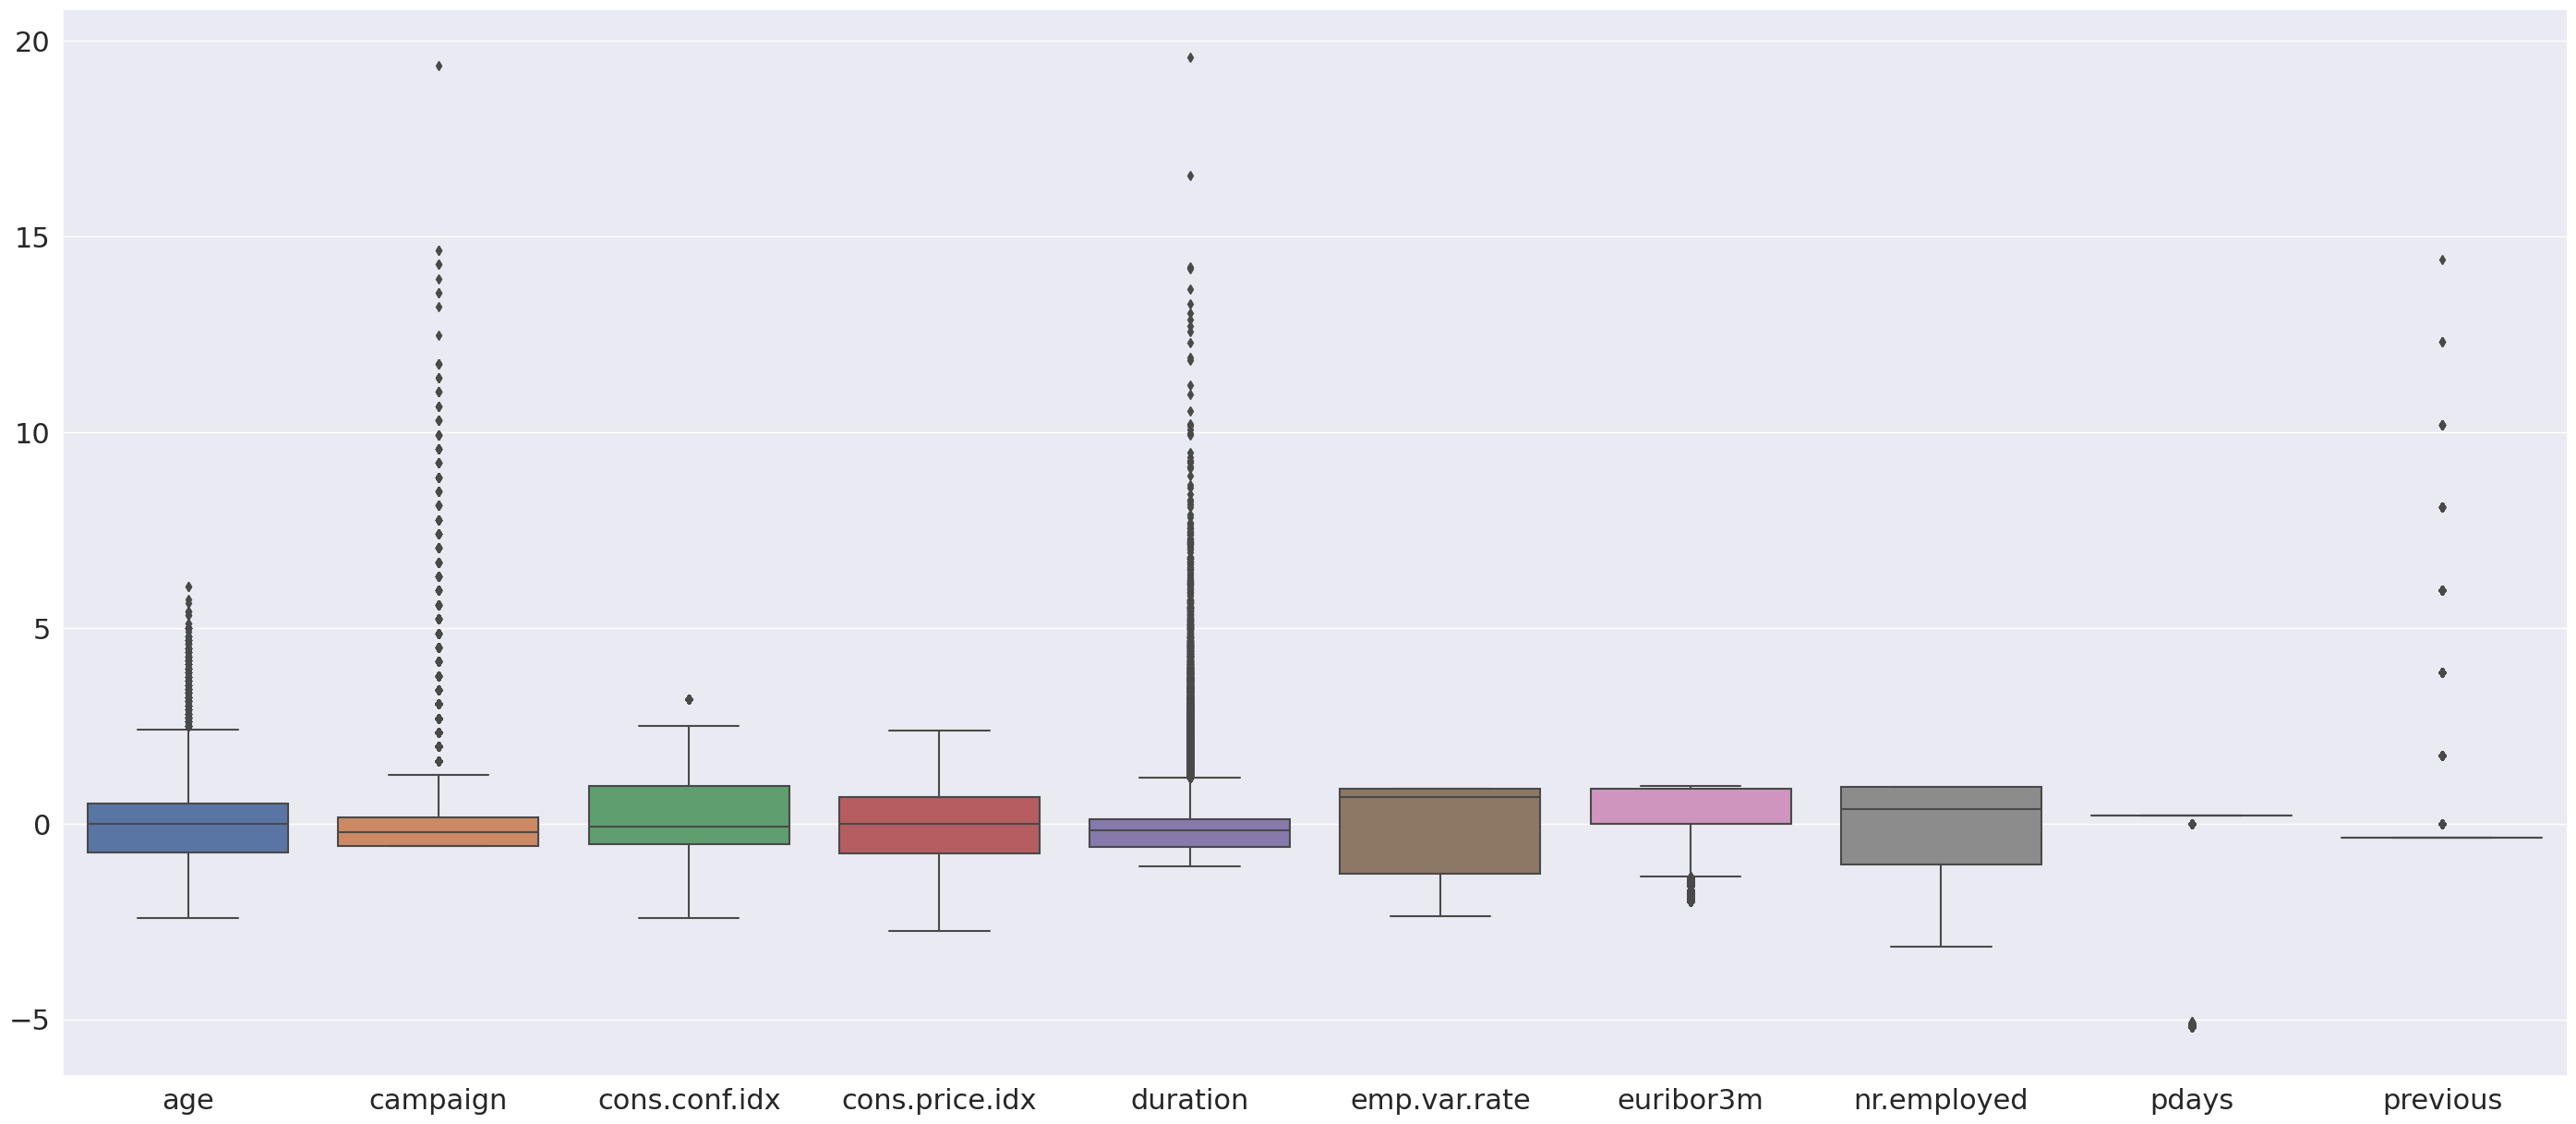

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_mean_imputed_standard_scaled)
plt.show()

In [ ]:
numericals_with_median_imputed_standard_scaled = pd.DataFrame(
    standard_scaler.fit_transform(numericals_with_median_imputed),
    columns=numerical_features
)

In [ ]:
numericals_with_median_imputed_standard_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,3.607227e-16,1.000012,-2.364934,-0.699932,-0.179618,0.548820,6.064141
campaign,41188.0,3.398488e-17,1.000012,-0.566107,-0.566107,-0.203780,0.158546,19.361849
cons.conf.idx,41188.0,1.173082e-16,1.000012,-2.347024,-0.465271,-0.256187,0.998315,3.205310
cons.price.idx,41188.0,-4.303969e-14,1.000012,-2.794658,-0.826379,0.255287,0.588260,2.261001
duration,41188.0,-3.277729e-18,1.000012,-1.024831,-0.545213,-0.278295,0.155447,19.486157
emp.var.rate,41188.0,2.083946e-16,1.000012,-2.376041,-1.319654,0.595046,0.793119,0.793119
euribor3m,41188.0,6.983289e-16,1.000012,-2.067947,0.057029,0.581528,0.644894,0.699478
nr.employed,41188.0,6.613423e-15,1.000012,-3.169349,-1.105244,0.294692,0.859845,0.859845
pdays,41188.0,-4.416309e-17,1.000012,-5.205032,0.193329,0.193329,0.193329,0.193329
previous,41188.0,-1.104077e-17,1.000012,-0.333284,-0.333284,-0.333284,-0.333284,14.375308


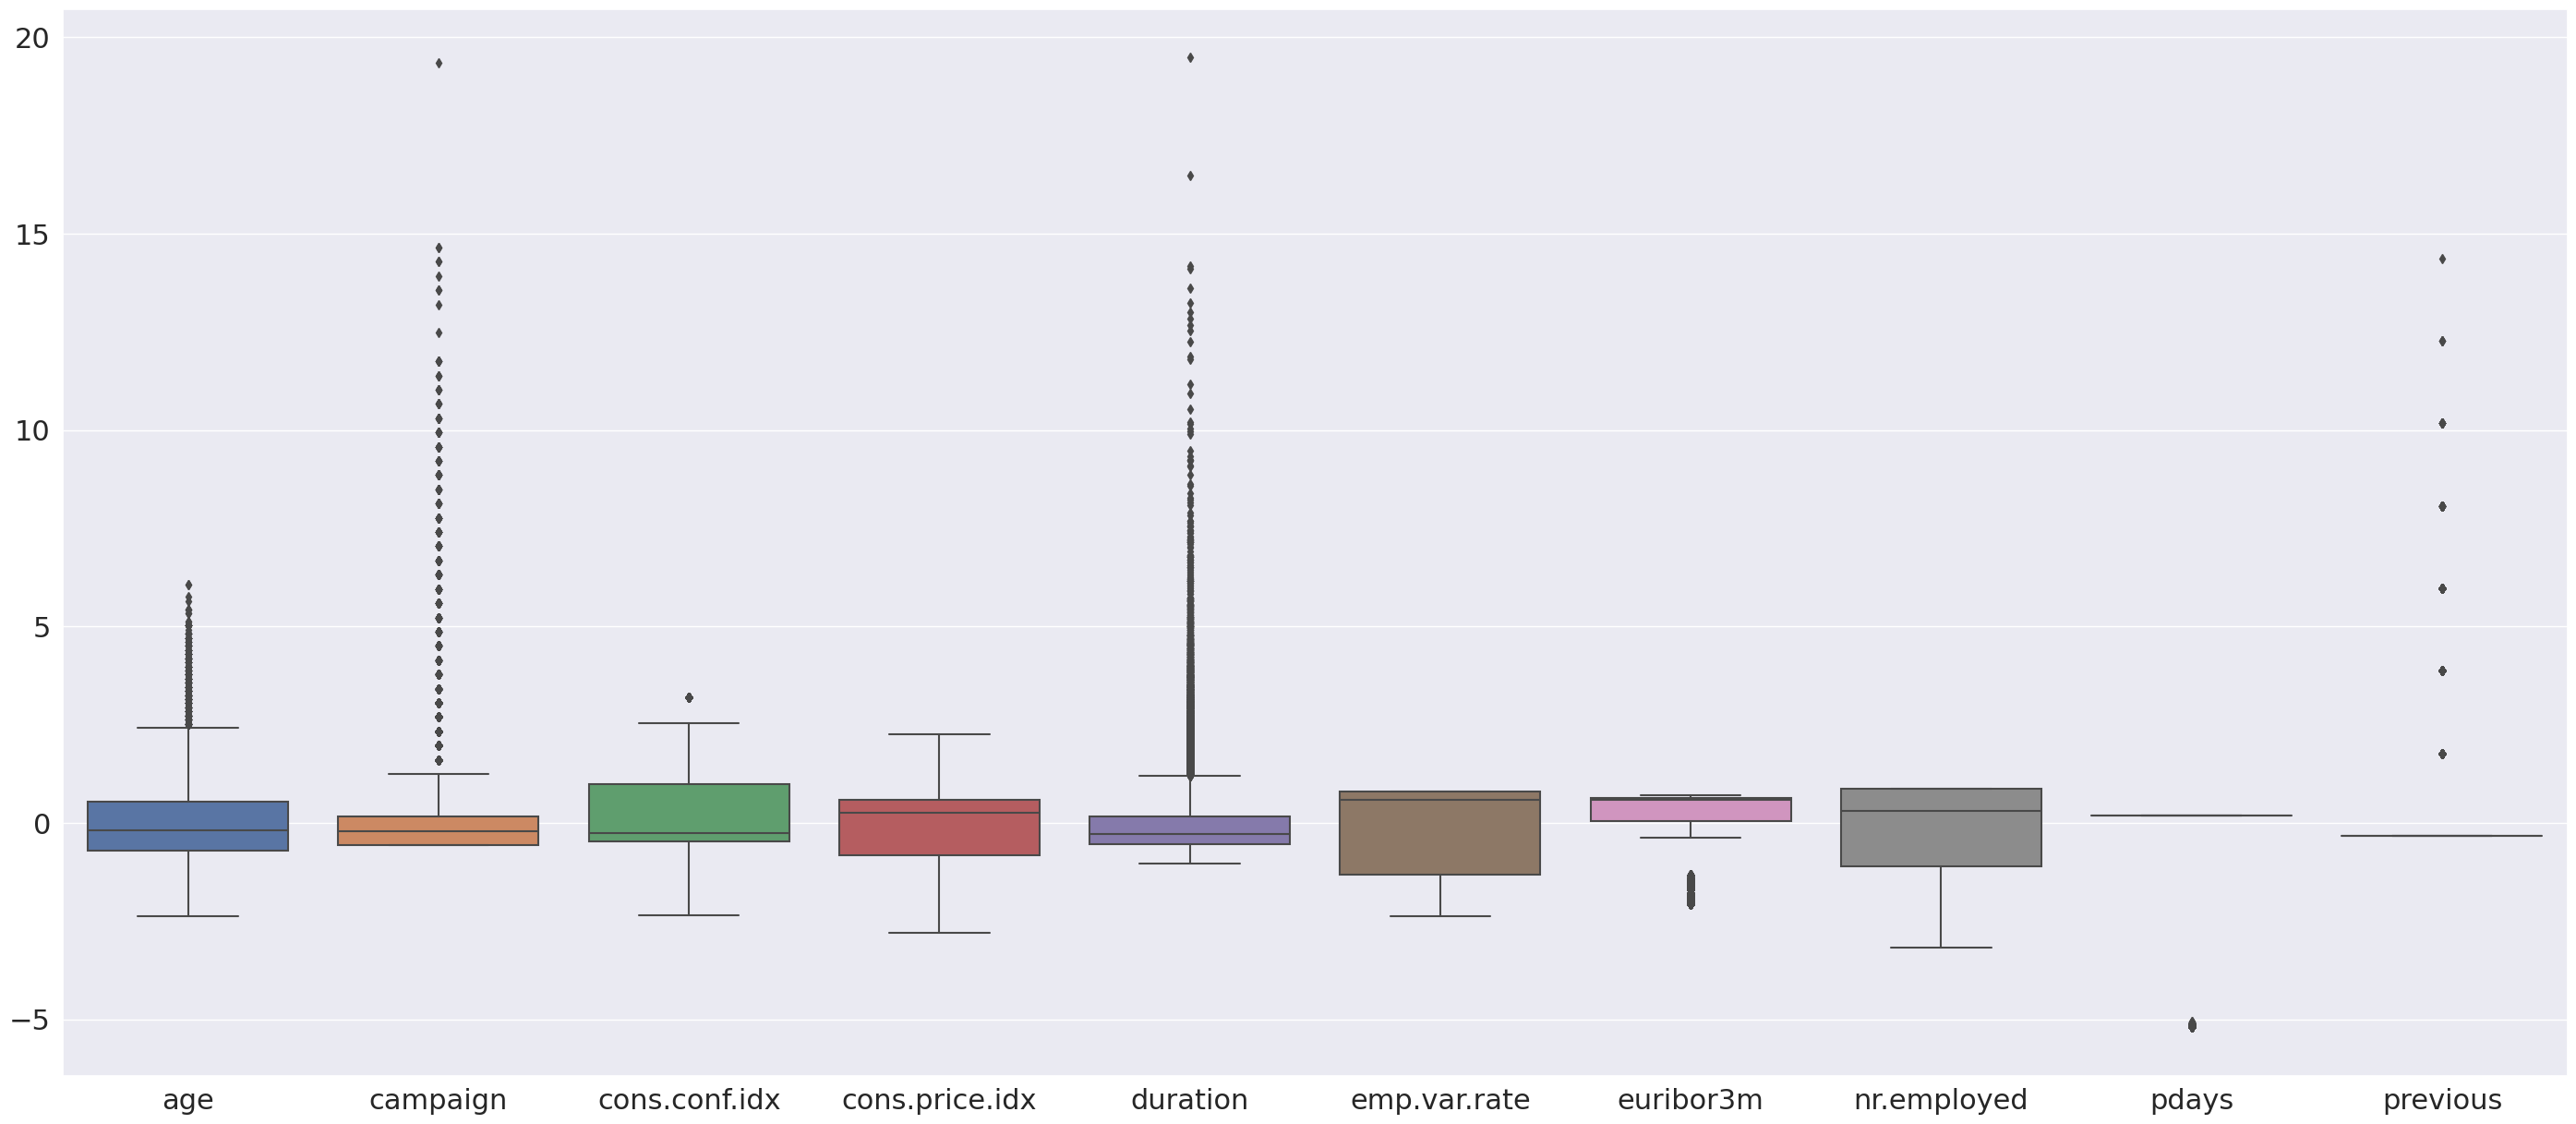

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_median_imputed_standard_scaled)
plt.show()

In [ ]:
numericals_with_most_frequent_imputed_standard_scaled = pd.DataFrame(
    standard_scaler.fit_transform(numericals_with_most_frequent_imputed),
    columns=numerical_features
)

In [ ]:
numericals_with_most_frequent_imputed_standard_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,2.068420e-16,1.000012,-2.145187,-0.760082,-0.265401,0.625023,5.868636
campaign,41188.0,7.797546e-17,1.000012,-0.561191,-0.561191,-0.199425,0.162342,19.335957
cons.conf.idx,41188.0,-1.410459e-15,1.000012,-2.410697,-0.618940,-0.198652,0.774648,2.876092
cons.price.idx,41188.0,-3.242951e-14,1.000012,-2.772974,-0.899183,0.447545,0.590096,2.039986
duration,41188.0,-2.604932e-17,1.000012,-0.939516,-0.594162,-0.334131,0.210308,19.042226
emp.var.rate,41188.0,9.936696e-17,1.000012,-2.362241,-1.322059,0.563270,0.758304,0.758304
euribor3m,41188.0,6.983289e-16,1.000012,-2.067947,0.057029,0.581528,0.644894,0.699478
nr.employed,41188.0,-4.438391e-15,1.000012,-3.106980,-1.149372,0.714329,0.714329,0.714329
pdays,41188.0,-4.416309e-17,1.000012,-5.205032,0.193329,0.193329,0.193329,0.193329
previous,41188.0,-1.104077e-17,1.000012,-0.333284,-0.333284,-0.333284,-0.333284,14.375308


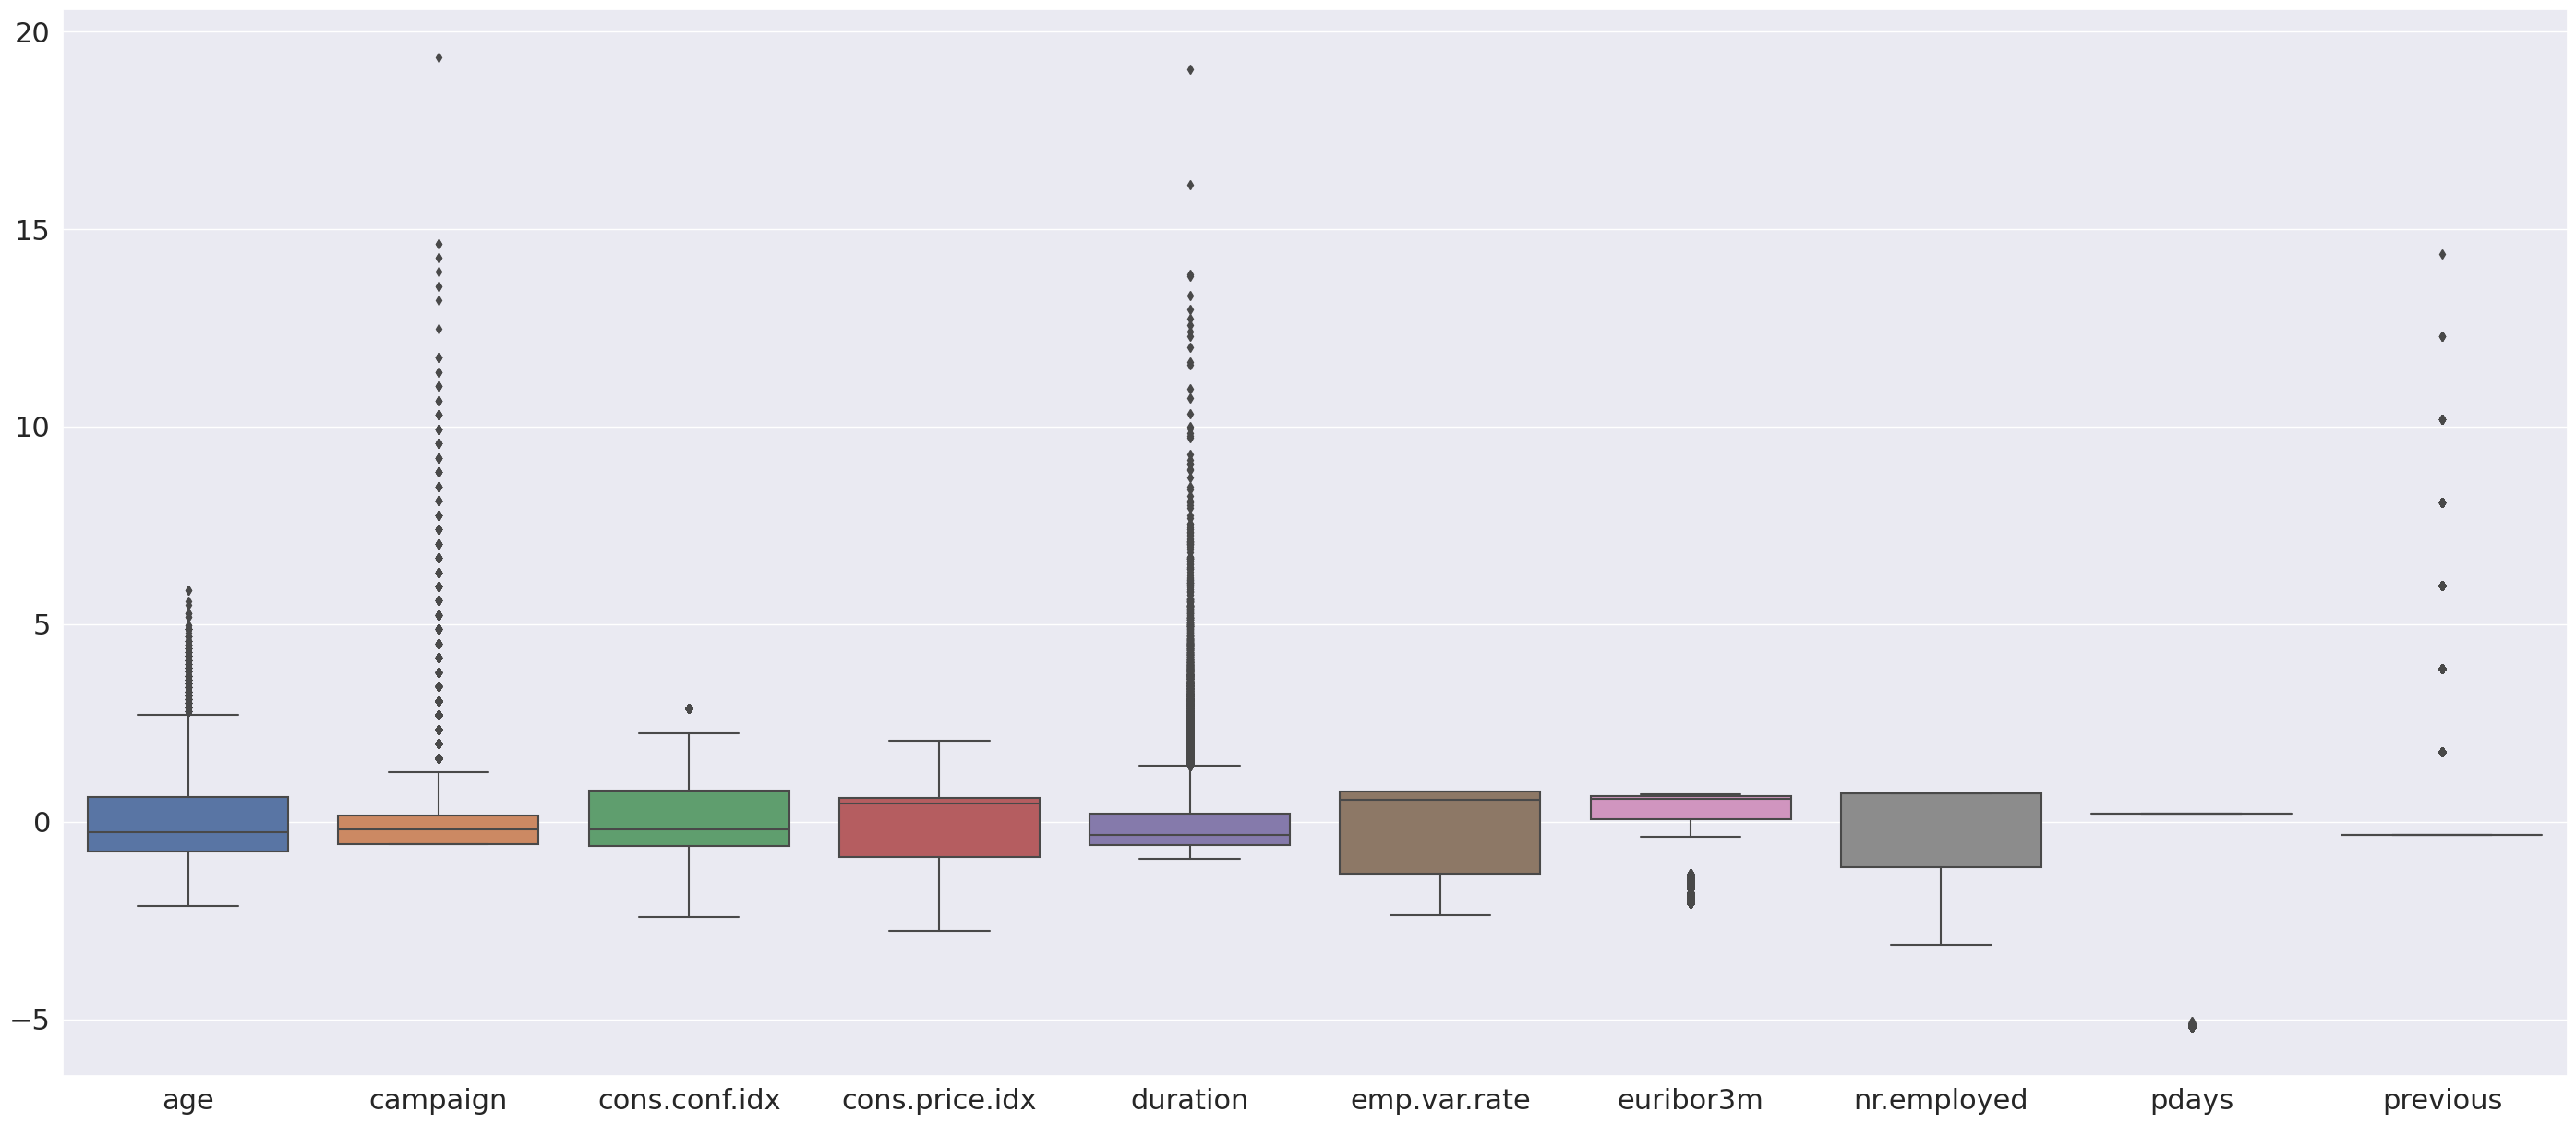

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_most_frequent_imputed_standard_scaled)
plt.show()

# Transformers

## sklearn.preprocessing.FunctionTransformer

In [ ]:
# def all_but_last_column(X):
#     return X[:, :-1]

In [ ]:
function_transformer = FunctionTransformer()

In [ ]:
numericals_with_median_imputed_standard_scaled

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
0,1.693509,-0.566107,0.998315,0.737998,0.063694,0.595046,0.581528,0.294692,0.193329,-0.333284
1,1.797572,-0.566107,0.998315,0.737998,-0.403413,0.595046,0.581528,0.294692,0.193329,-0.333284
2,-0.283681,-0.566107,0.998315,0.737998,-0.082277,0.595046,0.581528,0.294692,0.193329,-0.333284
3,0.028507,-0.566107,0.998315,0.255287,-0.278295,0.595046,0.581528,0.294692,0.193329,-0.333284
4,1.693509,-0.566107,0.998315,0.737998,0.255542,0.595046,0.581528,0.294692,0.193329,-0.333284
...,...,...,...,...,...,...,...,...,...,...
41183,3.462574,-0.566107,-2.347024,2.261001,-0.278295,-0.857485,-1.820754,0.294692,0.193329,-0.333284
41184,0.652883,-0.566107,-2.347024,2.261001,-0.278295,-0.857485,-1.820754,-3.169349,0.193329,-0.333284
41185,1.693509,-0.203780,-2.347024,0.255287,-0.236589,-0.857485,-1.820754,-3.169349,0.193329,-0.333284
41186,0.444757,-0.566107,-2.347024,2.261001,-0.278295,-0.857485,0.581528,-3.169349,0.193329,-0.333284


In [ ]:
numericals_with_median_imputed_standard_scaled_without_last_column = pd.DataFrame(
    function_transformer.fit_transform(numericals_with_median_imputed_standard_scaled),
    columns=numerical_features[:-1]
)

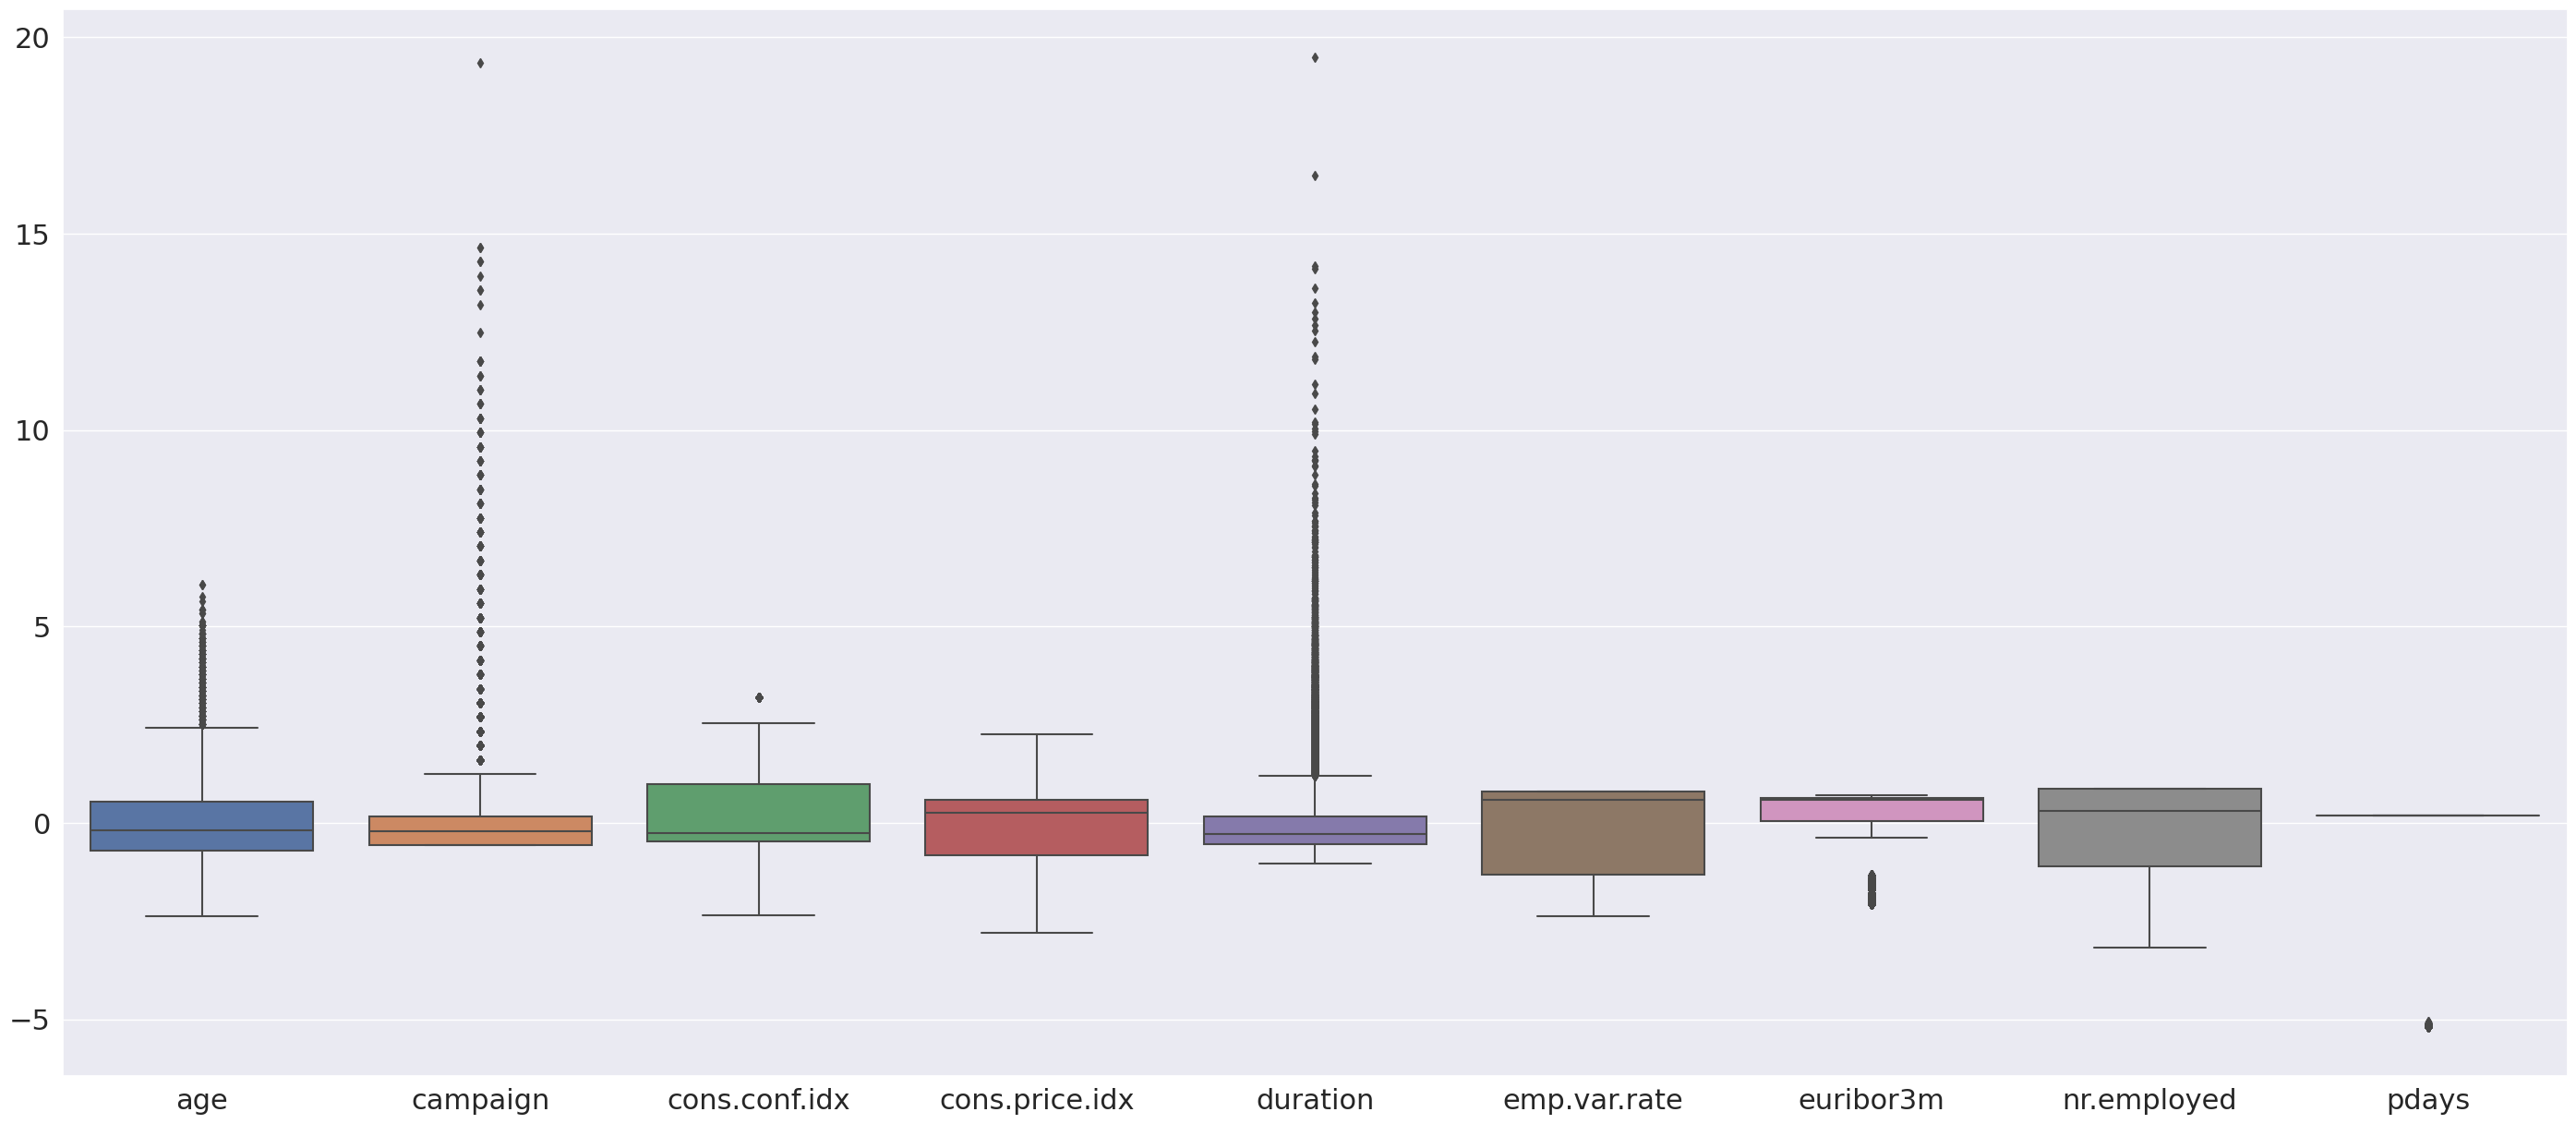

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_median_imputed_standard_scaled_without_last_column)
plt.show()

## sklearn.preprocessing.PowerTransformer

In [ ]:
power_transformer = PowerTransformer()

In [ ]:
numericals_with_median_imputed_standard_scaled_power_transformed = pd.DataFrame(
    power_transformer.fit_transform(numericals_with_median_imputed_standard_scaled),
    columns=numerical_features
)

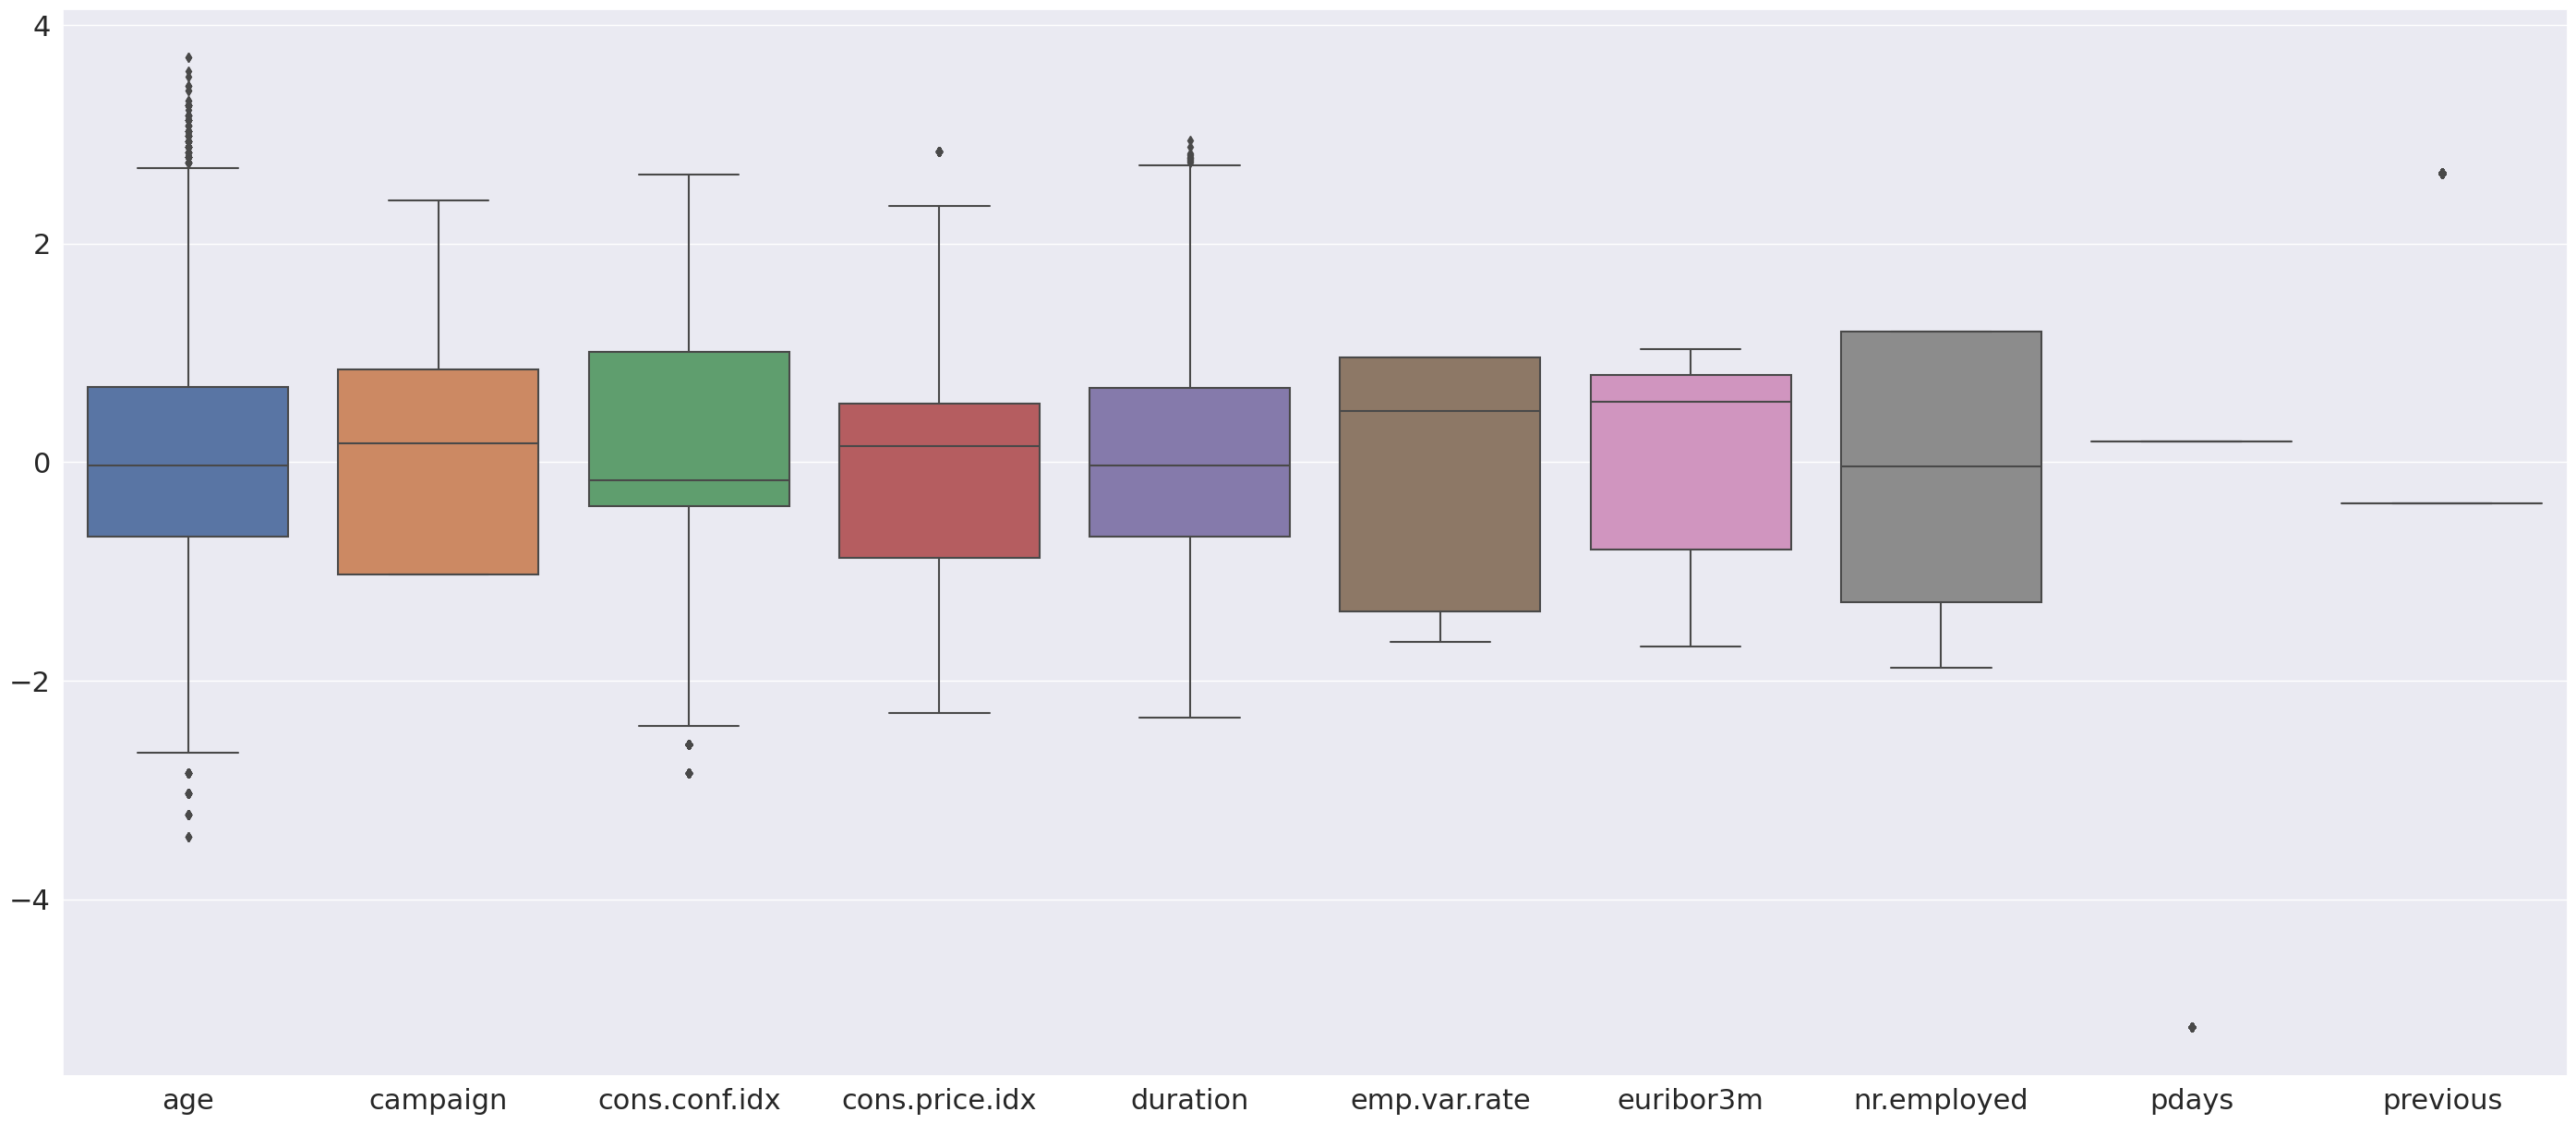

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_median_imputed_standard_scaled_power_transformed)
plt.show()

## sklearn.preprocessing.QuantileTransformer

In [ ]:
quantile_transformer = QuantileTransformer(output_distribution='normal')

In [ ]:
numericals_with_median_imputed_standard_scaled_quantile_transformed = pd.DataFrame(
    quantile_transformer.fit_transform(numericals_with_median_imputed_standard_scaled),
    columns=numerical_features
)

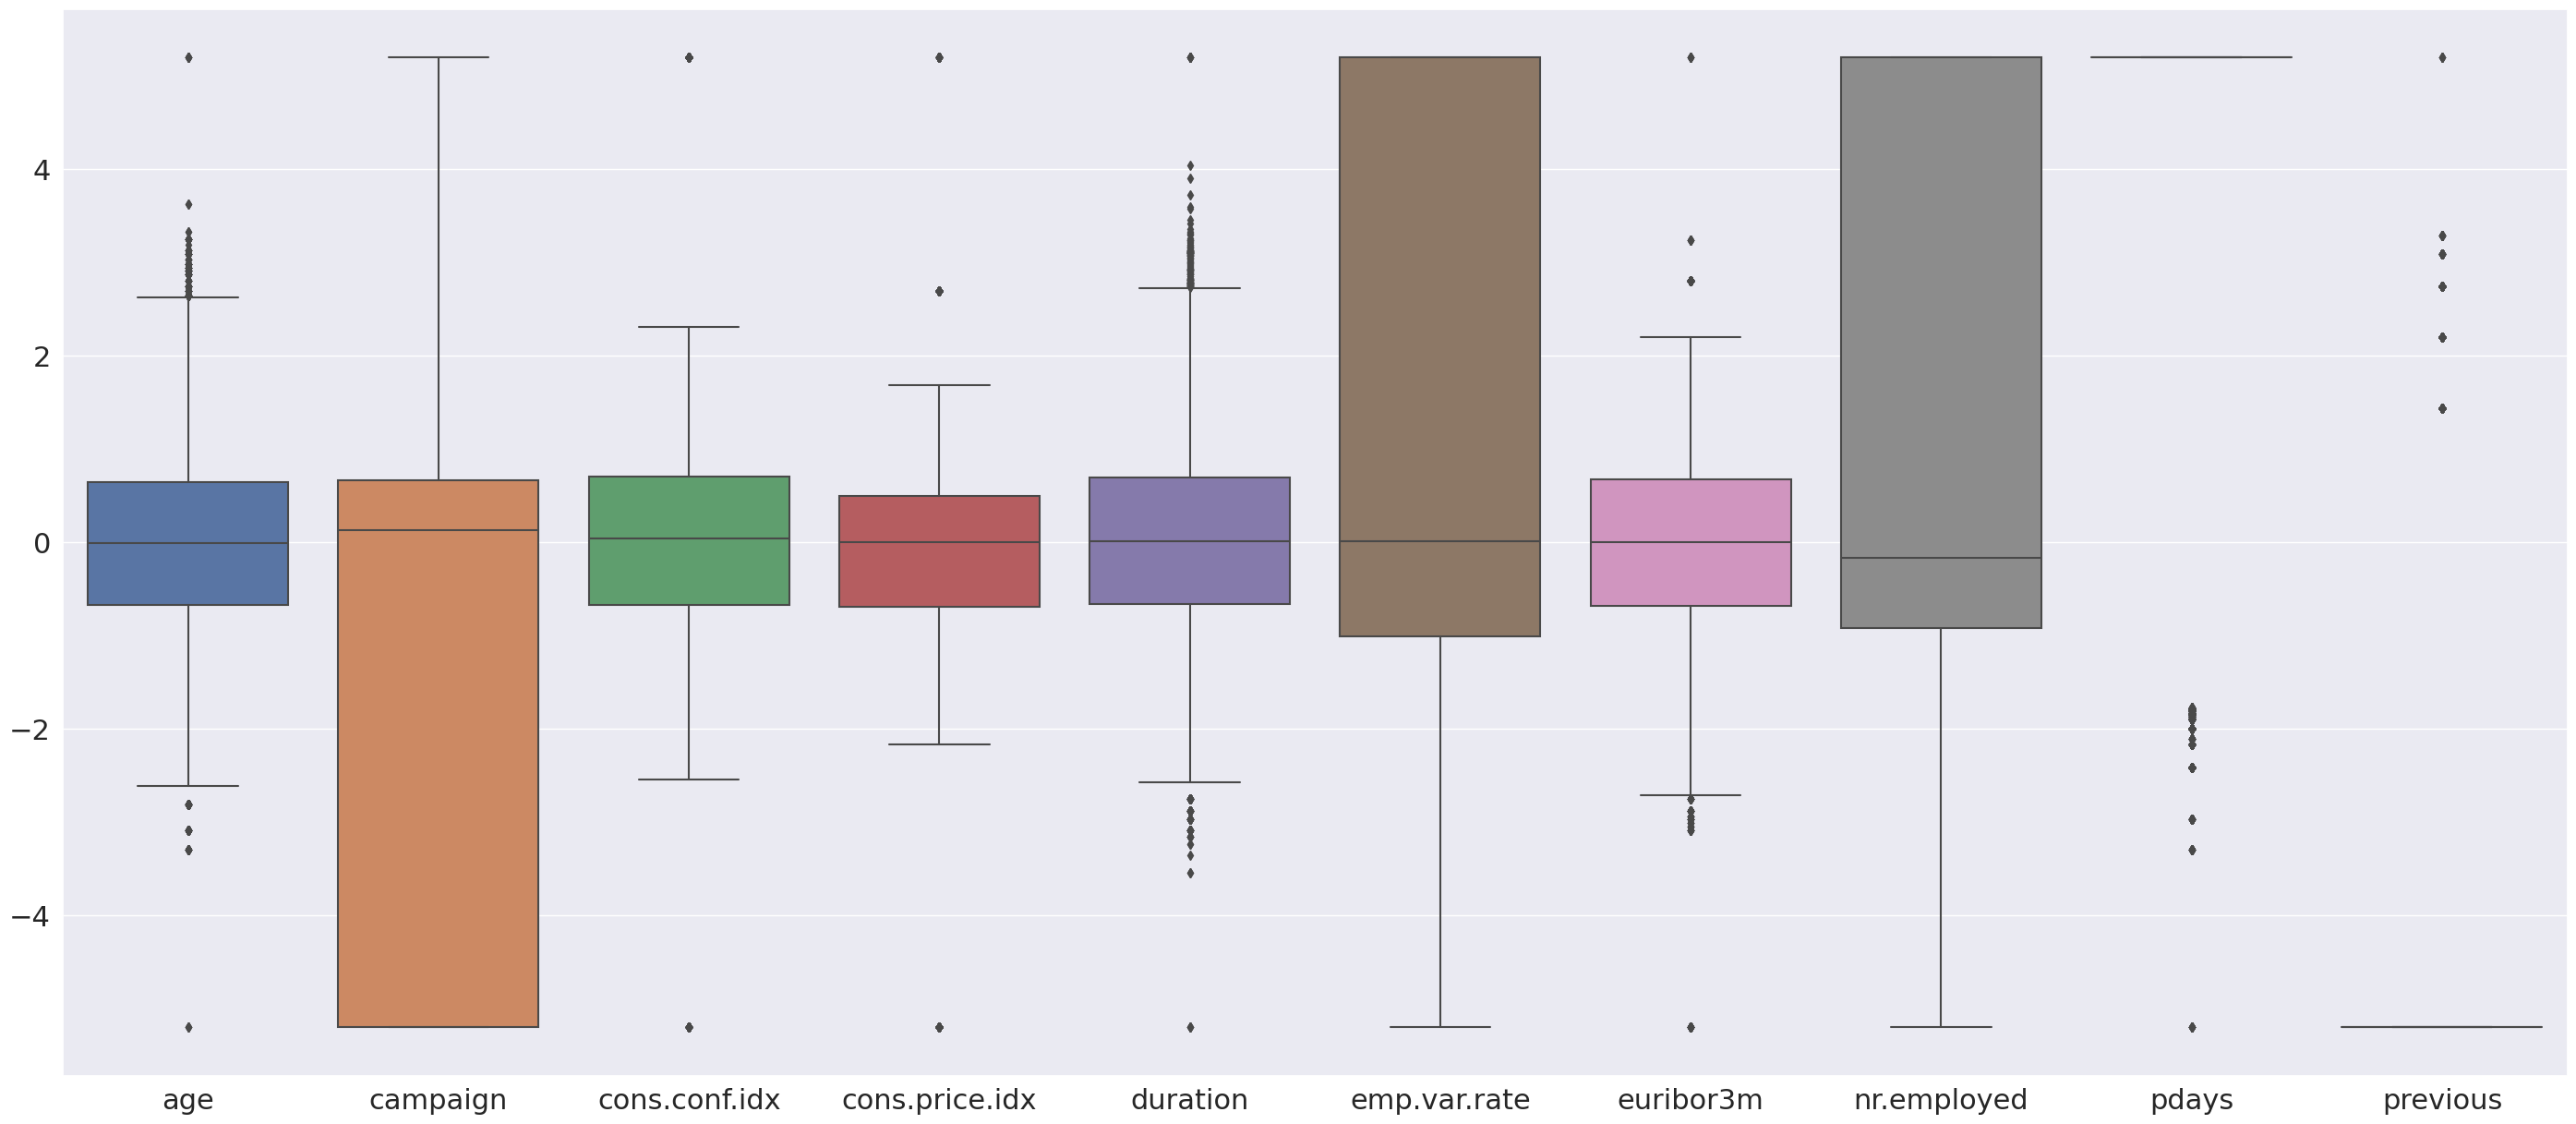

In [ ]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_median_imputed_standard_scaled_quantile_transformed)
plt.show()

# Encoders

## sklearn.preprocessing.LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y_encoded = label_encoder.fit_transform(data.y)

In [ ]:
label_encoder.classes_

array(['no', 'yes'], dtype=object)

In [ ]:
y_encoded

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
y_decoded = label_encoder.inverse_transform(y_encoded)

In [ ]:
y_decoded

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

## sklearn.preprocessing.LabelBinarizer

In [ ]:
label_binarizer = LabelBinarizer()

In [ ]:
y_binarized = label_binarizer.fit_transform(data.y)

In [ ]:
label_binarizer.classes_

array(['no', 'yes'], dtype='<U3')

In [ ]:
label_binarizer.neg_label

0

In [ ]:
label_binarizer.pos_label

1

In [ ]:
label_binarizer.y_type_

'binary'

In [ ]:
y_binarized

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
y_original = label_binarizer.inverse_transform(y_binarized)

In [ ]:
y_original

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype='<U3')

## sklearn.preprocessing.OneHotEncoder

In [ ]:
one_hot_encoder = OneHotEncoder()

In [ ]:
categorials_with_constant_imputed.head().T

,0,1,2,3,4
contact,unknown,telephone,telephone,telephone,telephone
day_of_week,mon,mon,mon,mon,mon
default,no,unknown,no,no,no
education,basic.4y,high.school,high.school,basic.6y,high.school
housing,no,no,unknown,no,no
job,unknown,services,services,unknown,services
loan,no,unknown,no,unknown,yes
marital,married,married,married,married,unknown
month,may,may,may,may,may
poutcome,nonexistent,nonexistent,nonexistent,nonexistent,nonexistent


In [ ]:
categorials_with_constant_imputed_one_hot_encoded = one_hot_encoder.fit_transform(categorials_with_constant_imputed)

In [ ]:
categorials_with_constant_imputed_one_hot_encoded.shape

(41188, 57)

In [ ]:
type(categorials_with_constant_imputed_one_hot_encoded)

scipy.sparse._csr.csr_matrix

In [ ]:
categorials_with_constant_imputed_one_hot_encoded.todense()

matrix([[0., 0., 1., ..., 1., 0., 0.],
        [0., 1., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 1., ..., 1., 0., 0.],
        [0., 0., 1., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
categorials_with_constant_imputed_one_hot_encoded = pd.DataFrame(
    categorials_with_constant_imputed_one_hot_encoded.todense(),
    columns=one_hot_encoder.get_feature_names_out()
)

In [ ]:
categorials_with_constant_imputed_one_hot_encoded.head().T

,0,1,2,3,4
contact_cellular,0.0,0.0,0.0,0.0,0.0
contact_telephone,0.0,1.0,1.0,1.0,1.0
contact_unknown,1.0,0.0,0.0,0.0,0.0
day_of_week_fri,0.0,0.0,0.0,0.0,0.0
day_of_week_mon,1.0,1.0,1.0,1.0,1.0
day_of_week_thu,0.0,0.0,0.0,0.0,0.0
day_of_week_tue,0.0,0.0,0.0,0.0,0.0
day_of_week_unknown,0.0,0.0,0.0,0.0,0.0
day_of_week_wed,0.0,0.0,0.0,0.0,0.0
default_no,1.0,0.0,1.0,1.0,1.0


In [ ]:
one_hot_encoder.categories_

[array(['cellular', 'telephone', 'unknown'], dtype=object),
 array(['fri', 'mon', 'thu', 'tue', 'unknown', 'wed'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['divorced', 'married', 'single', 'unknown'], dtype=object),
 array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep', 'unknown'], dtype=object),
 array(['failure', 'nonexistent', 'success', 'unknown'], dtype=object)]

In [ ]:
one_hot_encoder.get_feature_names_out()

array(['contact_cellular', 'contact_telephone', 'contact_unknown',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_unknown', 'day_of_week_wed',
       'default_no', 'default_unknown', 'default_yes',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_unknown',
       'housing_yes', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown', 'loan_no',
       'loan_unknown', 'loan_yes', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'm

In [ ]:
categorials_with_constant_imputed_one_hot_decoded = one_hot_encoder.inverse_transform(categorials_with_constant_imputed_one_hot_encoded)

In [ ]:
categorials_with_constant_imputed_one_hot_decoded

array([['unknown', 'mon', 'no', ..., 'married', 'may', 'nonexistent'],
       ['telephone', 'mon', 'unknown', ..., 'married', 'may',
        'nonexistent'],
       ['telephone', 'mon', 'no', ..., 'married', 'may', 'nonexistent'],
       ...,
       ['unknown', 'fri', 'no', ..., 'unknown', 'nov', 'nonexistent'],
       ['unknown', 'unknown', 'no', ..., 'married', 'nov', 'nonexistent'],
       ['cellular', 'fri', 'unknown', ..., 'married', 'nov', 'failure']],
      dtype=object)

## sklearn.preprocessing.OrdinalEncoder

In [ ]:
ordinal_encoder = OrdinalEncoder()

In [ ]:
categorials_with_constant_imputed_ordinal_encoded = ordinal_encoder.fit_transform(categorials_with_constant_imputed)

In [ ]:
categorials_with_constant_imputed_ordinal_encoded

array([[2., 1., 0., ..., 1., 6., 1.],
       [1., 1., 1., ..., 1., 6., 1.],
       [1., 1., 0., ..., 1., 6., 1.],
       ...,
       [2., 0., 0., ..., 3., 7., 1.],
       [2., 4., 0., ..., 1., 7., 1.],
       [0., 0., 1., ..., 1., 7., 0.]])

In [ ]:
categorials_with_constant_imputed_ordinal_encoded.shape

(41188, 10)

In [ ]:
ordinal_encoder.categories_

[array(['cellular', 'telephone', 'unknown'], dtype=object),
 array(['fri', 'mon', 'thu', 'tue', 'unknown', 'wed'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['divorced', 'married', 'single', 'unknown'], dtype=object),
 array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep', 'unknown'], dtype=object),
 array(['failure', 'nonexistent', 'success', 'unknown'], dtype=object)]

In [ ]:
categorials_with_constant_imputed_ordinal_decoded = ordinal_encoder.inverse_transform(categorials_with_constant_imputed_ordinal_encoded)

In [ ]:
categorials_with_constant_imputed_ordinal_decoded

array([['unknown', 'mon', 'no', ..., 'married', 'may', 'nonexistent'],
       ['telephone', 'mon', 'unknown', ..., 'married', 'may',
        'nonexistent'],
       ['telephone', 'mon', 'no', ..., 'married', 'may', 'nonexistent'],
       ...,
       ['unknown', 'fri', 'no', ..., 'unknown', 'nov', 'nonexistent'],
       ['unknown', 'unknown', 'no', ..., 'married', 'nov', 'nonexistent'],
       ['cellular', 'fri', 'unknown', ..., 'married', 'nov', 'failure']],
      dtype=object)

# Target balancers

## Under-sampling

### imblearn.under_sampling.RandomUnderSampler

In [ ]:
random_undersampler = RandomUnderSampler(random_state=0)

In [ ]:
X_resampled, y_resampled = random_undersampler.fit_resample(
    data[numerical_features + categorial_features],
    data.y
)

In [ ]:
X_resampled.shape

(9280, 20)

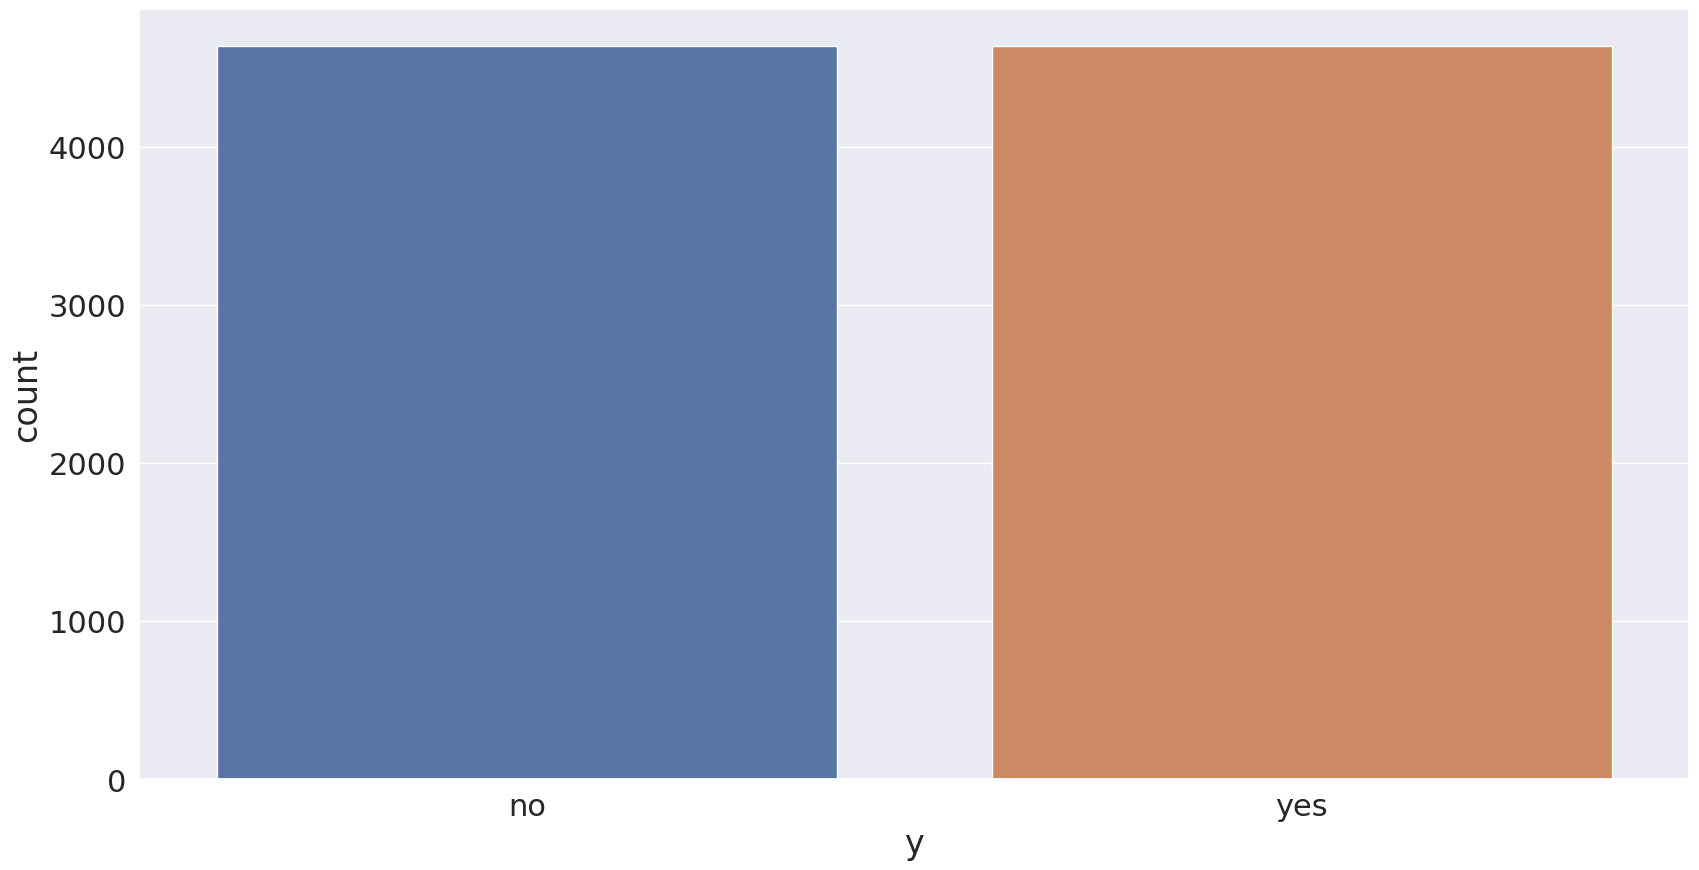

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x=y_resampled)
plt.show()

### imblearn.under_sampling.ClusterCentroids

In [ ]:
cluster_centroids_undersampler = ClusterCentroids(random_state=0)

In [ ]:
X_resampled, y_resampled = cluster_centroids_undersampler.fit_resample(
    data[numerical_features],
    data.y
)

In [ ]:
X_resampled.shape, y_resampled.shape

((9280, 10), (9280,))

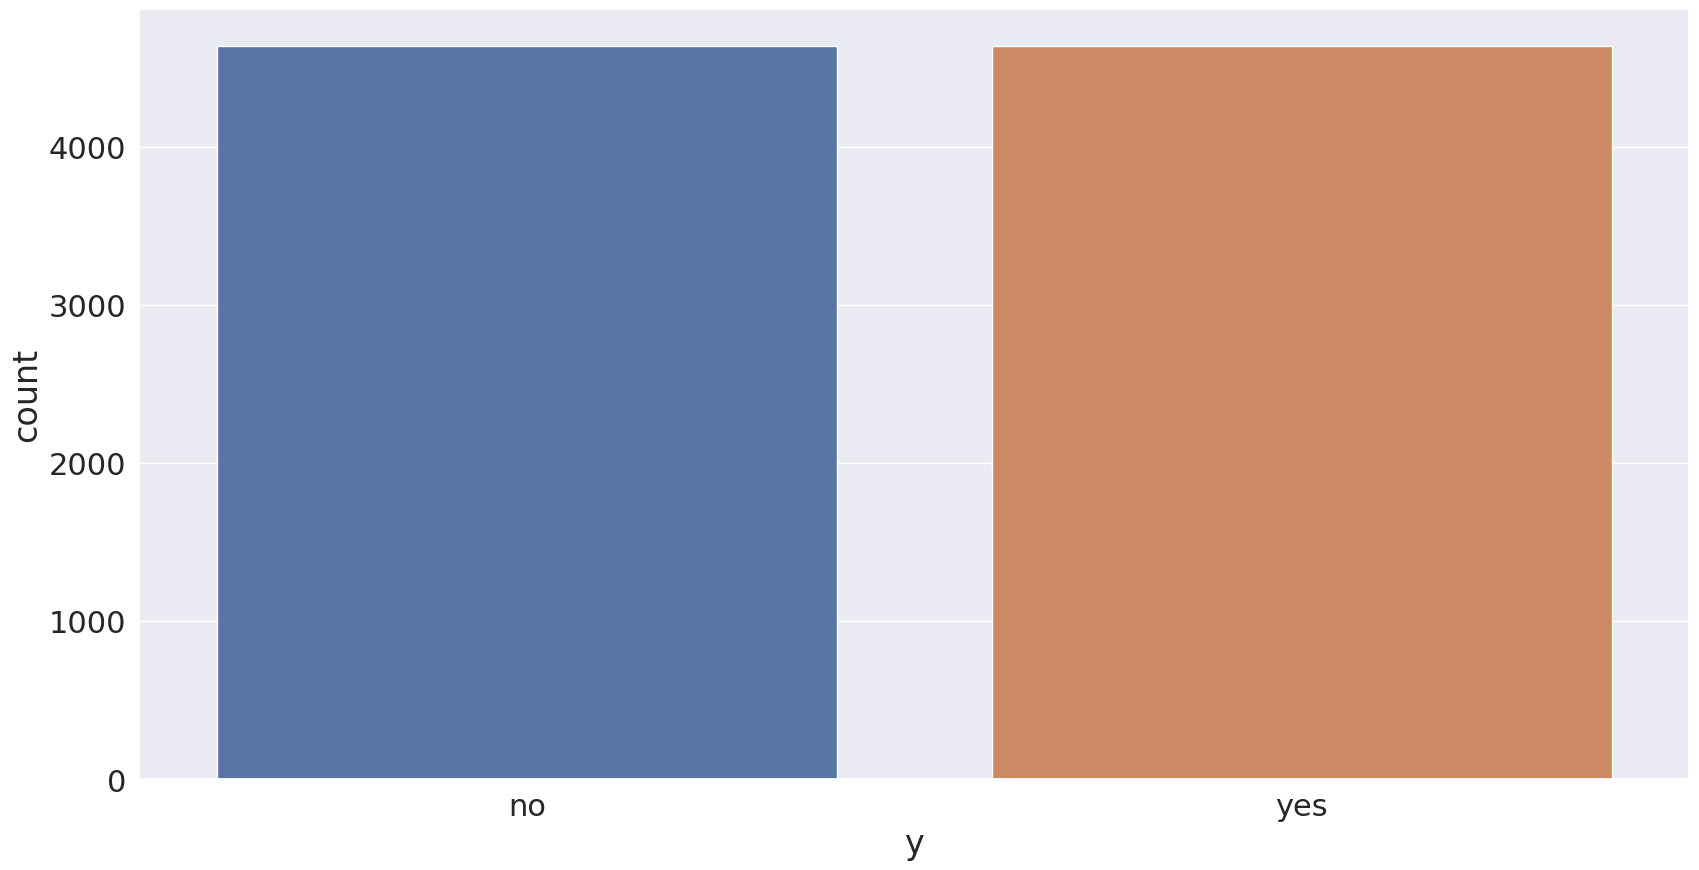

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x=y_resampled)
plt.show()

### imblearn.under_sampling.NearMiss

In [ ]:
near_miss_undersampler = NearMiss()

In [ ]:
X_resampled, y_resampled = near_miss_undersampler.fit_resample(
    data[numerical_features],
    data.y
)

In [ ]:
X_resampled.shape, y_resampled.shape

((9280, 10), (9280,))

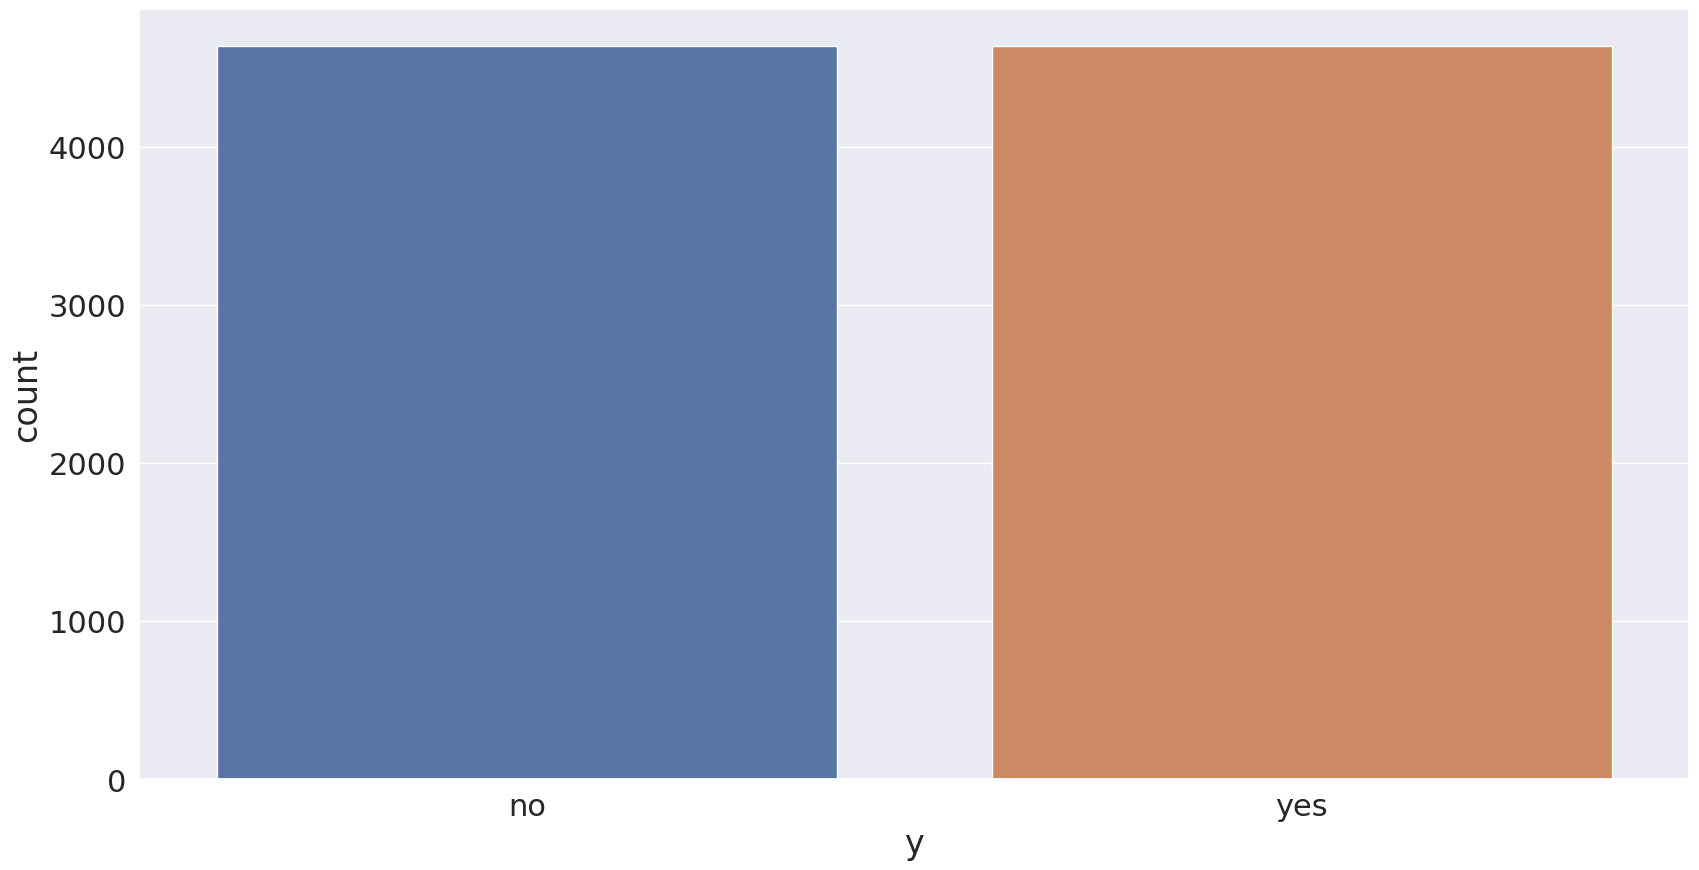

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x=y_resampled)
plt.show()

## Over-sampling

### imblearn.over_sampling.RandomOverSampler

In [ ]:
random_oversampler = RandomOverSampler(random_state=0)

In [ ]:
X_resampled, y_resampled = random_oversampler.fit_resample(
    data[numerical_features + categorial_features],
    data.y
)

In [ ]:
X_resampled.shape, y_resampled.shape

((73096, 20), (73096,))

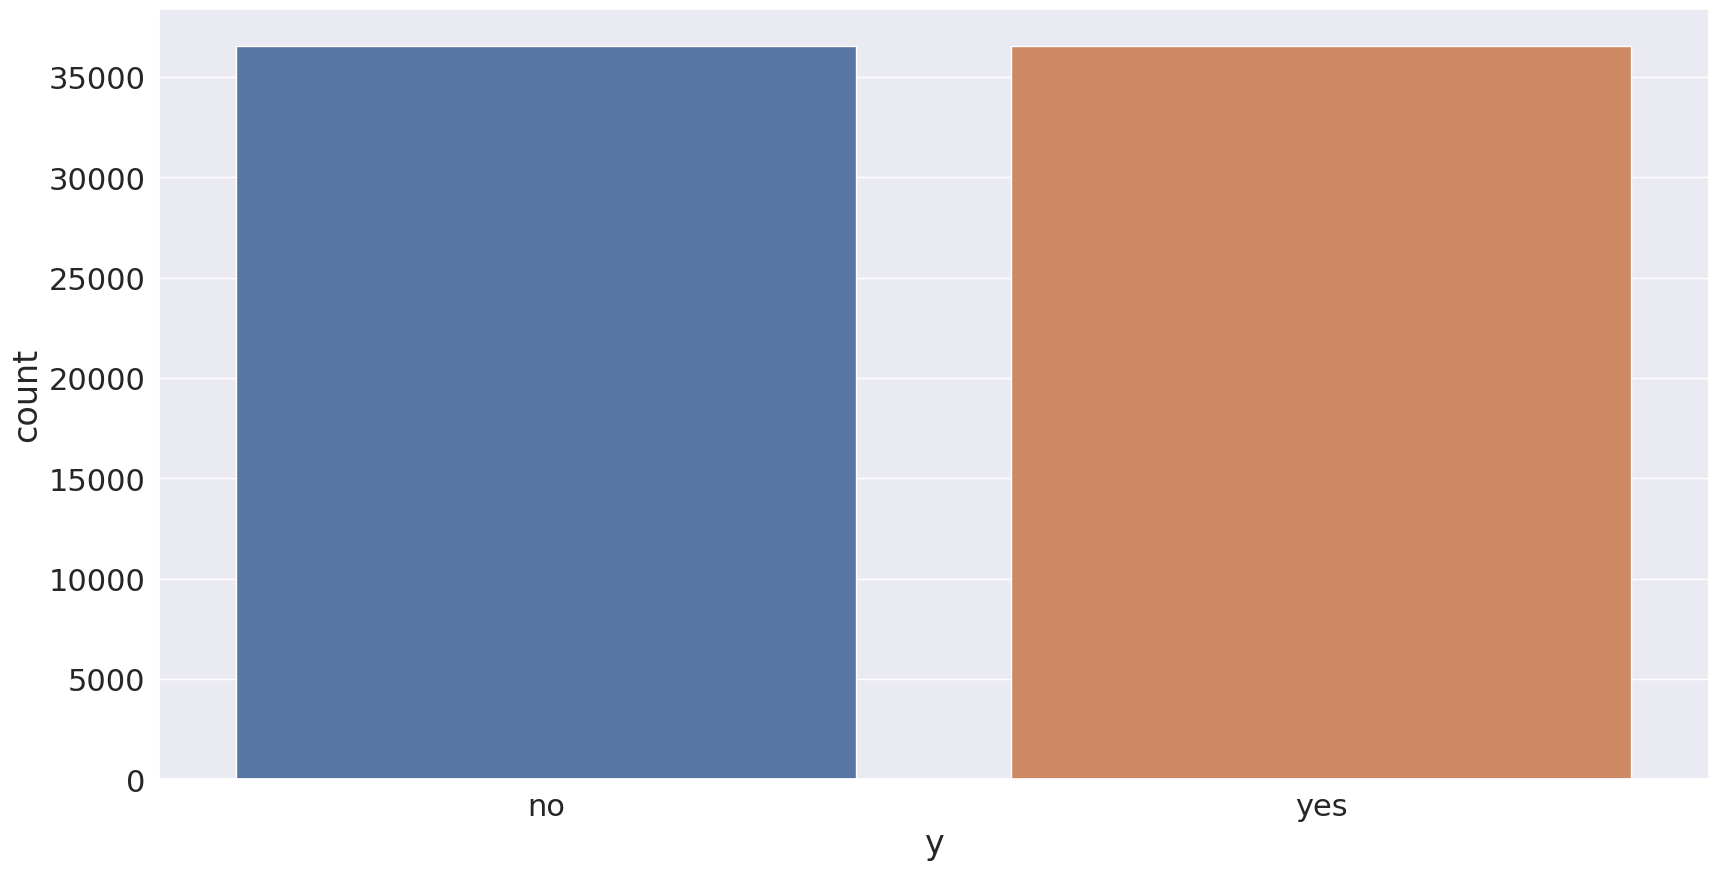

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x=y_resampled)
plt.show()

### imblearn.over_sampling.SMOTE

In [ ]:
smote_oversampler = SMOTE(random_state=0)

In [ ]:
X_resampled, y_resampled = smote_oversampler.fit_resample(
    data[numerical_features],
    data.y
)

In [ ]:
X_resampled.shape, y_resampled.shape

((73096, 10), (73096,))

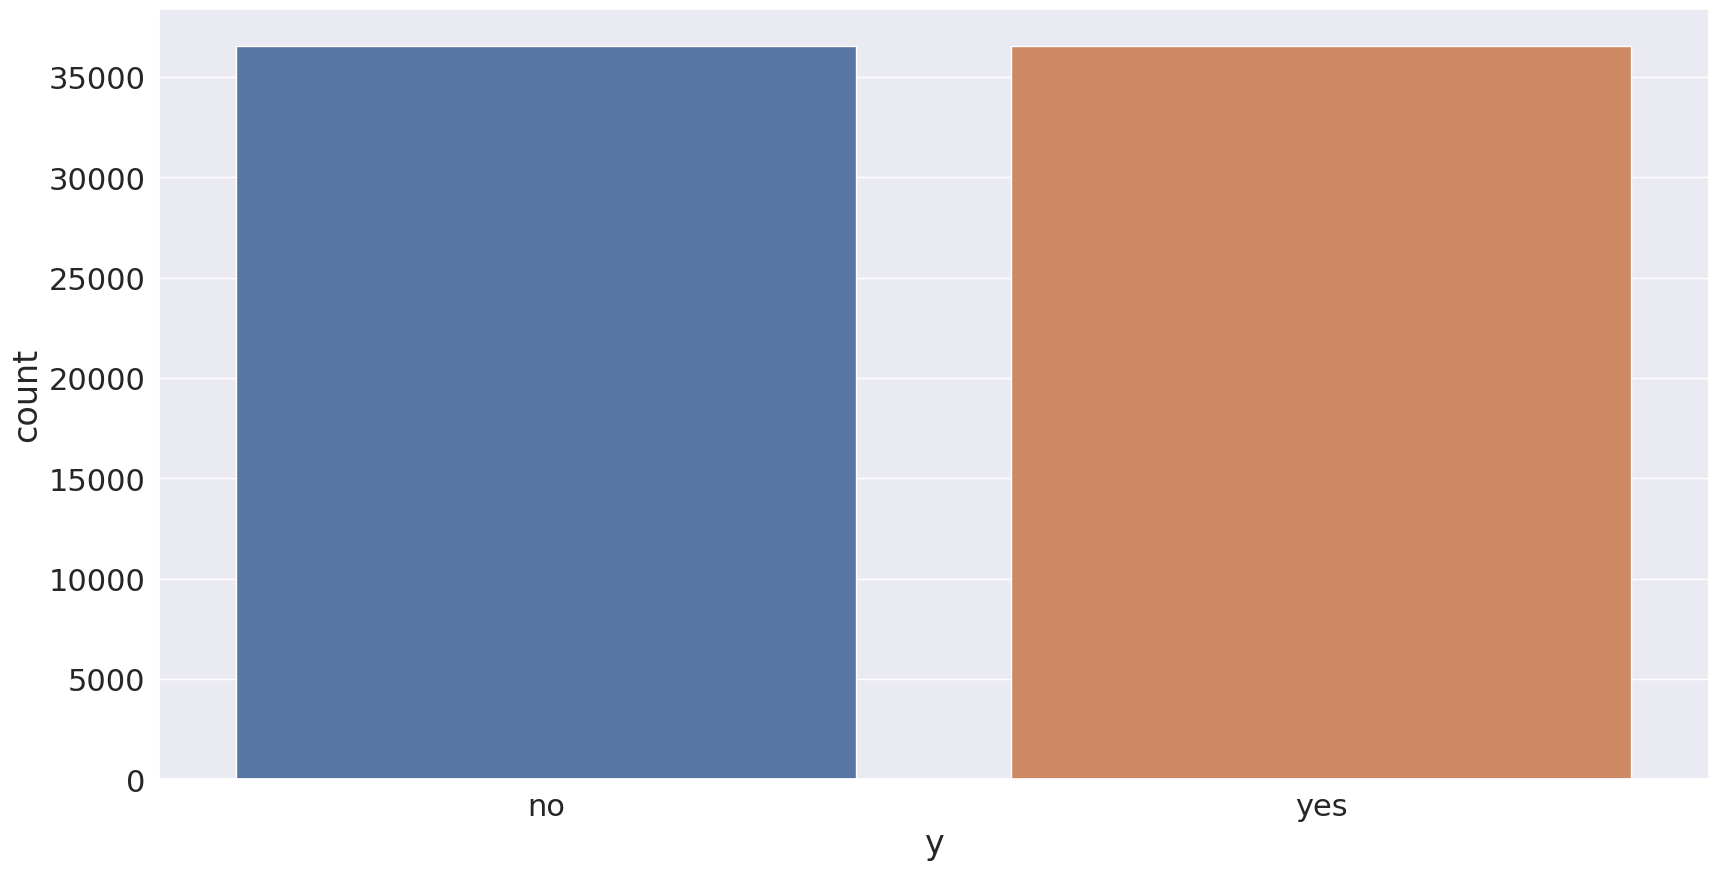

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x=y_resampled)
plt.show()

### imblearn.over_sampling.ADASYN

In [ ]:
adasyn_oversampler = ADASYN(random_state=0)

In [ ]:
X_resampled, y_resampled = adasyn_oversampler.fit_resample(
    data[numerical_features],
    data.y
)

In [ ]:
X_resampled.shape, y_resampled.shape

((73490, 10), (73490,))

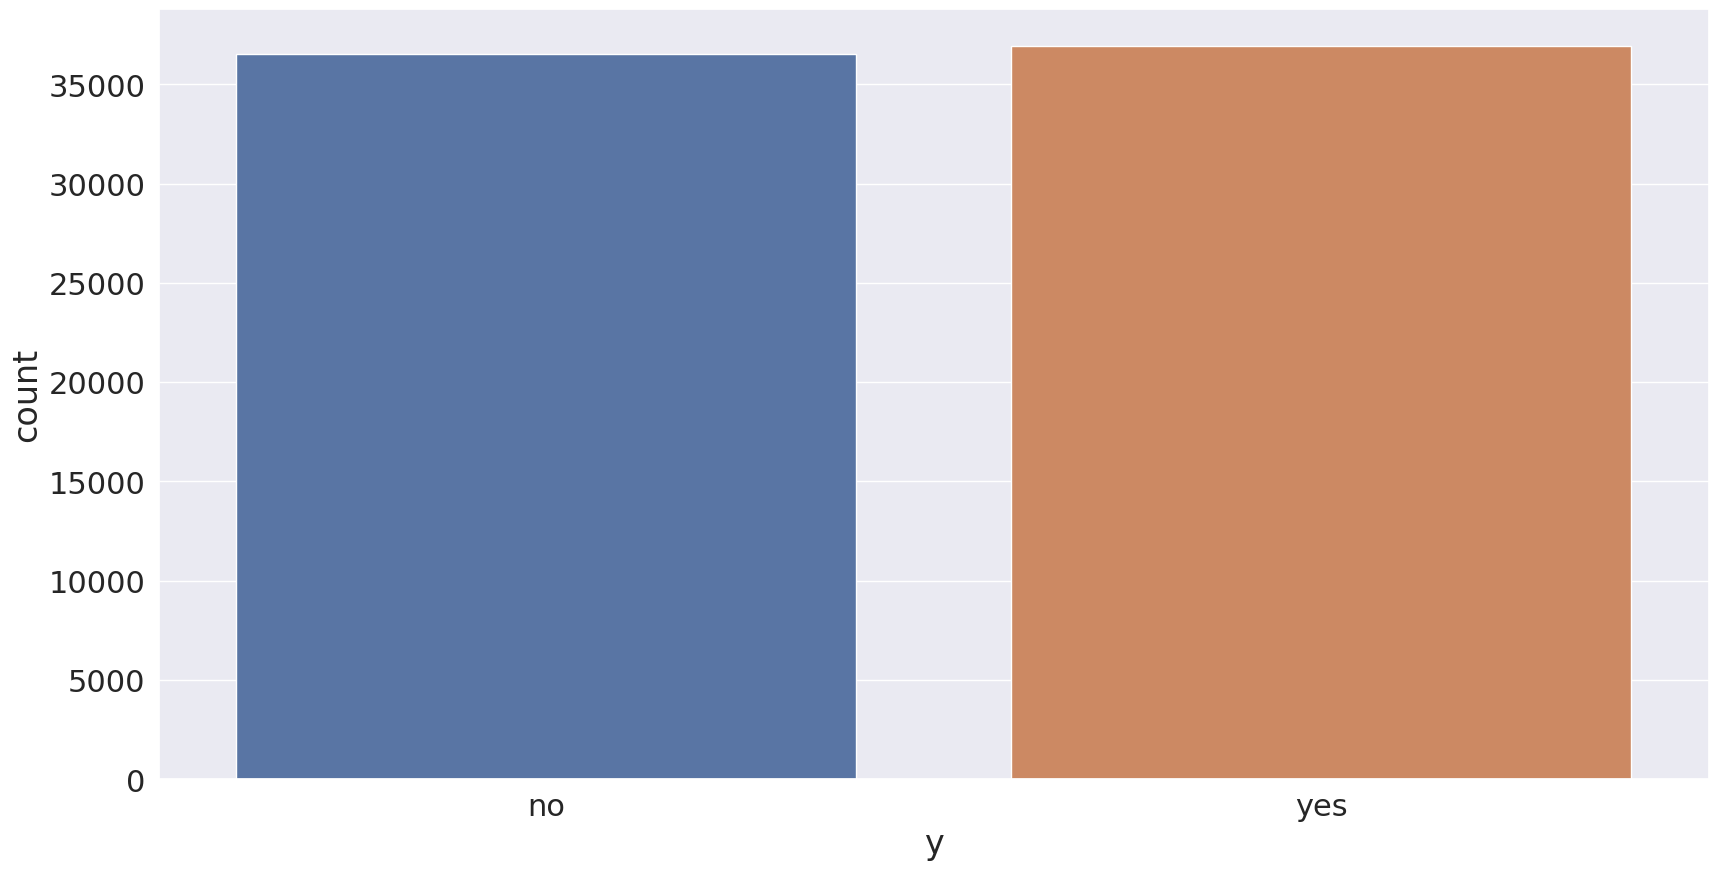

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x=y_resampled)
plt.show()

# A bit about the mess that was created so far

And now let's look at that heap of variables that was created:

In [ ]:
list(filter(lambda x: 'categorial' in x or 'numerical' in x, dir()))

['categorial_features',
 'categorials_with_constant_imputed',
 'categorials_with_constant_imputed_one_hot_decoded',
 'categorials_with_constant_imputed_one_hot_encoded',
 'categorials_with_constant_imputed_ordinal_decoded',
 'categorials_with_constant_imputed_ordinal_encoded',
 'numerical_features',
 'numericals_with_mean_imputed',
 'numericals_with_mean_imputed_max_abs_scaled',
 'numericals_with_mean_imputed_min_max_scaled',
 'numericals_with_mean_imputed_robust_scaled',
 'numericals_with_mean_imputed_standard_scaled',
 'numericals_with_median_imputed',
 'numericals_with_median_imputed_max_abs_scaled',
 'numericals_with_median_imputed_min_max_scaled',
 'numericals_with_median_imputed_robust_scaled',
 'numericals_with_median_imputed_standard_scaled',
 'numericals_with_median_imputed_standard_scaled_power_transformed',
 'numericals_with_median_imputed_standard_scaled_quantile_transformed',
 'numericals_with_median_imputed_standard_scaled_without_last_column',
 'numericals_with_most_freq

# Conclusion

So, we looked:
- how scikit-learn can fill in the gaps using different strategies;
- how to normalize data;
- how to use the help of transformers to transform features, filter out unnecessary ones, etc .;
- How to translate the target variable from a text view to a OneHot view and vice versa;
- How to translate categorical features from a text view into a OneHot view and vice versa;
- how to balance classes through:
    - Under-sampling;
    - Over-sampling.

There are several points that have remained uncovered, namely:
- transformation of a continuous variable into a categorical one (quantization);
- work with outliers;
- pipelines;
- hyperparameters search;
- pipelines + hyperparameters search
- multiple metrics calculation during hyperparameters search.

There is no sense here to draw any conclusions about the quality of the preprocessing, since we have not yet tested it on any algorithm.

On the other hand, at the stage of various transformations, it was already quite clearly seen that some features do not seem to get better (asymmetry persists, outbursts do not disappear, etc.).

It’s worthwhile to take a closer look at such features, maybe it’s worth quantizing there (as, for example, in the case of the pdays feature, where for 999 there were no calls to the client).

In general, of course, it would be much better to try some pre-processing options in combination with some algorithm in order to see which transformations change the result in which direction.